In [229]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy import stats
%load_ext autoreload
%autoreload 2
from implementations import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [556]:
from helpers import *

# load data.
particle, products, ids = load_csv_data('data/train.csv', sub_sample= True)
'''
for i in range(products.shape[0]):
    for j in range(products.shape[1]):
        if(products[i,j] == -999):
            products[i,j] = 3000'''

#products = np.delete(products, np.s_[0], axis=1)

'\nfor i in range(products.shape[0]):\n    for j in range(products.shape[1]):\n        if(products[i,j] == -999):\n            products[i,j] = 3000'

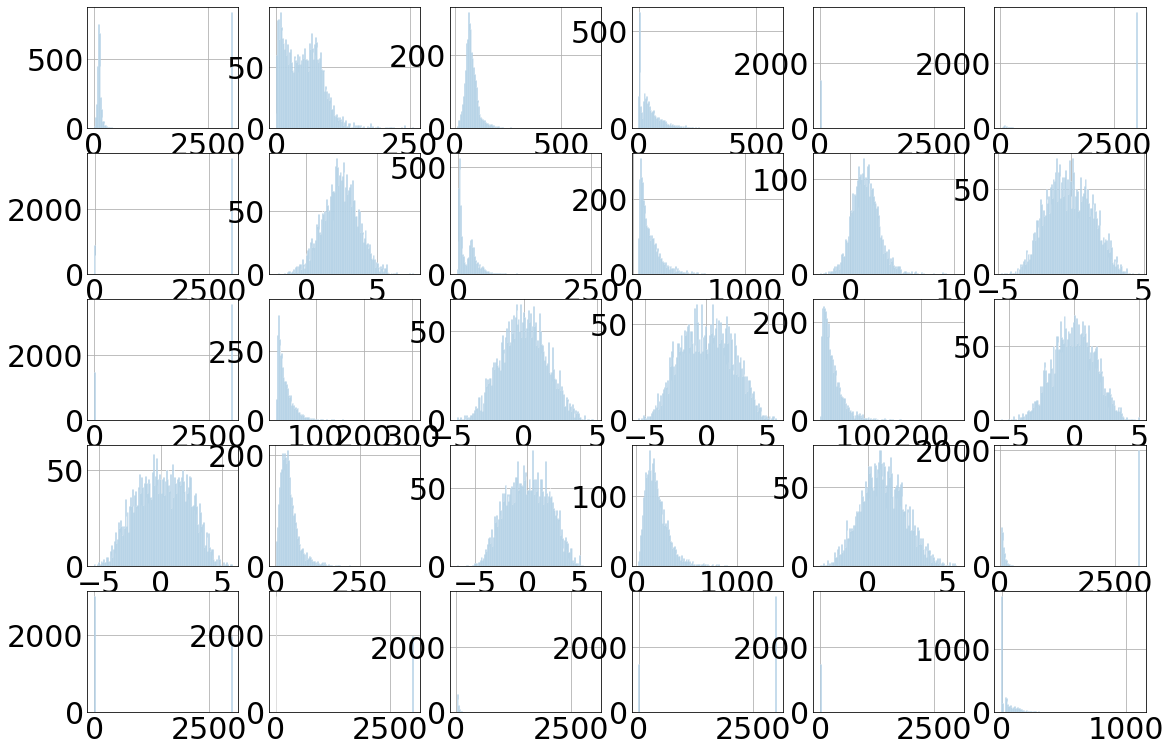

In [544]:

plt.style.use('_mpl-gallery')
# make data
np.random.seed(1)
# plot:
fig, ax = plt.subplots(5,6)

fig.set_size_inches(15, 10)
i=0
j=0
for feature in products.T:
    thing = np.random.normal(feature)
    ax[i,j].hist(thing, bins=200, linewidth=0.5, edgecolor="white")
    if j==5:
        j = 0
        i += 1
    else:
        j += 1

plt.show()

Standardize without logging

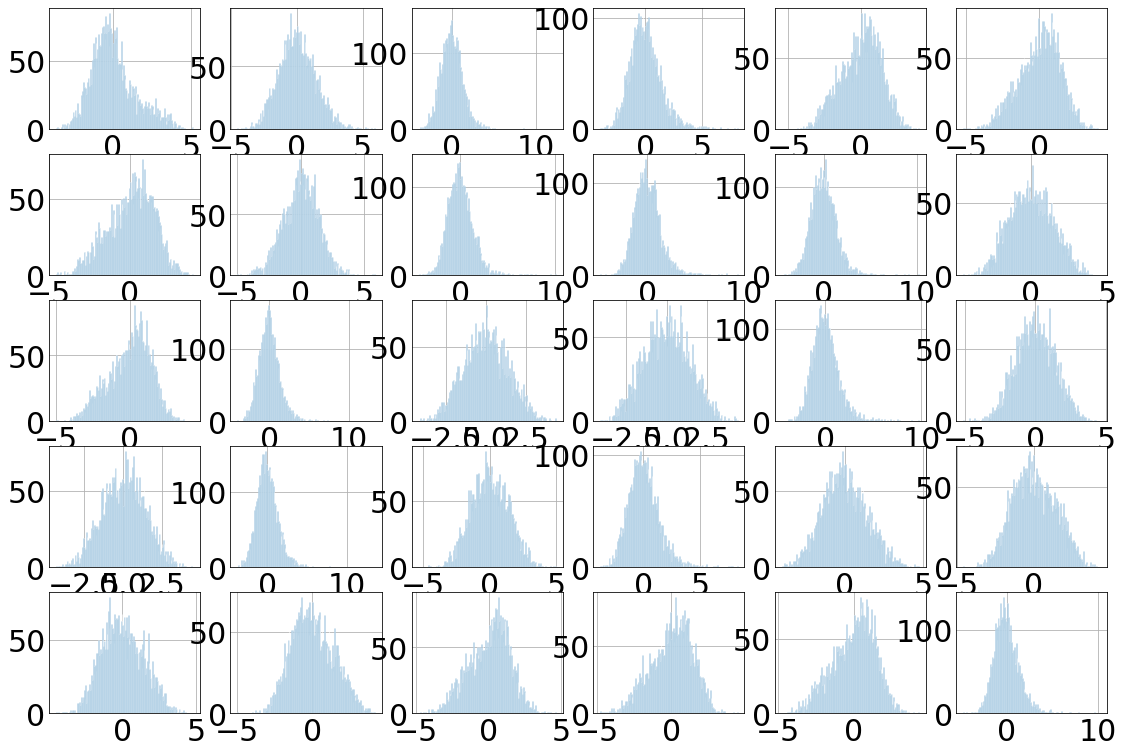

In [545]:
products_std_before, mean_products_std_before, std_products_std_before = standardize(products) 

plt.style.use('_mpl-gallery')
# make data
np.random.seed(1)
# plot:
fig, ax = plt.subplots(5,6)

fig.set_size_inches(15, 10)
i=0
j=0
for feature in products_std_before.T:
    thing = np.random.normal(feature)
    ax[i,j].hist(thing, bins=200, linewidth=0.5, edgecolor="white")
    if j==5:
        j = 0
        i += 1
    else:
        j += 1

plt.show()

### Before standardization

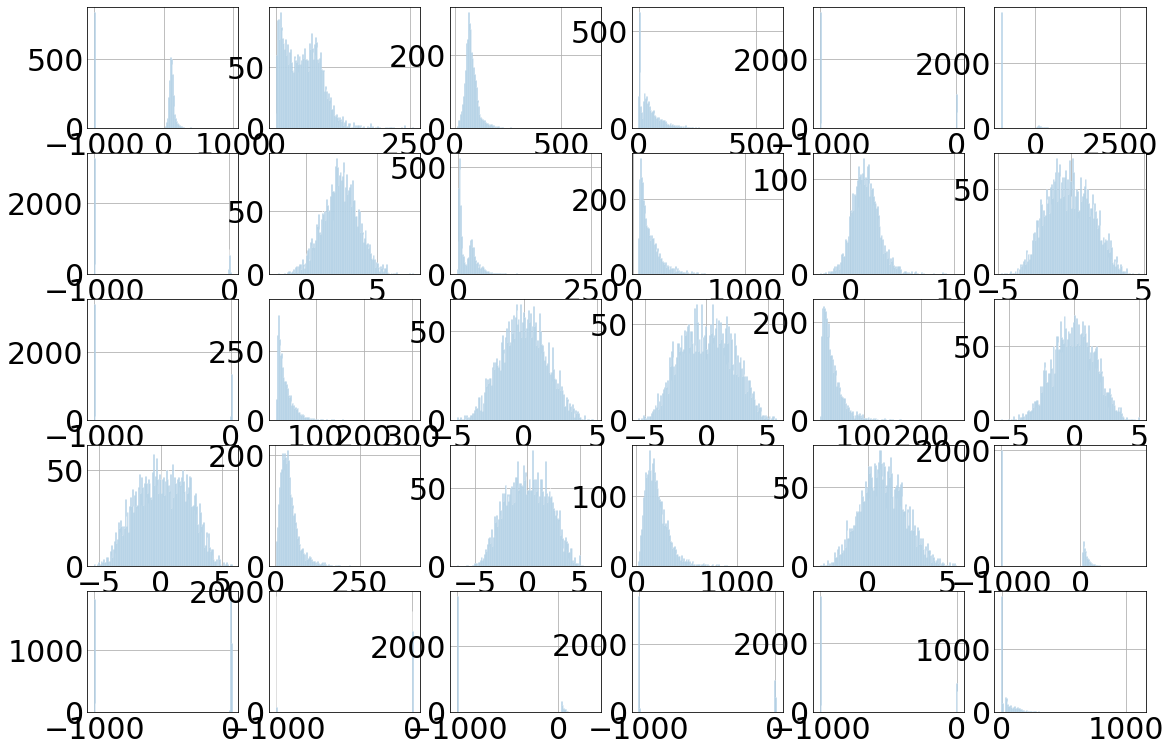

In [454]:
plt.style.use('_mpl-gallery')
# make data
np.random.seed(1)
# plot:
fig, ax = plt.subplots(5,6)

fig.set_size_inches(15, 10)
i=0
j=0
for feature in products.T:
    thing = np.random.normal(feature)
    ax[i,j].hist(thing, bins=200, linewidth=0.5, edgecolor="white")
    if j==5:
        j = 0
        i += 1
    else:
        j += 1

plt.show()

#0,1,2,3,4,5 6, 8,9, 12, 13, 16,19,21,23  24, 25,26,27,28,29

### WE log and standardize the rest

In [569]:
#print(x.T)
list_to_log =  [0,1,2,3,4,5, 6, 8,9, 12, 13, 16,19,21,23,24, 25,26,27,28,29]
#standardize the 
particle, products, ids = load_csv_data('data/train.csv', sub_sample= True)
products_logged_and_std = np.zeros(products.shape)

'''
for i in range(30):
    if i in list_to_log:
        #products_logged_and_std[:, i] = products[:, i] -min(products[:, i]) + 1
        #products_logged_and_std[:, i] = np.log(products_logged_and_std[:, i])
        continue
    else :
        products_logged_and_std[:, i],_,_ = standardize(products[:, i])       '''



In [578]:
for i in range(30):
    if i not in list_to_log:
        products_logged_and_std[:, i] = products[:, i] -min(products[:, i]) + 1
        products_logged_and_std[:, i] = np.log(products_logged_and_std[:, i])   
    else:
        products_logged_and_std[:, i] = products[:, i] 

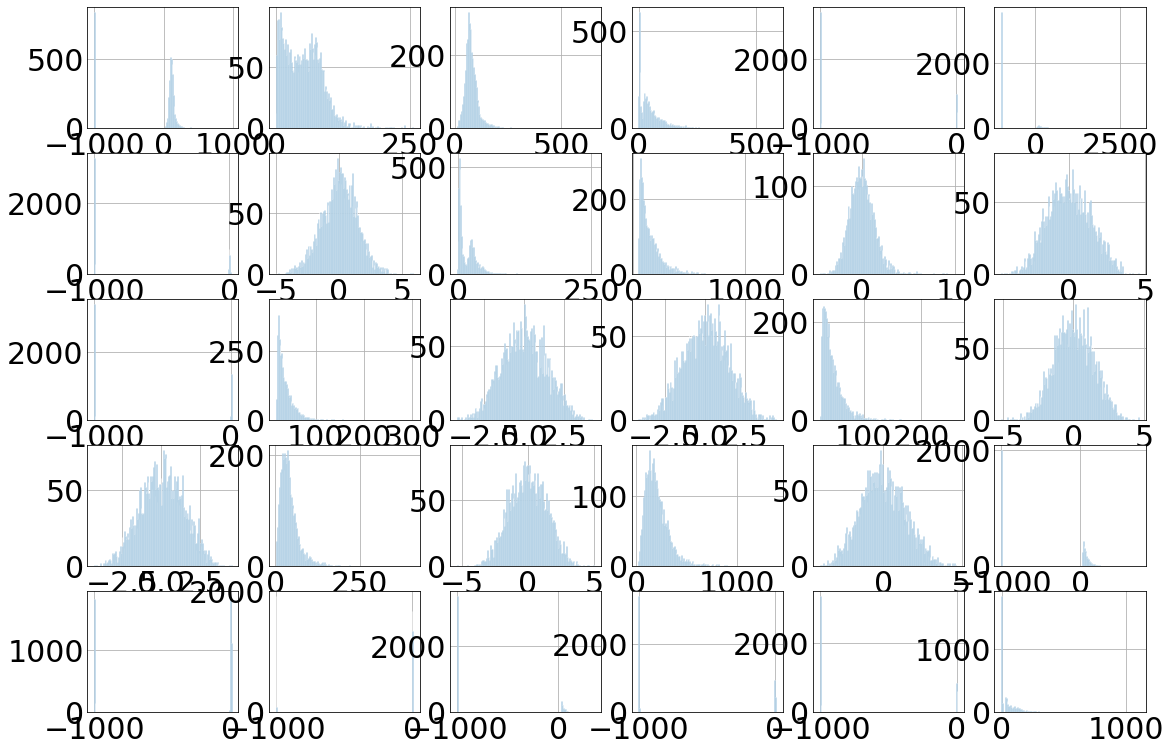

In [579]:
plt.style.use('_mpl-gallery')
# make data
np.random.seed(1)
# plot:
fig, ax = plt.subplots(5,6)

fig.set_size_inches(15, 10)
i=0
j=0
for s in products_logged_and_std.T:
    thing = np.random.normal(s)
    ax[i,j].hist(thing, bins=200, linewidth=0.5, edgecolor="white")
    if j==5:
        j = 0
        i += 1
    else:
        j += 1

plt.show()

In [580]:
print(products_logged_and_std)

[[ 138.47    51.655   97.827 ...    1.24    -2.475  113.497]
 [ 219.057   72.461  124.835 ... -999.    -999.      50.396]
 [  90.801   27.787   65.373 ... -999.    -999.      62.766]
 ...
 [ 142.347    7.389   99.212 ... -999.    -999.      97.068]
 [  78.162   46.335   60.136 ... -999.    -999.      32.44 ]
 [ 130.042    4.073   67.819 ... -999.    -999.      51.037]]


### standardize again 

In [463]:
#print(x.T)

list_to_std =  [0,4,5, 6, 12, 23,24, 25,26,27,28,29]
#standardize the 
for j in range(30):
    if j not in list_to_std:
        products_logged_and_std[:, j],_,_ = standardize(products_logged_and_std[:, j])        
        #products_logged_and_std[:, i] = products[:, i] -min(products[:, i]) + 1
        #products_logged_and_std[:, i] = np.log(products_logged_and_std[:, i])
    else :
 
        continue

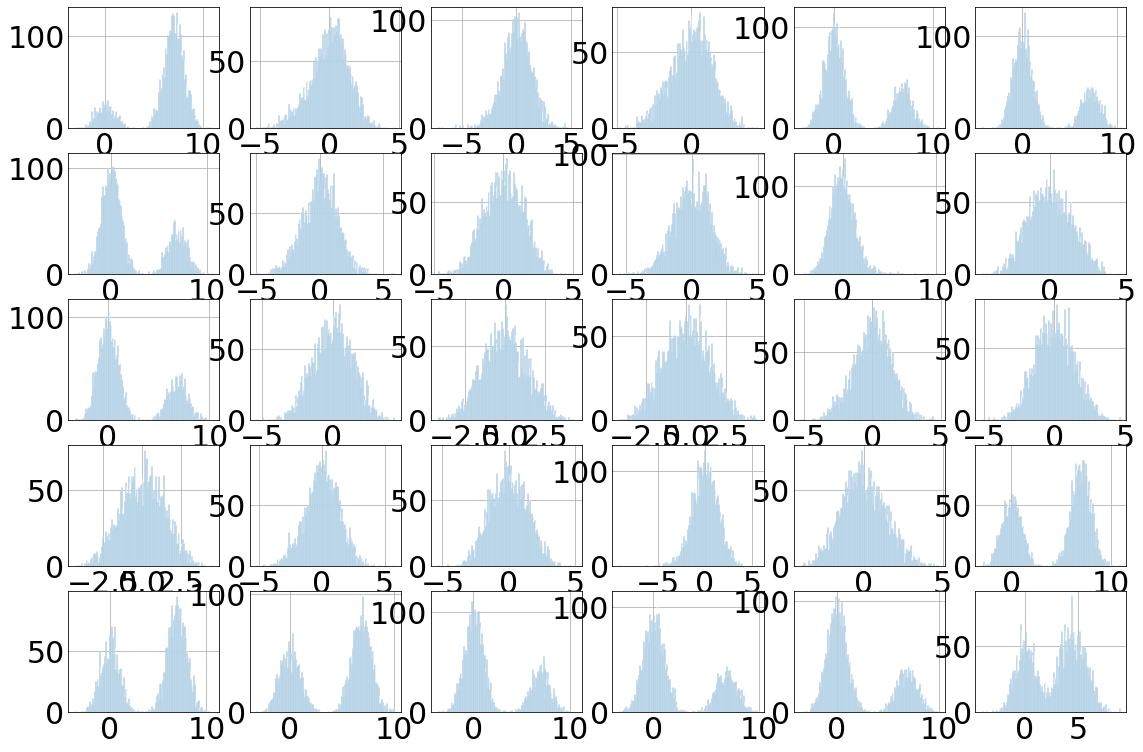

In [464]:
plt.style.use('_mpl-gallery')
# make data
np.random.seed(1)
# plot:
fig, ax = plt.subplots(5,6)

fig.set_size_inches(15, 10)
i=0
j=0
for feature in products_logged_and_std.T:
    thing = np.random.normal(feature)
    ax[i,j].hist(thing, bins=200, linewidth=0.5, edgecolor="white")
    if j==5:
        j = 0
        i += 1
    else:
        j += 1

plt.show()

In [582]:
# build sampled x and y.
seed = 1
y = np.expand_dims(particle, axis=1)
y, X = sample_data(y, products_std_before, seed, size_samples=500)
x, mean_x, std_x = standardize(X)

tx = np.c_[np.ones((y.shape[0], 1)), x]

In [466]:
np.corrcoef(X[:,0],X[:,-1])

array([[1.        , 0.25820039],
       [0.25820039, 1.        ]])

In [467]:
number_features=x.shape[1]
corr_matrix = np.zeros((number_features,number_features))

for i in range(number_features):
    for j in range(number_features):
        corr = np.corrcoef(x[:,i], x[:,j])[1,0]
        corr_matrix[i][j]=corr
#print(corr_matrix)

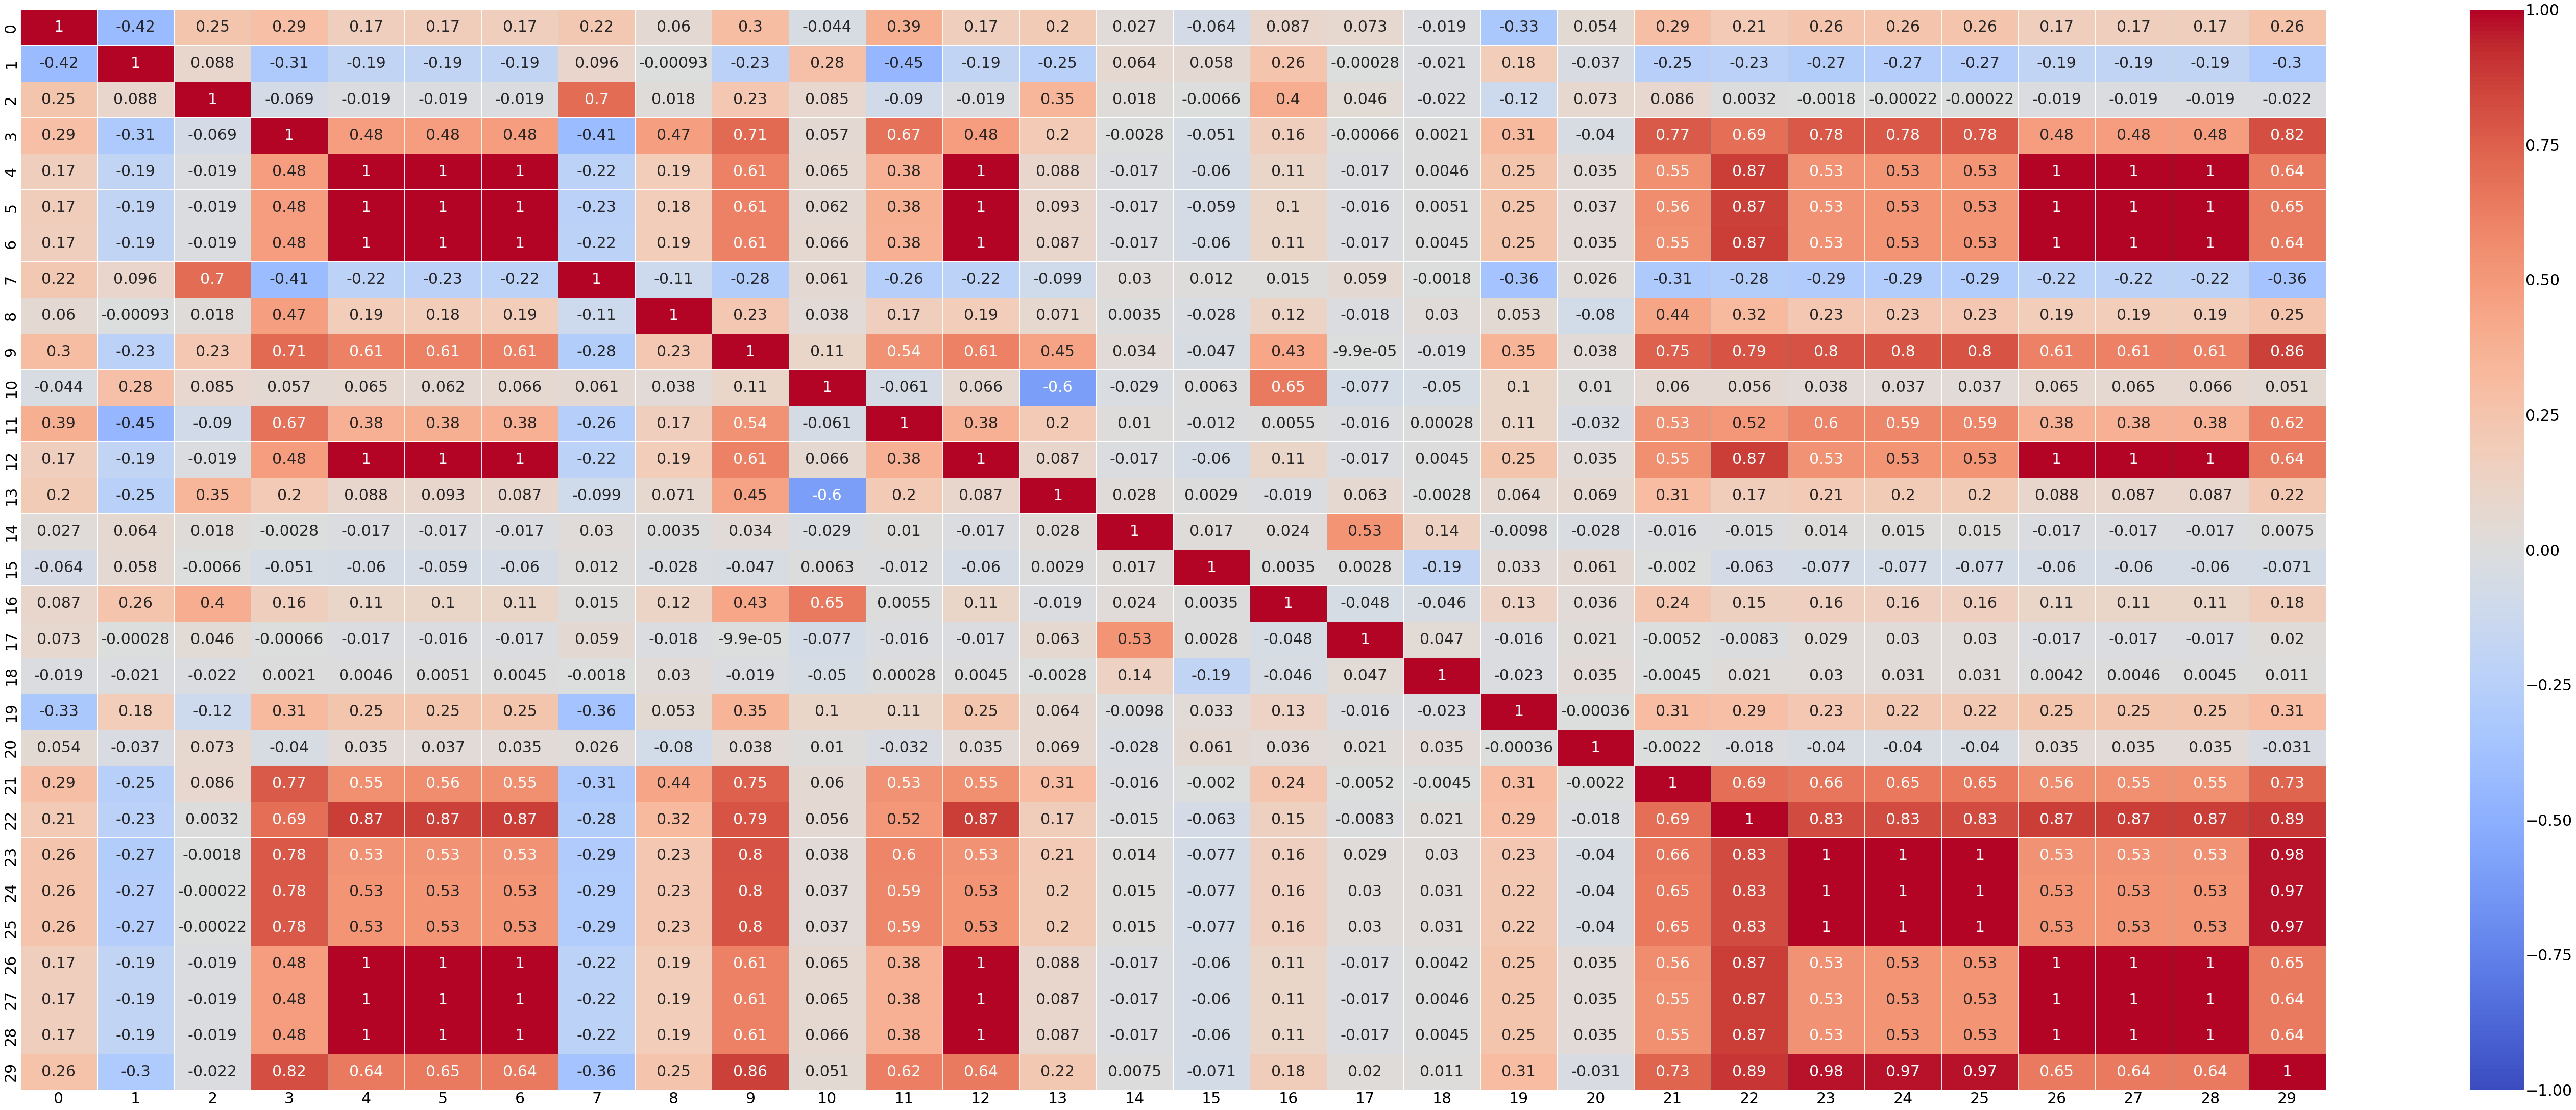

In [468]:
plt.figure(figsize=(80,30))
plt.rc('font',size=30)
sns.heatmap(corr_matrix,vmin = -1, vmax = 1, cmap = 'coolwarm',linewidths = .5, annot=True, annot_kws = {"size":30})
plt.show()

In [469]:
number_features=X.shape[1]
spearman_matrix = np.zeros((number_features,number_features))

for i in range(number_features):
    for j in range(number_features):
        spear,_ = stats.spearmanr(X[:,i],X[:,j])
        spearman_matrix[i][j]=spear

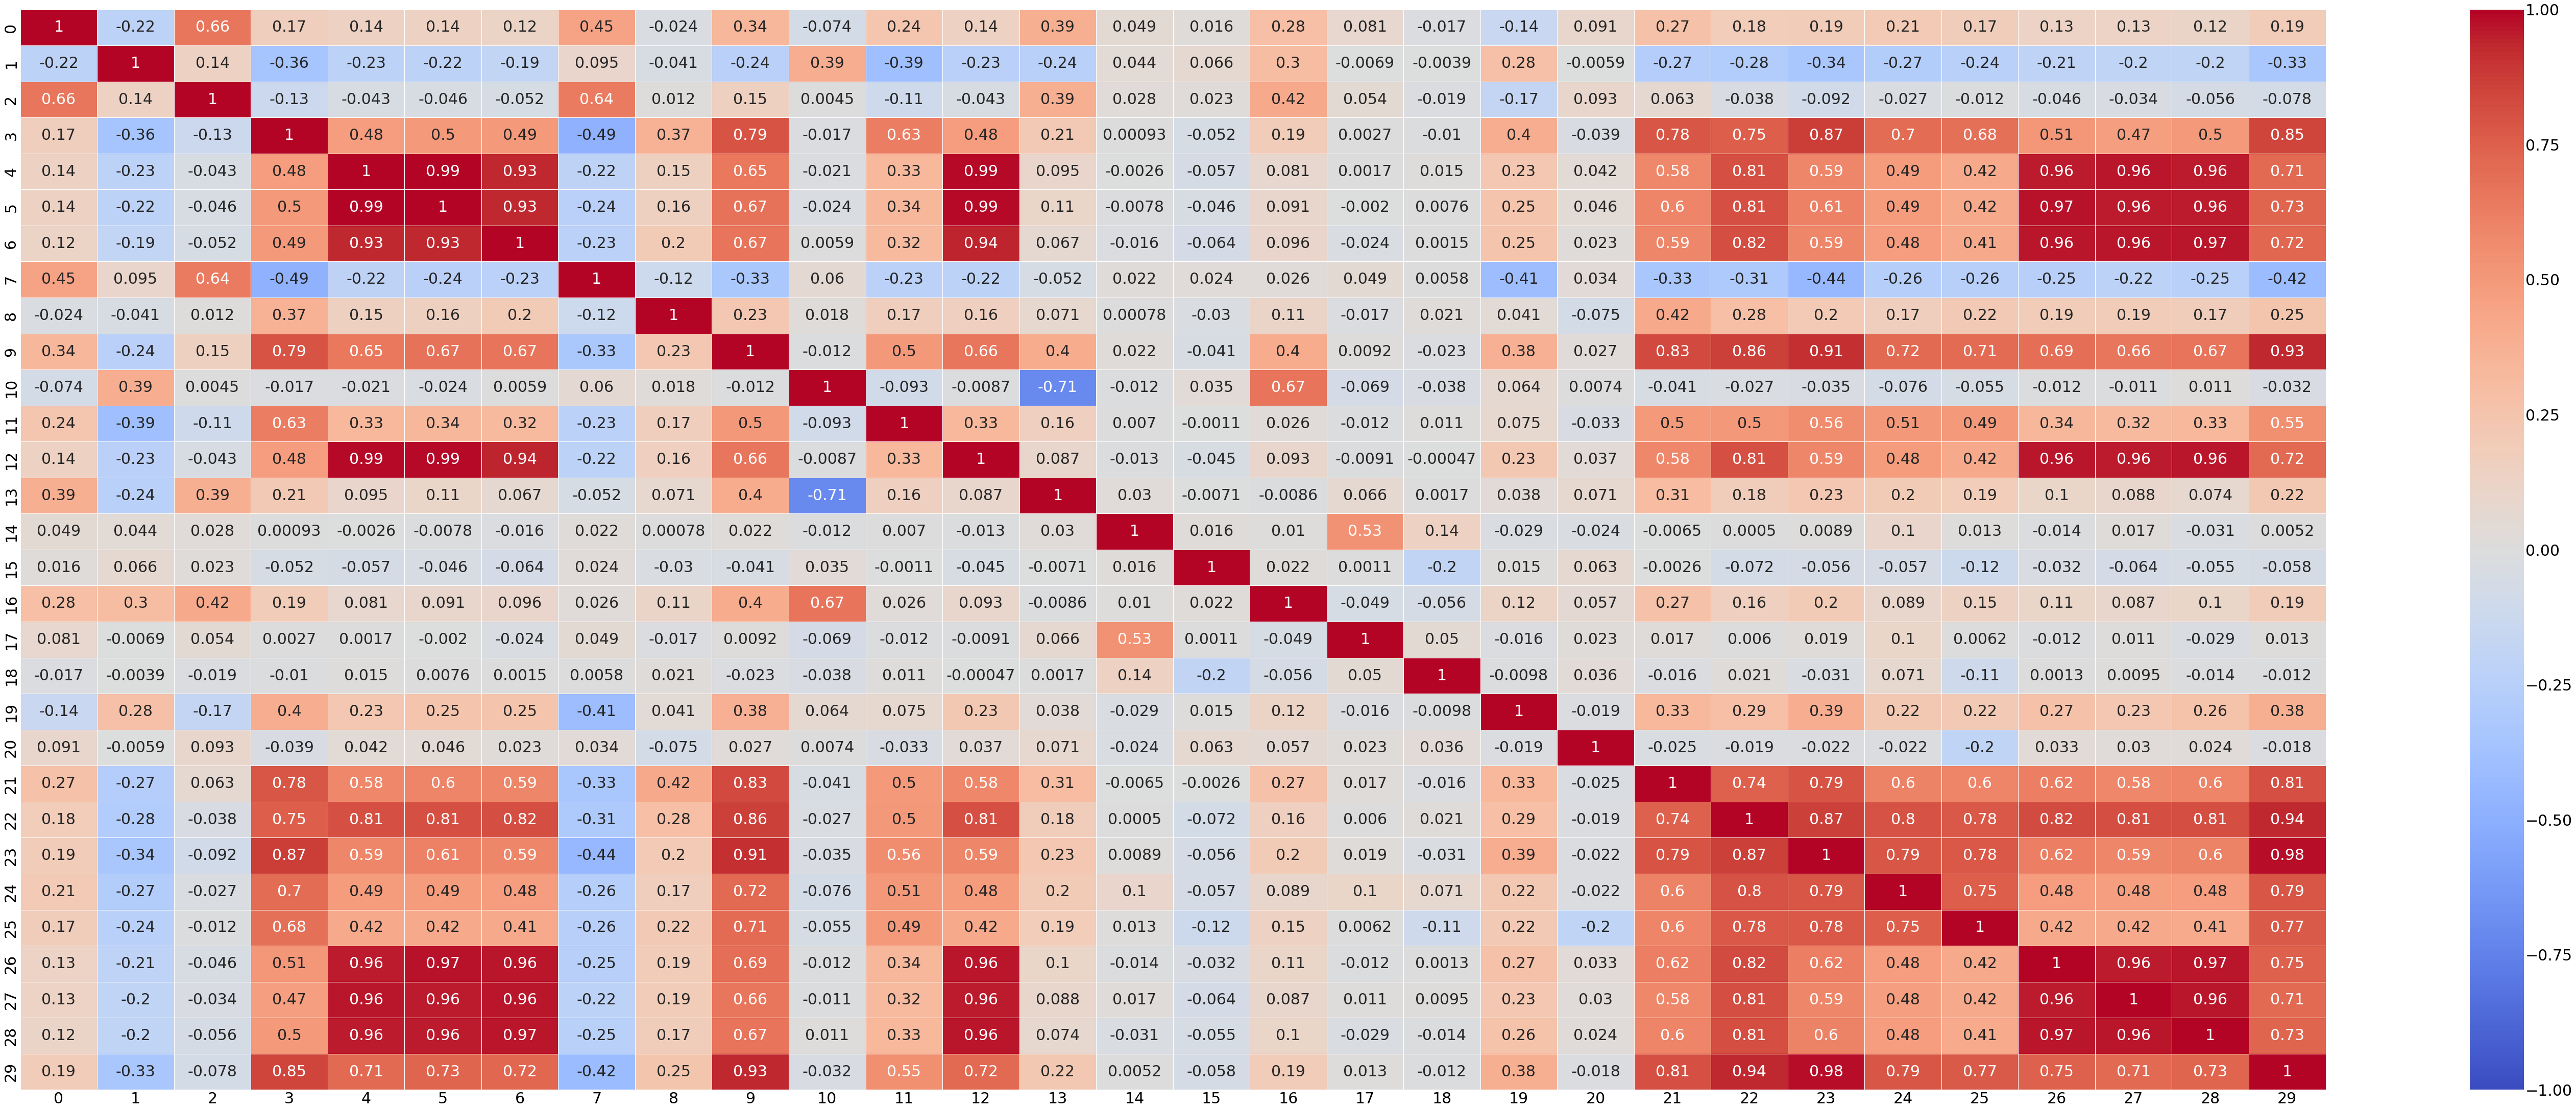

In [470]:
plt.figure(figsize=(80,30))
plt.rc('font',size=30)
sns.heatmap(spearman_matrix,vmin = -1, vmax = 1, cmap = 'coolwarm',linewidths = .5, annot=True, annot_kws = {"size":30})
plt.show()

### Create new tx matrix with uncorrelated features 

In [471]:
# Features that appear correlated
# Keep only 1 for each group of correlated features


#for each group, 
#26,28,27,12 --> 12
#23,24,25 --> 23
#4,5,6,12 --> 12
#29,9,3,21 --> 3




In [472]:
# create new matrix tx for training

axis = 1 #rows (0), columns (1)
obj = [4,5,6,9,21,24,25,26,27,28,29]
x_reduced = np.delete(x,obj,axis)
tx_reduced = np.c_[np.ones((y.shape[0], 1)), x_reduced]
#more drastic
#21 to 29

In [473]:
number_features=x_reduced.shape[1]
reduced_corr_matrix = np.zeros((number_features,number_features))

for i in range(number_features):
    for j in range(number_features):
        corr = np.corrcoef(x_reduced[:,i], x_reduced[:,j])[1,0]
        reduced_corr_matrix[i][j]=corr

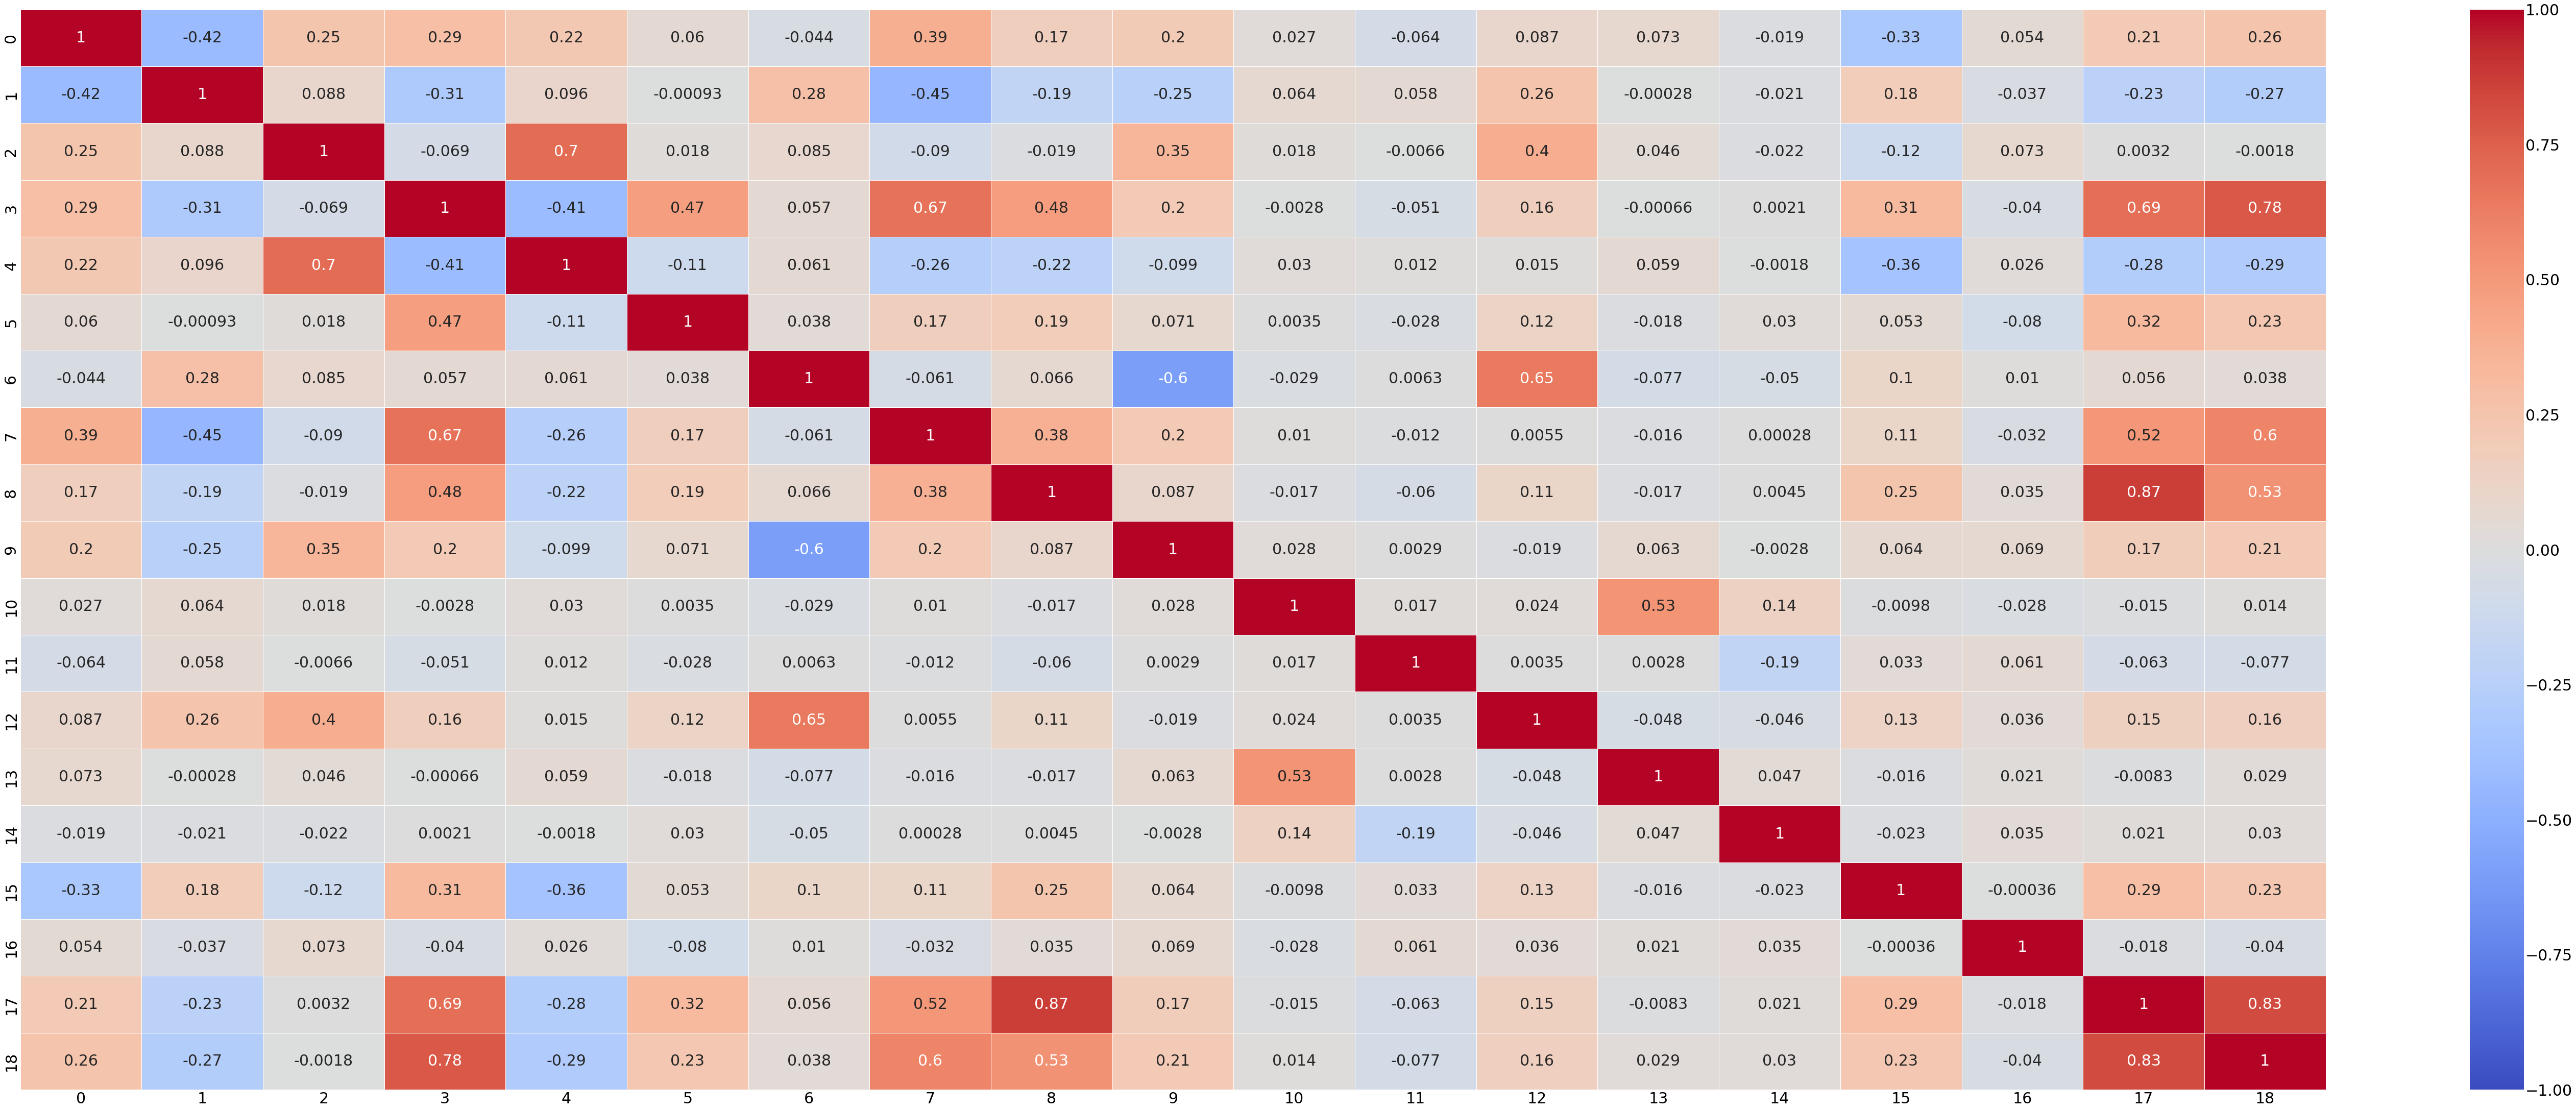

In [474]:
plt.figure(figsize=(80,30))
plt.rc('font',size=30)
sns.heatmap(reduced_corr_matrix,vmin = -1, vmax = 1, cmap = 'coolwarm',linewidths = .5, annot=True, annot_kws = {"size":30})
plt.show()

In [475]:
# 17,18,8 --> 8

axis = 1 #rows (0), columns (1)
obj = [17,18]
x_reduced = np.delete(x_reduced,obj,axis)
tx_reduced = np.c_[np.ones((y.shape[0], 1)), x_reduced]

In [476]:
number_features=x_reduced.shape[1]
reduced_corr_matrix = np.zeros((number_features,number_features))

for i in range(number_features):
    for j in range(number_features):
        corr = np.corrcoef(x_reduced[:,i], x_reduced[:,j])[1,0]
        reduced_corr_matrix[i][j]=corr

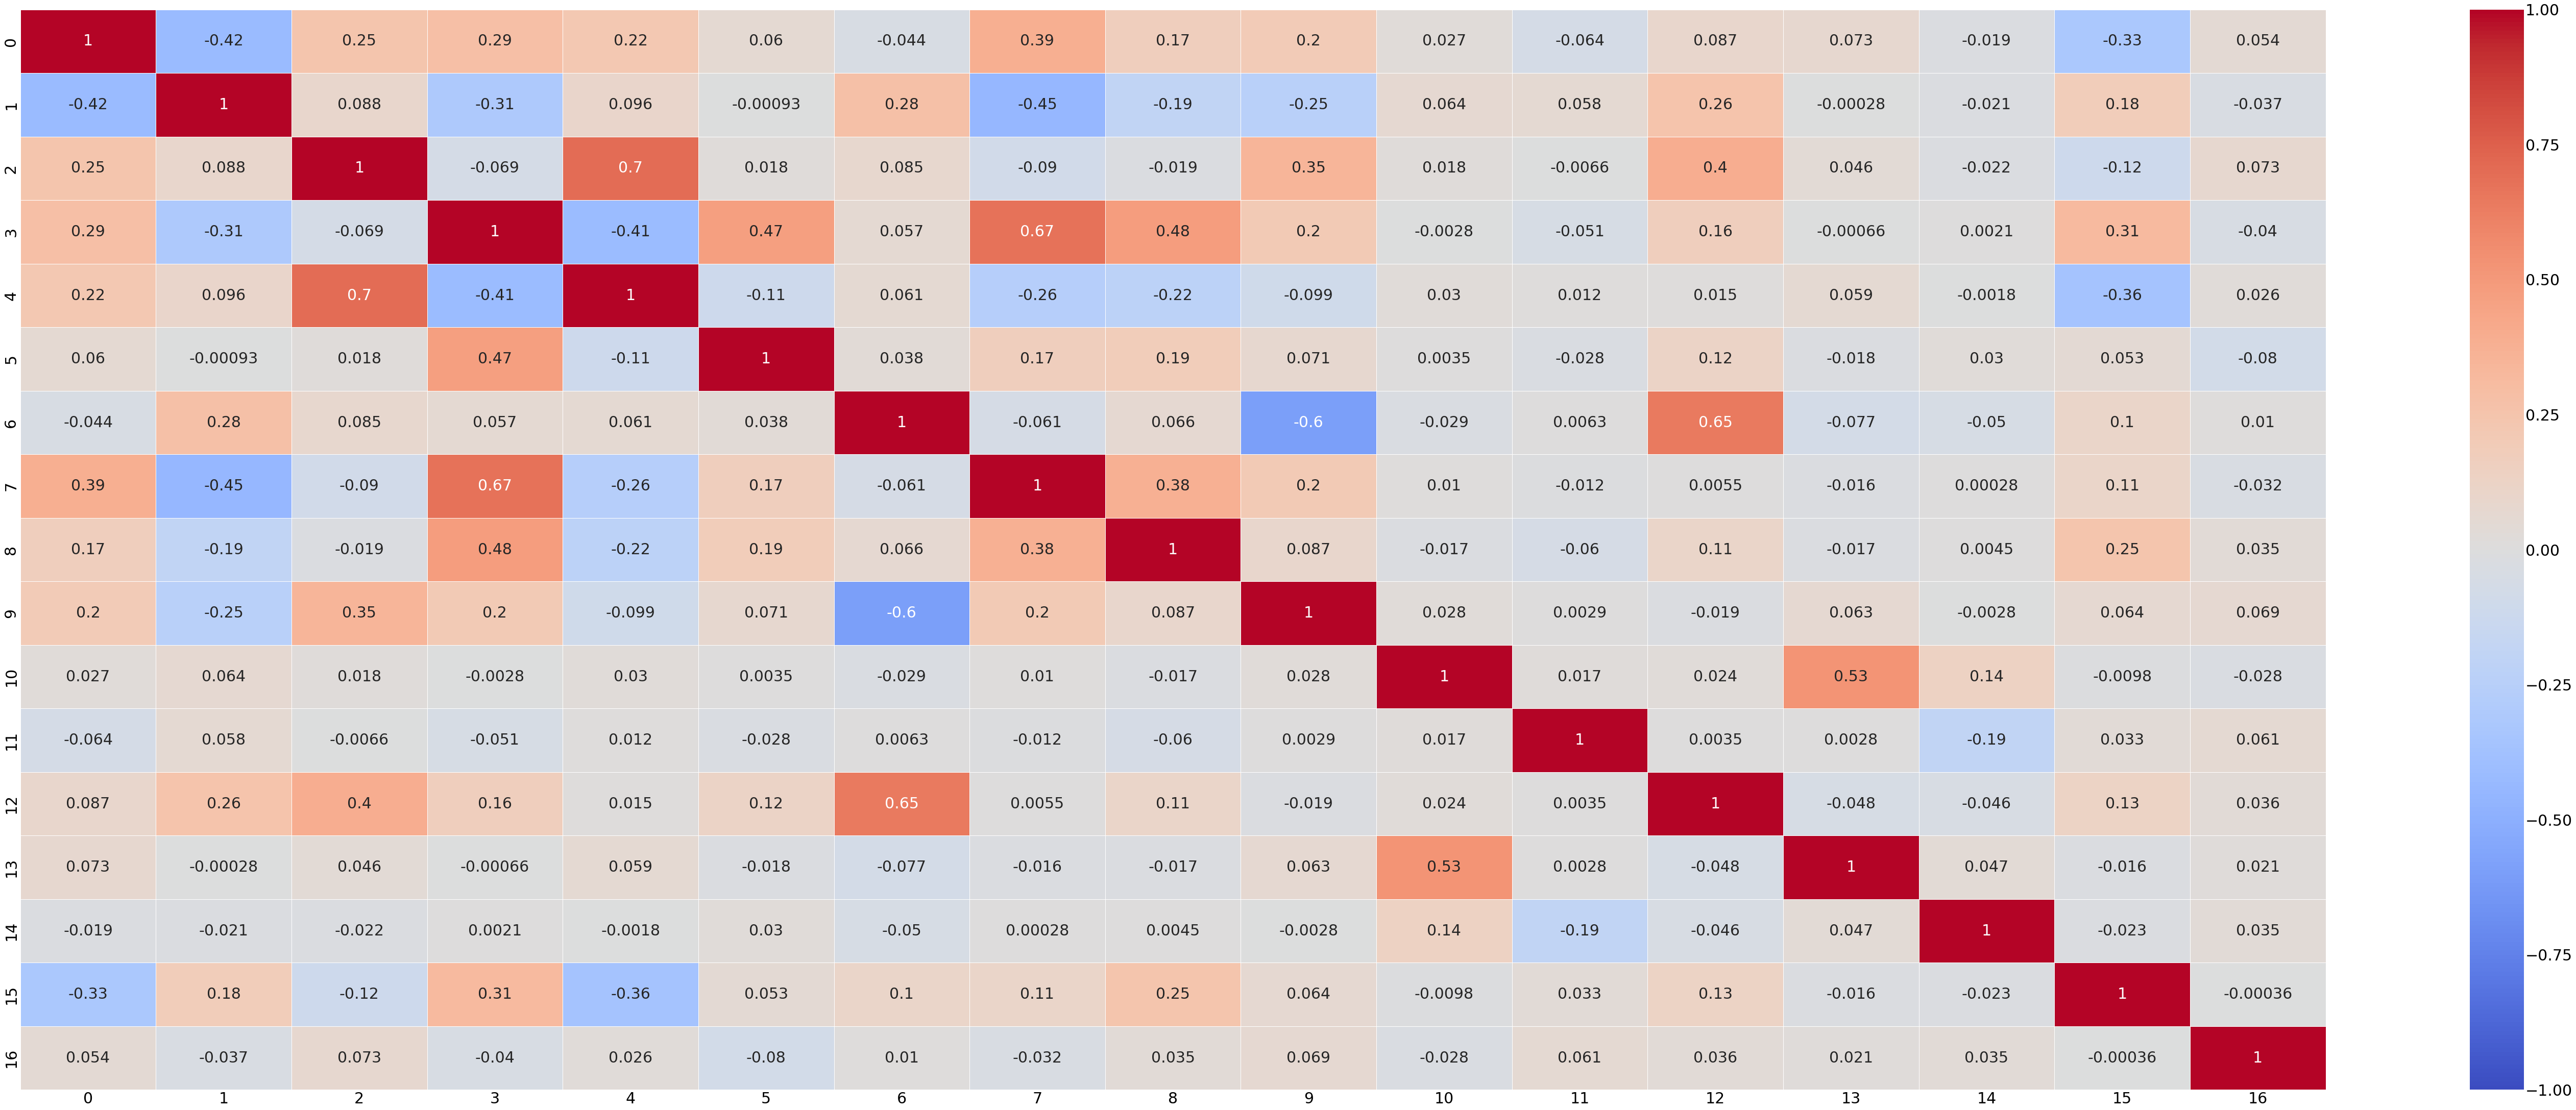

In [477]:
plt.figure(figsize=(80,30))
plt.rc('font',size=30)
sns.heatmap(reduced_corr_matrix,vmin = -1, vmax = 1, cmap = 'coolwarm',linewidths = .5, annot=True, annot_kws = {"size":30})
plt.show()

In [478]:
# it seems that there are no uncorrelated features anymore
# try tests to see if loss worsens

print(x_reduced.shape)

(500, 17)


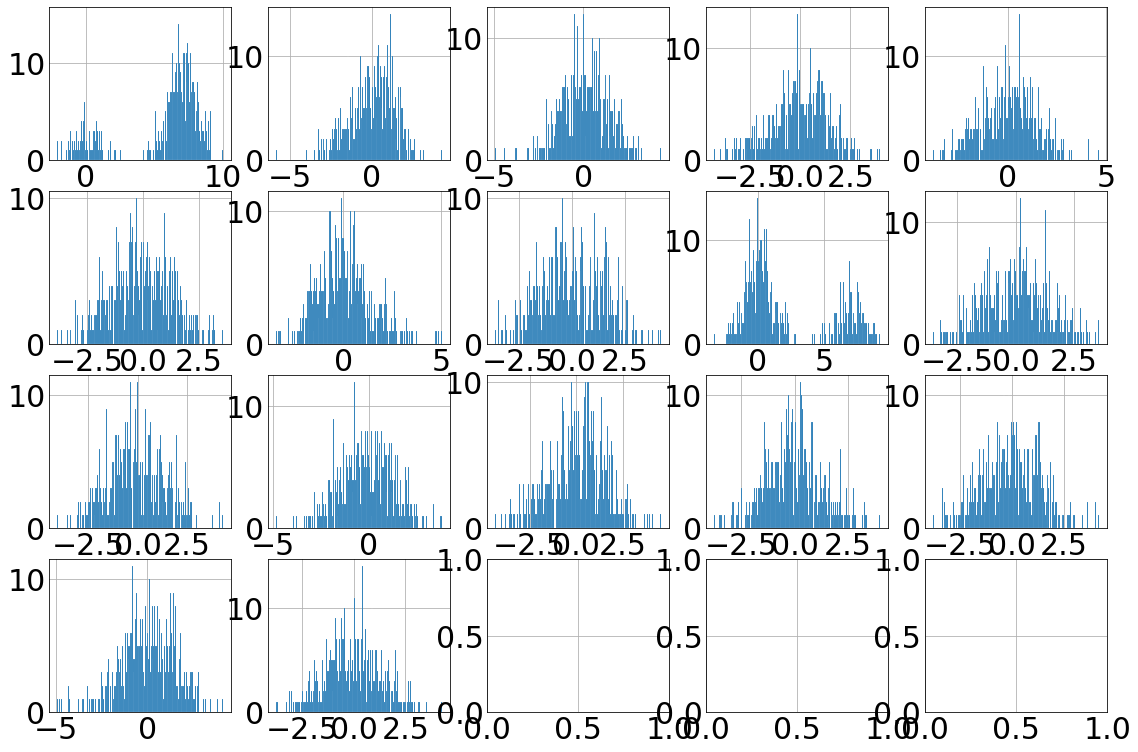

In [479]:
plt.style.use('_mpl-gallery')
# make data
np.random.seed(1)
# plot:
fig, ax = plt.subplots(4,5)

fig.set_size_inches(15, 10)
i=0
j=0
for feature in x_reduced.T:
    az = np.random.normal(feature)
    ax[i,j].hist(az, bins=200, linewidth=0.1, edgecolor="white")
    if j==4:
        j = 0
        i += 1
    else:
        j += 1

plt.show()

In [350]:
print(x_reduced[2])# = np.log(x_reduced[2])

[-0.75871932         nan         nan  0.9765843          nan  1.13013938
         nan  0.00648281  0.44705602  1.16924515         nan         nan
 -0.66485929         nan         nan -0.24699106         nan]


### Gradient Descent

In [4]:
print(y.shape, x.shape)
np.seterr(divide = 'ignore') 
initial_w = np.zeros((tx.shape[1], 1))

(1000, 1) (1000, 30)


We need to find a balance between the number of iteration and gamma (the step size), the shorter the number of iterations we do, the faster it runs but we stay far away from an optimum loss

In [5]:
start_time = time.time()
w_gd, loss_gd = mean_squared_error_gd(y, tx, initial_w, 10, 0.001)
print("loss:", np.sqrt(2*loss_gd[0][0]), "--- %s seconds ---" % (time.time() - start_time))

loss: 0.9887157191548617 --- 0.009551763534545898 seconds ---


If we increment too much the number of iterations then the code becomes really slow

In [6]:
start_time = time.time()
w_gd, loss_gd = mean_squared_error_gd(y, tx, initial_w, 1000000, 0.001)
print("loss:", np.sqrt(2*loss_gd[0][0]), "--- %s seconds ---" % (time.time() - start_time))

loss: 0.8127890774559601 --- 51.643584966659546 seconds ---


As we can see our loss has reduced significantly, however it took too long to compute

In [29]:
start_time = time.time()
w_gd, loss_gd = mean_squared_error_gd(y, tx, initial_w, 10000, 0.001)
print("loss:", np.sqrt(2*loss_gd), "--- %s seconds ---" % (time.time() - start_time))


    


loss: 0.798172439758586 --- 0.41664981842041016 seconds ---


Here we can see a good balance, the loss has barely increased and the computing time is much lower.
The logic is similar respect to gamma, the shorter the step size is, the more iterations we would need to get to the optimal loss

In [8]:
start_time = time.time()
w_gd, loss_gd = mean_squared_error_gd(y, tx, initial_w, 10000, 0.0000001)
print("loss:", np.sqrt(2*loss_gd[0][0]), "--- %s seconds ---" % (time.time() - start_time))

loss: 0.9986612313087818 --- 0.5388510227203369 seconds ---


And the larger the gamma, we might miss the optimal loss and diverge

### Stochastic Gradient Descent

In [505]:

np.seterr(divide = 'ignore') 

initial_w = np.zeros((tx.shape[1], 1))

start_time = time.time()

w_sgd, loss_sgd = mean_squared_error_sgd(y, tx, initial_w, 10000, 0.001)
print("loss:", np.sqrt(2*loss_sgd), "--- %s seconds ---" % (time.time() - start_time))


for i, w in enumerate(w_sgd):
    print(i, w)

loss: 0.3991460713305783 --- 0.4150233268737793 seconds ---
0 [0.08456498]
1 [0.01006553]
2 [-0.09996828]
3 [-0.00634934]
4 [0.00254583]
5 [0.00274273]
6 [0.02726688]
7 [0.00162295]
8 [0.02119135]
9 [-0.0038897]
10 [0.04993908]
11 [-0.01102308]
12 [0.03192682]
13 [0.00247752]
14 [0.080819]
15 [-0.01311704]
16 [0.01122749]
17 [-0.04724055]
18 [0.00437587]
19 [0.00915033]
20 [-0.02657557]
21 [-0.0267878]
22 [-0.00188749]
23 [-0.15402618]
24 [-0.00473659]
25 [-0.00818054]
26 [-0.0080013]
27 [-0.00100228]
28 [0.00230627]
29 [0.00242229]
30 [0.08547168]


### EDA

import pandas as pd
X_panda = pd.DataFrame(X)

plt.figure(figsize=(80,30))
plt.rc('font',size=30)
sns.heatmap(data = X_panda.corr().round(2),vmin = -1, vmax = 1, cmap = 'coolwarm',linewidths = .5, annot=True, annot_kws = {"size":30})
plt.show()

along the diagonal 1 --> my correlation between the same feature
4,5,6,12 --> seem to be correlated (correlation score between 0.95 and 1)
from 21 to 29 --> more or less correlated
from 3 to 12 and from 21 to 29 seem to be correlated

### LEAST SQUARES WITH NORMAL EQUATIONS

In [509]:
print(y.shape, x.shape)

for i in products:
    for j in i:
        print("{",j,"}")
#for i in  
w_ls , loss_ls = least_squares(y,tx)
print(np.sqrt(2*loss_ls))


#26,28,27,12 --> 12
#23,24,25 --> 23
#4,5,6,12 --> 12
#29,9,3,21 --> 3

for i, w in enumerate(w_ls):
    print(i, w)

(500, 1) (500, 30)
{ 138.47 }
{ 51.655 }
{ 97.827 }
{ 27.98 }
{ 0.91 }
{ 124.711 }
{ 2.666 }
{ 3.064 }
{ 41.928 }
{ 197.76 }
{ 1.582 }
{ 1.396 }
{ 0.2 }
{ 32.638 }
{ 1.017 }
{ 0.381 }
{ 51.626 }
{ 2.273 }
{ -2.414 }
{ 16.824 }
{ -0.277 }
{ 258.733 }
{ 2.0 }
{ 67.435 }
{ 2.15 }
{ 0.444 }
{ 46.062 }
{ 1.24 }
{ -2.475 }
{ 113.497 }
{ 219.057 }
{ 72.461 }
{ 124.835 }
{ 5.506 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.771 }
{ 46.936 }
{ 122.986 }
{ 1.932 }
{ -1.382 }
{ -999.0 }
{ 24.759 }
{ -1.063 }
{ 0.332 }
{ 47.83 }
{ 1.347 }
{ -2.569 }
{ 28.499 }
{ 0.96 }
{ 90.355 }
{ 1.0 }
{ 50.396 }
{ -0.708 }
{ -0.642 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 50.396 }
{ 90.801 }
{ 27.787 }
{ 65.373 }
{ 55.978 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.457 }
{ 20.608 }
{ 138.624 }
{ 2.452 }
{ 1.405 }
{ -999.0 }
{ 21.977 }
{ 1.603 }
{ -0.643 }
{ 53.881 }
{ 1.873 }
{ 1.799 }
{ 18.209 }
{ 0.88 }
{ 219.339 }
{ 1.0 }
{ 62.766 }
{ 0.778 }
{ -2.209 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 62.766 }
{ 128.167 }
{ 52.145 }
{ 86

{ 1.0 }
{ 105.329 }
{ -2.419 }
{ -1.699 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 105.329 }
{ -999.0 }
{ 102.014 }
{ 107.649 }
{ 2.464 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.3 }
{ 2.464 }
{ 114.745 }
{ 1.256 }
{ -1.408 }
{ -999.0 }
{ 50.862 }
{ 1.083 }
{ 2.137 }
{ 63.883 }
{ 1.664 }
{ -0.089 }
{ 50.966 }
{ -2.301 }
{ 103.484 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 81.145 }
{ 31.679 }
{ 59.456 }
{ 36.264 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.119 }
{ 1.461 }
{ 98.557 }
{ 1.206 }
{ -0.88 }
{ -999.0 }
{ 28.748 }
{ -1.99 }
{ -0.259 }
{ 34.669 }
{ -1.092 }
{ -2.178 }
{ 25.676 }
{ 2.985 }
{ 126.917 }
{ 1.0 }
{ 35.139 }
{ -2.075 }
{ 1.097 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 35.139 }
{ 106.279 }
{ 62.978 }
{ 67.003 }
{ 24.251 }
{ 0.923 }
{ 81.556 }
{ 0.228 }
{ 3.073 }
{ 20.619 }
{ 139.332 }
{ 1.132 }
{ -1.09 }
{ 0.005 }
{ 30.906 }
{ -1.324 }
{ 1.895 }
{ 34.995 }
{ -1.719 }
{ -1.153 }
{ 28.335 }
{ 1.999 }
{ 203.407 }
{ 2.0 }
{ 37.568 }
{ -0.202 }
{ -1.5

{ 71.405 }
{ 26.902 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.008 }
{ 26.902 }
{ 69.287 }
{ 2.419 }
{ 0.819 }
{ -999.0 }
{ 20.264 }
{ 2.412 }
{ -1.243 }
{ 49.023 }
{ 1.351 }
{ 2.225 }
{ 49.547 }
{ -1.196 }
{ 60.307 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 135.496 }
{ 52.84 }
{ 114.551 }
{ 46.116 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.029 }
{ 113.625 }
{ 129.602 }
{ 1.213 }
{ -0.79 }
{ -999.0 }
{ 28.024 }
{ -0.397 }
{ 0.164 }
{ 33.984 }
{ 2.229 }
{ 1.674 }
{ 47.414 }
{ 3.111 }
{ 156.204 }
{ 1.0 }
{ 67.593 }
{ -1.93 }
{ 2.021 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 67.593 }
{ 77.895 }
{ 38.471 }
{ 49.311 }
{ 68.067 }
{ 1.017 }
{ 201.512 }
{ 1.218 }
{ 1.873 }
{ 35.267 }
{ 317.126 }
{ 0.926 }
{ 1.333 }
{ 0.0 }
{ 31.391 }
{ 0.386 }
{ -1.81 }
{ 29.077 }
{ 0.757 }
{ 0.026 }
{ 32.543 }
{ -1.325 }
{ 331.182 }
{ 3.0 }
{ 106.365 }
{ -0.707 }
{ 1.917 }
{ 73.805 }
{ -1.724 }
{ -1.269 }
{ 256.657 }
{ -999.0 }
{ 59.767 }
{ 56.804 }
{ 0.676 }
{ -999.0 }
{ -999.0 

{ 30.093 }
{ 0.263 }
{ -2.007 }
{ 49.189 }
{ 0.806 }
{ 66.694 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 117.23 }
{ 136.817 }
{ 159.716 }
{ 1.451 }
{ 179.641 }
{ 3.599 }
{ 2.33 }
{ 87.745 }
{ 292.069 }
{ 3.254 }
{ -0.388 }
{ 0.005 }
{ 30.264 }
{ 2.232 }
{ -0.153 }
{ 98.47 }
{ 0.363 }
{ 1.238 }
{ 108.628 }
{ 2.443 }
{ 418.802 }
{ 2.0 }
{ 111.045 }
{ 1.306 }
{ -1.467 }
{ 52.29 }
{ 2.757 }
{ 2.811 }
{ 163.336 }
{ 87.106 }
{ 55.053 }
{ 66.749 }
{ 1.977 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.739 }
{ 1.977 }
{ 65.868 }
{ 1.452 }
{ -1.386 }
{ -999.0 }
{ 26.858 }
{ 0.448 }
{ -0.837 }
{ 39.01 }
{ -0.235 }
{ 2.794 }
{ 21.609 }
{ 0.299 }
{ 54.367 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 142.171 }
{ 20.53 }
{ 79.395 }
{ 48.058 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.954 }
{ 48.058 }
{ 70.972 }
{ 0.686 }
{ 1.386 }
{ -999.0 }
{ 42.085 }
{ 0.97 }
{ -0.661 }
{ 28.887 }
{ -0.132 }
{ 2.08 }
{ 43.133 }
{ 1.4

{ 199.986 }
{ 1.0 }
{ 36.657 }
{ -1.671 }
{ 1.342 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 36.657 }
{ 122.455 }
{ 57.615 }
{ 85.75 }
{ 44.718 }
{ 0.797 }
{ 113.822 }
{ 1.187 }
{ 3.097 }
{ 54.614 }
{ 237.707 }
{ 0.663 }
{ -1.414 }
{ 0.01 }
{ 52.257 }
{ -0.561 }
{ -0.276 }
{ 34.635 }
{ -0.308 }
{ 2.92 }
{ 40.783 }
{ 1.174 }
{ 321.154 }
{ 3.0 }
{ 57.92 }
{ -0.762 }
{ 1.37 }
{ 46.996 }
{ -1.558 }
{ -1.747 }
{ 150.815 }
{ 123.118 }
{ 43.616 }
{ 89.745 }
{ 6.87 }
{ 2.711 }
{ 147.284 }
{ -1.641 }
{ 3.13 }
{ 1.831 }
{ 158.859 }
{ 1.156 }
{ -1.414 }
{ 1.0 }
{ 40.504 }
{ -0.025 }
{ -0.891 }
{ 46.843 }
{ 0.467 }
{ 2.2 }
{ 11.993 }
{ -1.747 }
{ 191.176 }
{ 2.0 }
{ 39.524 }
{ 1.799 }
{ 0.958 }
{ 31.988 }
{ -0.912 }
{ -2.121 }
{ 71.512 }
{ 124.159 }
{ 22.057 }
{ 94.388 }
{ 1.546 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.218 }
{ 1.546 }
{ 78.128 }
{ 0.944 }
{ -1.414 }
{ -999.0 }
{ 40.197 }
{ 0.427 }
{ -1.439 }
{ 37.931 }
{ -0.854 }
{ 1.893 }
{ 6.698 }
{ 0.365 }
{ 138.721 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -9

{ 78.963 }
{ 60.839 }
{ 13.258 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.072 }
{ 13.258 }
{ 66.548 }
{ 1.863 }
{ -1.228 }
{ -999.0 }
{ 23.242 }
{ -1.012 }
{ -0.445 }
{ 43.306 }
{ -2.09 }
{ -2.214 }
{ 36.687 }
{ 1.204 }
{ 144.989 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 142.535 }
{ 67.582 }
{ 76.292 }
{ 17.115 }
{ 2.418 }
{ 221.514 }
{ -0.346 }
{ 3.494 }
{ 18.705 }
{ 179.333 }
{ 1.863 }
{ 1.402 }
{ 0.039 }
{ 20.262 }
{ 0.572 }
{ 1.524 }
{ 37.75 }
{ -1.12 }
{ -1.533 }
{ 31.201 }
{ 1.257 }
{ 236.128 }
{ 2.0 }
{ 63.45 }
{ -0.153 }
{ 1.582 }
{ 57.871 }
{ 2.266 }
{ -1.69 }
{ 121.321 }
{ 68.04 }
{ 33.831 }
{ 52.957 }
{ 4.933 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.622 }
{ 4.933 }
{ 49.459 }
{ 1.252 }
{ -1.413 }
{ -999.0 }
{ 21.966 }
{ -1.718 }
{ 2.655 }
{ 27.493 }
{ -0.692 }
{ 0.243 }
{ 14.133 }
{ -1.821 }
{ 107.862 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 93.227 }
{ 73.826 }
{ 0.136 }
{ -999.0 }


{ 1.0 }
{ 39.552 }
{ 2.706 }
{ -0.371 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 39.552 }
{ -999.0 }
{ 85.681 }
{ 33.514 }
{ 9.708 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.052 }
{ 9.708 }
{ 65.994 }
{ 1.269 }
{ -1.394 }
{ -999.0 }
{ 29.089 }
{ 1.48 }
{ -3.061 }
{ 36.905 }
{ 1.921 }
{ 2.268 }
{ 53.946 }
{ -0.307 }
{ 106.275 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 157.504 }
{ 52.292 }
{ 30.195 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.261 }
{ 30.195 }
{ 87.238 }
{ 2.632 }
{ -0.416 }
{ -999.0 }
{ 24.018 }
{ 1.163 }
{ -0.705 }
{ 63.22 }
{ 2.404 }
{ -0.926 }
{ 99.471 }
{ 1.98 }
{ 127.601 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 159.669 }
{ 63.081 }
{ 128.142 }
{ 22.112 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.493 }
{ 22.112 }
{ 74.584 }
{ 1.971 }
{ -1.414 }
{ -999.0 }
{ 25.106 }
{ -2.141 }
{ 2.956 }
{ 49.478 }
{ 0.304 }
{ -0.834 }
{ 29.299 }
{ 1.119 }
{ 122.47 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }


{ 154.02 }
{ 0.876 }
{ 77.321 }
{ 0.073 }
{ 1.163 }
{ 15.424 }
{ 217.706 }
{ 1.734 }
{ 1.315 }
{ 0.004 }
{ 21.827 }
{ -1.767 }
{ 2.258 }
{ 37.853 }
{ -1.547 }
{ 1.116 }
{ 103.167 }
{ 1.438 }
{ 277.416 }
{ 2.0 }
{ 116.244 }
{ -0.953 }
{ -1.632 }
{ 41.783 }
{ -0.077 }
{ -2.193 }
{ 158.027 }
{ 93.614 }
{ 42.187 }
{ 53.257 }
{ 117.244 }
{ 5.375 }
{ 894.66 }
{ -7.211 }
{ 1.499 }
{ 3.16 }
{ 226.114 }
{ 0.622 }
{ 1.339 }
{ 0.922 }
{ 49.526 }
{ -0.732 }
{ -1.178 }
{ 30.8 }
{ -0.654 }
{ -2.675 }
{ 57.15 }
{ -1.621 }
{ 279.506 }
{ 2.0 }
{ 112.983 }
{ -2.578 }
{ 1.782 }
{ 32.804 }
{ 2.797 }
{ 0.214 }
{ 145.787 }
{ 155.543 }
{ 19.925 }
{ 95.857 }
{ 29.784 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.087 }
{ 29.784 }
{ 103.069 }
{ 0.399 }
{ -1.412 }
{ -999.0 }
{ 73.671 }
{ -1.277 }
{ -0.551 }
{ 29.398 }
{ -1.773 }
{ 2.497 }
{ 22.327 }
{ -2.988 }
{ 269.342 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 79.775 }
{ 107.443 }
{ 35.986 }
{ -999.0 }
{ -999.0 }


{ 254.567 }
{ 1.223 }
{ -1.843 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 254.567 }
{ -999.0 }
{ 113.335 }
{ 49.869 }
{ 162.301 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.76 }
{ 13.79 }
{ 291.722 }
{ 1.449 }
{ 0.046 }
{ -999.0 }
{ 53.794 }
{ 0.026 }
{ 1.834 }
{ 77.927 }
{ -0.639 }
{ 1.465 }
{ 81.462 }
{ 3.047 }
{ 371.733 }
{ 1.0 }
{ 160.001 }
{ 0.26 }
{ -0.922 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 160.001 }
{ 95.682 }
{ 45.254 }
{ 65.94 }
{ 81.086 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.797 }
{ 0.754 }
{ 164.907 }
{ 0.73 }
{ 1.18 }
{ -999.0 }
{ 48.888 }
{ 1.729 }
{ 1.266 }
{ 35.674 }
{ 2.034 }
{ -0.506 }
{ 28.865 }
{ 1.06 }
{ 185.041 }
{ 1.0 }
{ 80.345 }
{ 1.668 }
{ -2.402 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 80.345 }
{ 99.95 }
{ 17.252 }
{ 57.229 }
{ 115.318 }
{ 1.656 }
{ 208.317 }
{ -0.685 }
{ 1.739 }
{ 1.01 }
{ 255.836 }
{ 1.616 }
{ 1.316 }
{ 0.596 }
{ 25.875 }
{ -0.627 }
{ -1.895 }
{ 41.821 }
{ 0.587 }
{ -3.14 }
{ 59.709 }
{ -2.793 }
{ 299.163 }
{ 2.0 }
{ 147.166 }
{ -0.836 }
{ 0.593 }
{ 40.97

{ -999.0 }
{ 0.0 }
{ 85.46 }
{ 52.207 }
{ 62.467 }
{ 30.053 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.876 }
{ 30.053 }
{ 62.934 }
{ 0.839 }
{ -0.565 }
{ -999.0 }
{ 34.224 }
{ 1.46 }
{ -0.526 }
{ 28.71 }
{ 1.67 }
{ 2.342 }
{ 23.768 }
{ -0.723 }
{ 193.3 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 131.235 }
{ 3.119 }
{ 90.382 }
{ 13.925 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.985 }
{ 13.925 }
{ 91.494 }
{ 0.573 }
{ -0.602 }
{ -999.0 }
{ 58.171 }
{ 0.099 }
{ 2.478 }
{ 33.323 }
{ 0.597 }
{ -0.465 }
{ 13.665 }
{ -0.611 }
{ 186.932 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 104.15 }
{ 24.771 }
{ 48.856 }
{ 119.631 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.664 }
{ 1.406 }
{ 182.737 }
{ 1.061 }
{ 1.358 }
{ -999.0 }
{ 31.239 }
{ 1.044 }
{ -2.12 }
{ 33.13 }
{ 0.502 }
{ -0.547 }
{ 75.059 }
{ -1.049 }
{ 184.49 }
{ 1.0 }
{ 118.369 }
{ -3.151 }
{ 2.001 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 118.369 }
{ 126.656 }
{ 6.117 }
{ 8

{ 31.681 }
{ 1.241 }
{ -2.015 }
{ 28.784 }
{ -2.571 }
{ 109.067 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 98.907 }
{ 35.357 }
{ 78.852 }
{ 2.498 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.77 }
{ 2.498 }
{ 79.754 }
{ 1.031 }
{ -1.414 }
{ -999.0 }
{ 39.263 }
{ -0.027 }
{ 0.064 }
{ 40.491 }
{ 0.205 }
{ -2.696 }
{ 12.874 }
{ 1.816 }
{ 100.847 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 108.428 }
{ 5.604 }
{ 39.349 }
{ 488.238 }
{ 0.351 }
{ 466.174 }
{ 0.658 }
{ 0.579 }
{ 32.673 }
{ 786.149 }
{ 1.045 }
{ 0.903 }
{ 0.0 }
{ 66.22 }
{ -0.111 }
{ -1.626 }
{ 69.199 }
{ 0.345 }
{ -1.27 }
{ 357.092 }
{ -1.235 }
{ 877.785 }
{ 2.0 }
{ 436.507 }
{ -0.654 }
{ 1.442 }
{ 214.222 }
{ -1.005 }
{ 3.08 }
{ 650.729 }
{ 134.64 }
{ 60.596 }
{ 100.784 }
{ 37.736 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.858 }
{ 6.437 }
{ 119.292 }
{ 1.907 }
{ 1.126 }
{ -999.0 }
{ 29.597 }
{ -0.325 }
{ 1.229 }
{ 56.447 }
{ -1.781 }
{ -2.595 }
{ 19.0 }

{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 109.623 }
{ 70.997 }
{ 81.127 }
{ 14.28 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.972 }
{ 14.28 }
{ 73.236 }
{ 1.402 }
{ -1.357 }
{ -999.0 }
{ 30.49 }
{ -0.474 }
{ 0.03 }
{ 42.746 }
{ 0.562 }
{ -2.756 }
{ 30.524 }
{ 0.757 }
{ 138.531 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 112.932 }
{ 52.176 }
{ 68.004 }
{ 53.75 }
{ 5.321 }
{ 542.959 }
{ -6.14 }
{ 2.656 }
{ 19.957 }
{ 128.984 }
{ 1.234 }
{ 1.084 }
{ 0.981 }
{ 23.723 }
{ -2.323 }
{ -2.336 }
{ 29.271 }
{ -0.598 }
{ 1.927 }
{ 34.235 }
{ -2.419 }
{ 205.113 }
{ 2.0 }
{ 41.288 }
{ -3.629 }
{ -0.965 }
{ 34.703 }
{ 1.692 }
{ 1.072 }
{ 75.991 }
{ 88.071 }
{ 7.882 }
{ 49.386 }
{ 116.588 }
{ 0.45 }
{ 47.378 }
{ 2.045 }
{ 1.451 }
{ 14.947 }
{ 182.323 }
{ 1.116 }
{ 1.148 }
{ 0.903 }
{ 35.066 }
{ -1.737 }
{ -1.507 }
{ 39.131 }
{ -1.519 }
{ -0.072 }
{ 64.534 }
{ -0.229 }
{ 332.544 }
{ 2.0 }
{ 68.569 }
{ -1.672 }
{ 2.959 }
{ 39.558 }
{ -1.223 }
{ 2.258 }
{ 108.126 }


{ 0.786 }
{ -1.149 }
{ -999.0 }
{ 47.024 }
{ -0.673 }
{ -0.221 }
{ 36.95 }
{ 0.119 }
{ 2.75 }
{ 22.777 }
{ 2.954 }
{ 123.165 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 62.514 }
{ 62.997 }
{ 47.272 }
{ 21.662 }
{ 0.891 }
{ 73.864 }
{ 0.26 }
{ 1.943 }
{ 46.51 }
{ 118.535 }
{ 1.292 }
{ -0.981 }
{ 0.558 }
{ 21.134 }
{ 1.742 }
{ -0.203 }
{ 27.309 }
{ 0.337 }
{ 1.138 }
{ 36.334 }
{ -1.985 }
{ 314.471 }
{ 2.0 }
{ 38.665 }
{ 0.232 }
{ 0.578 }
{ 31.426 }
{ 1.122 }
{ -1.855 }
{ 70.091 }
{ 87.733 }
{ 18.887 }
{ 56.224 }
{ 80.261 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.79 }
{ 0.5 }
{ 144.409 }
{ 0.824 }
{ 1.413 }
{ -999.0 }
{ 35.241 }
{ 1.209 }
{ -2.502 }
{ 29.036 }
{ 2.364 }
{ 2.413 }
{ 30.404 }
{ 3.06 }
{ 125.049 }
{ 1.0 }
{ 80.132 }
{ 1.12 }
{ -0.004 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 80.132 }
{ 124.892 }
{ 9.235 }
{ 82.699 }
{ 62.652 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.016 }
{ 19.917 }
{ 154.589 }
{ 0.543 }
{ 0.579 }
{ -999.0 }
{ 66.166 }
{ -1.417

{ 3.162 }
{ 34.122 }
{ 232.179 }
{ 1.027 }
{ 1.409 }
{ 0.336 }
{ 42.756 }
{ -1.772 }
{ -2.792 }
{ 43.893 }
{ -0.519 }
{ 0.588 }
{ 131.634 }
{ 1.435 }
{ 286.972 }
{ 2.0 }
{ 83.204 }
{ -2.37 }
{ -1.599 }
{ 62.326 }
{ -0.559 }
{ -2.348 }
{ 145.531 }
{ 95.418 }
{ 72.45 }
{ 88.248 }
{ 33.93 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.648 }
{ 33.93 }
{ 92.978 }
{ 1.516 }
{ -1.413 }
{ -999.0 }
{ 36.948 }
{ 0.165 }
{ -1.58 }
{ 56.03 }
{ 0.17 }
{ 2.055 }
{ 44.285 }
{ 0.426 }
{ 220.622 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 79.988 }
{ 30.769 }
{ 59.088 }
{ 28.146 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.257 }
{ 28.146 }
{ 65.53 }
{ 1.166 }
{ -1.19 }
{ -999.0 }
{ 30.256 }
{ 2.184 }
{ 2.126 }
{ 35.273 }
{ 2.139 }
{ -1.901 }
{ 25.436 }
{ -0.822 }
{ 119.615 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 149.49 }
{ 5.877 }
{ 97.615 }
{ 124.944 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.028 }
{ 14.078 }
{ 224.287 }
{ 0.353 }
{ 

{ -0.858 }
{ 49.771 }
{ 0.936 }
{ 1.689 }
{ 15.401 }
{ 1.474 }
{ 141.734 }
{ 1.0 }
{ 44.405 }
{ 1.175 }
{ -1.887 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 44.405 }
{ 121.9 }
{ 16.981 }
{ 85.835 }
{ 38.948 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.862 }
{ 1.804 }
{ 112.415 }
{ 1.331 }
{ 1.386 }
{ -999.0 }
{ 31.211 }
{ -1.653 }
{ -0.134 }
{ 41.553 }
{ -0.326 }
{ 2.402 }
{ 15.219 }
{ 1.713 }
{ 171.782 }
{ 1.0 }
{ 39.651 }
{ -0.289 }
{ -1.479 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 39.651 }
{ 150.336 }
{ 39.422 }
{ 91.503 }
{ 71.682 }
{ 1.143 }
{ 81.996 }
{ -0.159 }
{ 2.441 }
{ 59.867 }
{ 278.493 }
{ 0.986 }
{ -0.793 }
{ 0.471 }
{ 46.343 }
{ -1.652 }
{ 0.809 }
{ 45.708 }
{ -0.906 }
{ -1.515 }
{ 73.452 }
{ -2.209 }
{ 308.309 }
{ 3.0 }
{ 73.43 }
{ 0.162 }
{ 1.444 }
{ 58.11 }
{ -0.981 }
{ 1.529 }
{ 186.442 }
{ 149.451 }
{ 73.732 }
{ 86.753 }
{ 41.539 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.095 }
{ 3.153 }
{ 93.025 }
{ 1.351 }
{ -0.416 }
{ -999.0 }
{ 23.025 }
{ 1.637 }
{ 0.652 }
{ 31.103 }
{ -0.595 }
{ 2.

{ 74.584 }
{ -2.056 }
{ 2.989 }
{ 64.828 }
{ 0.838 }
{ 142.527 }
{ 1.0 }
{ 37.91 }
{ -1.563 }
{ -2.208 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 37.91 }
{ 97.327 }
{ 39.332 }
{ 78.346 }
{ 26.002 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.705 }
{ 26.002 }
{ 84.17 }
{ 1.888 }
{ -1.414 }
{ -999.0 }
{ 29.144 }
{ -1.805 }
{ 0.571 }
{ 55.026 }
{ -1.931 }
{ -3.01 }
{ 11.376 }
{ -1.201 }
{ 93.778 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 76.027 }
{ 52.487 }
{ 2.296 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.016 }
{ 2.296 }
{ 58.919 }
{ 1.832 }
{ -1.373 }
{ -999.0 }
{ 20.806 }
{ -0.848 }
{ -2.653 }
{ 38.113 }
{ -1.869 }
{ -0.914 }
{ 41.344 }
{ 1.643 }
{ 92.575 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 54.564 }
{ 100.969 }
{ 58.72 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.431 }
{ 20.429 }
{ 132.285 }
{ 0.781 }
{ -0.917 }
{ -999.0 }
{ 51.411 }
{ -1.738 }
{ -2.032 }
{ 40.142 }
{ -0.409 }
{ 0.004 }
{ 75.54

{ 0.336 }
{ -1.641 }
{ 34.008 }
{ 1.643 }
{ 1.96 }
{ 36.208 }
{ -0.721 }
{ 119.373 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 111.578 }
{ 20.519 }
{ 71.109 }
{ 82.212 }
{ 3.345 }
{ 292.492 }
{ -2.495 }
{ 2.52 }
{ 39.06 }
{ 188.163 }
{ 2.005 }
{ 1.328 }
{ 0.998 }
{ 26.15 }
{ 0.199 }
{ 1.039 }
{ 52.435 }
{ 0.479 }
{ -2.739 }
{ 47.177 }
{ 3.128 }
{ 314.148 }
{ 2.0 }
{ 67.388 }
{ -1.123 }
{ -0.619 }
{ 42.191 }
{ 2.222 }
{ 1.848 }
{ 109.579 }
{ -999.0 }
{ 83.1 }
{ 60.06 }
{ 33.163 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.096 }
{ 2.464 }
{ 103.28 }
{ 2.266 }
{ -1.405 }
{ -999.0 }
{ 22.02 }
{ 2.39 }
{ -2.589 }
{ 49.891 }
{ 1.708 }
{ 1.713 }
{ 49.551 }
{ -0.265 }
{ 146.709 }
{ 1.0 }
{ 31.369 }
{ 1.616 }
{ -2.348 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 31.369 }
{ 55.058 }
{ 23.1 }
{ 39.99 }
{ 60.396 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.419 }
{ 20.076 }
{ 124.198 }
{ 1.529 }
{ 0.193 }
{ -999.0 }
{ 21.253 }
{ -0.029 }
{ -0.496 }
{ 32.503 }
{ 1.329 }
{ -0.90

{ -1.414 }
{ -999.0 }
{ 40.846 }
{ 1.118 }
{ 0.582 }
{ 43.211 }
{ 0.74 }
{ -2.84 }
{ 8.951 }
{ -1.23 }
{ 92.355 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 74.168 }
{ 76.791 }
{ 3.02 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.009 }
{ 3.02 }
{ 82.985 }
{ 0.565 }
{ -1.359 }
{ -999.0 }
{ 53.016 }
{ 0.539 }
{ 0.305 }
{ 29.969 }
{ 1.745 }
{ 1.911 }
{ 62.914 }
{ -2.325 }
{ 98.018 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 72.06 }
{ 43.578 }
{ 0.263 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.647 }
{ 0.263 }
{ 48.625 }
{ 1.314 }
{ -1.403 }
{ -999.0 }
{ 21.016 }
{ 0.769 }
{ 0.397 }
{ 27.609 }
{ 2.345 }
{ 0.873 }
{ 47.527 }
{ -2.476 }
{ 27.808 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 86.318 }
{ 100.659 }
{ 63.424 }
{ 95.05 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.902 }
{ 95.05 }
{ 62.738 }
{ 1.017 }
{ 1.384 }
{ -999.0 }
{ 31.106 }
{ -2.174 }
{ 1.749 }
{ 31

{ 1.559 }
{ 1.757 }
{ 102.329 }
{ 1.527 }
{ 487.876 }
{ 2.0 }
{ 251.798 }
{ -1.019 }
{ -2.209 }
{ 116.122 }
{ -0.118 }
{ -0.069 }
{ 367.92 }
{ 84.982 }
{ 49.178 }
{ 71.367 }
{ 1.142 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.688 }
{ 1.142 }
{ 71.43 }
{ 1.256 }
{ -1.408 }
{ -999.0 }
{ 31.659 }
{ 1.51 }
{ -0.088 }
{ 39.771 }
{ 2.045 }
{ -2.722 }
{ 19.341 }
{ 1.381 }
{ 104.378 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 94.3 }
{ 74.643 }
{ 14.577 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.577 }
{ 14.577 }
{ 75.097 }
{ 2.035 }
{ -1.376 }
{ -999.0 }
{ 24.746 }
{ -2.296 }
{ 1.665 }
{ 50.351 }
{ -1.33 }
{ -0.724 }
{ 49.177 }
{ 3.068 }
{ 166.155 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 80.092 }
{ 88.067 }
{ 73.475 }
{ 34.878 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.774 }
{ 9.025 }
{ 117.87 }
{ 1.778 }
{ -1.401 }
{ -999.0 }
{ 28.91 }
{ -1.077 }
{ 3.111 }
{ 51.393 }
{ 0.478 }
{ 2.258 }
{ 38.999 }
{ -0.52 }
{ 

{ 58.405 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.271 }
{ 23.187 }
{ 170.806 }
{ 0.732 }
{ 0.413 }
{ -999.0 }
{ 51.926 }
{ 0.085 }
{ -0.968 }
{ 38.03 }
{ -0.252 }
{ 1.278 }
{ 48.949 }
{ 1.58 }
{ 235.817 }
{ 1.0 }
{ 80.85 }
{ 2.017 }
{ -2.24 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 80.85 }
{ 204.66 }
{ 29.438 }
{ 133.942 }
{ 41.451 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.109 }
{ 13.22 }
{ 165.584 }
{ 0.905 }
{ 1.414 }
{ -999.0 }
{ 70.34 }
{ 0.297 }
{ -0.584 }
{ 63.645 }
{ 0.206 }
{ 2.524 }
{ 45.479 }
{ 1.969 }
{ 249.587 }
{ 1.0 }
{ 31.599 }
{ 0.934 }
{ -1.062 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 31.599 }
{ 804.098 }
{ 100.743 }
{ 523.272 }
{ 49.749 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 5.06 }
{ 3.777 }
{ 180.089 }
{ 0.871 }
{ -1.263 }
{ -999.0 }
{ 71.404 }
{ -2.42 }
{ 1.43 }
{ 62.167 }
{ 1.669 }
{ -1.874 }
{ 40.877 }
{ 1.189 }
{ 211.578 }
{ 1.0 }
{ 46.518 }
{ 0.245 }
{ -1.666 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 46.518 }
{ -999.0 }
{ 86.193 }
{ 35.694 }
{ 17.68 }
{ -999.0 }
{ -999.0 }
{ -999.0 

{ -999.0 }
{ 1.98 }
{ 22.808 }
{ 172.476 }
{ 2.805 }
{ 1.332 }
{ -999.0 }
{ 24.604 }
{ 2.327 }
{ -1.826 }
{ 69.019 }
{ 1.51 }
{ 2.653 }
{ 46.497 }
{ -2.304 }
{ 206.724 }
{ 1.0 }
{ 78.853 }
{ -0.092 }
{ 0.249 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 78.853 }
{ 99.124 }
{ 4.857 }
{ 68.887 }
{ 57.655 }
{ 2.458 }
{ 217.447 }
{ -1.221 }
{ 2.037 }
{ 1.21 }
{ 208.502 }
{ 1.114 }
{ 0.797 }
{ 0.359 }
{ 37.686 }
{ 1.125 }
{ 0.63 }
{ 41.984 }
{ 0.705 }
{ -1.363 }
{ 22.452 }
{ -1.521 }
{ 238.032 }
{ 2.0 }
{ 90.775 }
{ 0.69 }
{ 2.598 }
{ 38.057 }
{ -1.768 }
{ -0.117 }
{ 128.832 }
{ 105.427 }
{ 12.749 }
{ 76.568 }
{ 3.155 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.263 }
{ 3.155 }
{ 64.928 }
{ 1.078 }
{ -1.414 }
{ -999.0 }
{ 31.242 }
{ 0.302 }
{ 0.598 }
{ 33.686 }
{ 1.488 }
{ -2.442 }
{ 2.953 }
{ 2.455 }
{ 111.381 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 102.204 }
{ 12.917 }
{ 62.502 }
{ 118.389 }
{ 1.597 }
{ 135.348 }
{ 7.503 }
{ 1.923 }
{ 33.314 }
{ 202.716 }
{ 

{ 32.803 }
{ -0.113 }
{ 2.68 }
{ 11.514 }
{ 2.488 }
{ 221.316 }
{ 1.0 }
{ 35.816 }
{ 0.931 }
{ 1.387 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 35.816 }
{ -999.0 }
{ 73.739 }
{ 62.85 }
{ 4.71 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.289 }
{ 4.71 }
{ 58.795 }
{ 1.629 }
{ -1.337 }
{ -999.0 }
{ 22.361 }
{ 1.345 }
{ 0.308 }
{ 36.434 }
{ -0.085 }
{ 2.095 }
{ 39.616 }
{ -1.534 }
{ 91.069 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 382.166 }
{ 92.553 }
{ 310.716 }
{ 36.457 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 4.59 }
{ 3.011 }
{ 144.084 }
{ 3.312 }
{ -1.261 }
{ -999.0 }
{ 24.547 }
{ 1.785 }
{ 2.196 }
{ 81.29 }
{ -2.06 }
{ -0.311 }
{ 26.782 }
{ 3.087 }
{ 126.908 }
{ 1.0 }
{ 38.247 }
{ -0.622 }
{ 2.98 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 38.247 }
{ -999.0 }
{ 178.215 }
{ 88.685 }
{ 3.255 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.422 }
{ 3.255 }
{ 119.455 }
{ 4.158 }
{ -1.219 }
{ -999.0 }
{ 23.159 }
{ 0.899 }
{ -1.809 }
{ 96.296 }
{ 1.066 }
{ 2.058 }
{ 83.367 }
{ -0

{ 152.19 }
{ 1.0 }
{ 38.732 }
{ 0.02 }
{ 1.732 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 38.732 }
{ -999.0 }
{ 126.168 }
{ 71.089 }
{ 0.617 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.168 }
{ 0.617 }
{ 92.343 }
{ 2.994 }
{ -1.268 }
{ -999.0 }
{ 23.122 }
{ 1.545 }
{ 2.734 }
{ 69.221 }
{ 1.321 }
{ 0.577 }
{ 59.135 }
{ -2.229 }
{ 41.21 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 99.062 }
{ 85.044 }
{ 62.042 }
{ 5.368 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.57 }
{ 5.368 }
{ 71.143 }
{ 2.434 }
{ -1.221 }
{ -999.0 }
{ 20.718 }
{ -1.903 }
{ 1.392 }
{ 50.426 }
{ -1.891 }
{ -1.178 }
{ 36.151 }
{ 2.144 }
{ 119.957 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 133.154 }
{ 25.034 }
{ 75.434 }
{ 102.393 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.337 }
{ 4.149 }
{ 173.982 }
{ 2.186 }
{ 1.414 }
{ -999.0 }
{ 21.503 }
{ -1.917 }
{ 1.3 }
{ 47.003 }
{ -0.714 }
{ -1.87 }
{ 78.344 }
{ -2.286 }
{ 269.621 }
{ 1.0 }
{ 105.477 }
{ -0.969 }
{ 0.

{ -999.0 }
{ 3.089 }
{ 0.472 }
{ 69.758 }
{ 2.017 }
{ -1.355 }
{ -999.0 }
{ 23.119 }
{ -2.165 }
{ 2.732 }
{ 46.639 }
{ -2.384 }
{ -0.349 }
{ 23.991 }
{ 2.863 }
{ 49.884 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 75.37 }
{ 32.368 }
{ 52.126 }
{ 29.515 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.475 }
{ 29.515 }
{ 50.142 }
{ 1.198 }
{ 1.187 }
{ -999.0 }
{ 22.812 }
{ 1.278 }
{ 0.841 }
{ 27.33 }
{ 0.283 }
{ -1.425 }
{ 12.904 }
{ 0.652 }
{ 97.803 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 123.106 }
{ 24.939 }
{ 66.604 }
{ 112.699 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.164 }
{ 33.783 }
{ 212.087 }
{ 1.636 }
{ 1.331 }
{ -999.0 }
{ 25.542 }
{ -0.189 }
{ 1.128 }
{ 41.783 }
{ 1.054 }
{ -0.643 }
{ 68.5 }
{ -0.173 }
{ 361.497 }
{ 1.0 }
{ 144.762 }
{ -1.315 }
{ 3.103 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 144.762 }
{ 95.642 }
{ 32.159 }
{ 71.311 }
{ 82.885 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.691 }
{ 47.493 }
{ 112.818

{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.539 }
{ 4.221 }
{ 121.816 }
{ 1.308 }
{ 1.315 }
{ -999.0 }
{ 30.575 }
{ -1.242 }
{ 0.832 }
{ 40.007 }
{ -1.019 }
{ -1.697 }
{ 29.539 }
{ -1.33 }
{ 138.332 }
{ 1.0 }
{ 51.233 }
{ -0.481 }
{ 1.947 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 51.233 }
{ 88.908 }
{ 39.782 }
{ 60.046 }
{ 64.033 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.148 }
{ 48.385 }
{ 102.086 }
{ 1.838 }
{ 1.32 }
{ -999.0 }
{ 21.813 }
{ -1.815 }
{ -0.676 }
{ 40.097 }
{ -0.568 }
{ 1.074 }
{ 26.728 }
{ -0.233 }
{ 253.641 }
{ 1.0 }
{ 40.176 }
{ 1.546 }
{ -2.042 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 40.176 }
{ 160.512 }
{ 50.45 }
{ 110.332 }
{ 24.703 }
{ 4.39 }
{ 664.667 }
{ -3.864 }
{ 3.105 }
{ 0.92 }
{ 254.914 }
{ 0.825 }
{ 1.412 }
{ 1.0 }
{ 59.533 }
{ -1.364 }
{ 0.812 }
{ 49.11 }
{ -0.958 }
{ -2.392 }
{ 13.817 }
{ 1.254 }
{ 332.318 }
{ 2.0 }
{ 76.863 }
{ 1.218 }
{ -0.847 }
{ 69.407 }
{ -3.172 }
{ 2.632 }
{ 146.271 }
{ 124.167 }
{ 1.808 }
{ 57.1 }
{ 223.967 }
{ 0.324 }
{ 82.758 }
{ 3.667 }
{ 1.067 

{ -1.728 }
{ 347.431 }
{ 1.0 }
{ 148.107 }
{ -0.471 }
{ 1.783 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 148.107 }
{ 163.535 }
{ 109.29 }
{ 91.487 }
{ 30.262 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.401 }
{ 30.262 }
{ 78.785 }
{ 2.216 }
{ -1.412 }
{ -999.0 }
{ 24.498 }
{ 1.065 }
{ -3.059 }
{ 54.287 }
{ -0.333 }
{ 0.125 }
{ 56.88 }
{ -2.652 }
{ 169.894 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 114.62 }
{ 52.162 }
{ 78.152 }
{ 21.896 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.866 }
{ 9.079 }
{ 108.688 }
{ 1.311 }
{ 1.379 }
{ -999.0 }
{ 33.908 }
{ -1.546 }
{ 1.006 }
{ 44.438 }
{ -1.92 }
{ -1.836 }
{ 17.602 }
{ 0.567 }
{ 181.425 }
{ 1.0 }
{ 30.342 }
{ 0.499 }
{ 2.791 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 30.342 }
{ 286.072 }
{ 48.971 }
{ 156.424 }
{ 50.962 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 4.351 }
{ 50.962 }
{ 72.716 }
{ 2.432 }
{ -1.414 }
{ -999.0 }
{ 21.188 }
{ 1.046 }
{ 1.685 }
{ 51.528 }
{ -1.968 }
{ -1.454 }
{ 33.005 }
{ -2.725 }
{ 259.379 }
{ 0.0 }
{

{ 38.579 }
{ -1.338 }
{ 2.805 }
{ 11.537 }
{ -1.952 }
{ 200.268 }
{ 1.0 }
{ 54.468 }
{ -0.92 }
{ -0.013 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 54.468 }
{ 113.432 }
{ 18.084 }
{ 72.199 }
{ 67.685 }
{ 0.098 }
{ 94.462 }
{ 0.47 }
{ 2.17 }
{ 0.49 }
{ 196.588 }
{ 0.943 }
{ 1.338 }
{ 0.0 }
{ 41.825 }
{ -1.165 }
{ -2.454 }
{ 39.43 }
{ -0.938 }
{ 1.671 }
{ 32.686 }
{ 2.18 }
{ 246.07 }
{ 2.0 }
{ 79.874 }
{ -0.639 }
{ -0.171 }
{ 35.46 }
{ -0.736 }
{ -2.323 }
{ 115.334 }
{ 47.019 }
{ 31.57 }
{ 32.02 }
{ 92.342 }
{ 2.073 }
{ 154.275 }
{ 0.521 }
{ 1.013 }
{ 49.497 }
{ 175.484 }
{ 2.035 }
{ 0.271 }
{ 0.965 }
{ 22.502 }
{ 2.024 }
{ 0.825 }
{ 45.788 }
{ 1.46 }
{ -0.016 }
{ 41.735 }
{ -0.755 }
{ 293.187 }
{ 2.0 }
{ 60.106 }
{ 2.299 }
{ -2.027 }
{ 47.088 }
{ 0.226 }
{ 2.618 }
{ 107.194 }
{ 82.658 }
{ 71.498 }
{ 60.471 }
{ 35.692 }
{ 1.029 }
{ 74.976 }
{ -0.142 }
{ 2.282 }
{ 104.263 }
{ 227.395 }
{ 0.871 }
{ -1.255 }
{ 0.0 }
{ 35.481 }
{ 1.036 }
{ 1.717 }
{ 30.894 }
{ 1.246 }
{ -2.294 }
{ 42.276 }
{ 0.553 

{ 69.46 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 167.339 }
{ 110.58 }
{ 76.734 }
{ 67.97 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.638 }
{ 4.663 }
{ 153.27 }
{ 1.486 }
{ 1.185 }
{ -999.0 }
{ 32.436 }
{ 1.96 }
{ -1.039 }
{ 48.206 }
{ 2.085 }
{ 2.608 }
{ 70.173 }
{ -1.164 }
{ 185.01 }
{ 1.0 }
{ 72.629 }
{ -1.602 }
{ 1.613 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 72.629 }
{ 201.88 }
{ 15.28 }
{ 135.239 }
{ 33.213 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.848 }
{ 16.623 }
{ 167.023 }
{ 0.581 }
{ -0.444 }
{ -999.0 }
{ 74.161 }
{ -0.169 }
{ -0.566 }
{ 43.095 }
{ 1.179 }
{ -3.075 }
{ 30.555 }
{ 2.784 }
{ 246.526 }
{ 1.0 }
{ 49.767 }
{ 0.701 }
{ 1.258 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 49.767 }
{ 167.074 }
{ 65.734 }
{ 138.54 }
{ 54.043 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.129 }
{ 4.459 }
{ 138.437 }
{ 3.245 }
{ -1.377 }
{ -999.0 }
{ 20.672 }
{ 0.313 }
{ -1.551 }
{ 67.071 }
{ -2.283 }
{ 2.985 }
{ 22.82 }
{ 0.99 }
{ 129.764 }
{ 1.0 }
{ 50.694 }
{ -3.537 }


{ -999.0 }
{ -999.0 }
{ 40.487 }
{ 113.113 }
{ 94.755 }
{ 87.837 }
{ 25.384 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.866 }
{ 25.384 }
{ 89.895 }
{ 3.003 }
{ -1.397 }
{ -999.0 }
{ 22.457 }
{ 0.462 }
{ -2.636 }
{ 67.438 }
{ 1.56 }
{ 1.0 }
{ 38.615 }
{ -1.38 }
{ 183.063 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 74.991 }
{ 25.32 }
{ 3.095 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.994 }
{ 3.095 }
{ 53.525 }
{ 1.481 }
{ -1.408 }
{ -999.0 }
{ 21.576 }
{ 0.617 }
{ 2.746 }
{ 31.95 }
{ 0.268 }
{ -2.607 }
{ 45.972 }
{ 0.118 }
{ 87.228 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 126.014 }
{ 69.025 }
{ 113.113 }
{ 23.78 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.641 }
{ 23.78 }
{ 70.624 }
{ 0.907 }
{ -1.402 }
{ -999.0 }
{ 37.029 }
{ -0.226 }
{ 0.018 }
{ 33.594 }
{ 2.185 }
{ 1.096 }
{ 37.408 }
{ -2.507 }
{ 206.278 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 119.079 }
{ 81

{ 32.412 }
{ 0.073 }
{ 0.4 }
{ 58.533 }
{ -2.999 }
{ 226.858 }
{ 2.0 }
{ 55.453 }
{ -0.589 }
{ 0.948 }
{ 47.16 }
{ 0.666 }
{ -1.105 }
{ 102.613 }
{ -999.0 }
{ 100.903 }
{ 65.888 }
{ 18.421 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.921 }
{ 18.421 }
{ 86.707 }
{ 2.586 }
{ -1.322 }
{ -999.0 }
{ 24.179 }
{ 1.732 }
{ -2.986 }
{ 62.528 }
{ 1.14 }
{ -1.158 }
{ 42.895 }
{ 1.528 }
{ 190.216 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 165.207 }
{ 162.429 }
{ 101.724 }
{ 39.775 }
{ 3.208 }
{ 225.533 }
{ -2.311 }
{ 2.521 }
{ 6.788 }
{ 227.804 }
{ 4.784 }
{ -1.268 }
{ 0.967 }
{ 24.068 }
{ 0.151 }
{ 2.711 }
{ 115.142 }
{ -0.219 }
{ 0.217 }
{ 58.368 }
{ -2.651 }
{ 217.22 }
{ 2.0 }
{ 48.958 }
{ 1.093 }
{ 2.582 }
{ 39.636 }
{ -2.115 }
{ -1.423 }
{ 88.594 }
{ 210.775 }
{ 8.323 }
{ 161.738 }
{ 144.668 }
{ 3.065 }
{ 325.427 }
{ -0.184 }
{ 3.103 }
{ 28.406 }
{ 338.199 }
{ 6.004 }
{ 1.182 }
{ 0.545 }
{ 23.248 }
{ -2.117 }
{ 0.553 }
{ 139.578 }
{ -0.276 }
{ 3.05 }
{ 22.

{ -999.0 }
{ 3.053 }
{ 44.775 }
{ 213.335 }
{ 2.68 }
{ 1.309 }
{ -999.0 }
{ 48.178 }
{ 0.194 }
{ 1.067 }
{ 129.098 }
{ -0.9 }
{ -1.783 }
{ 121.001 }
{ 0.868 }
{ 239.063 }
{ 1.0 }
{ 36.06 }
{ 1.421 }
{ -2.592 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 36.06 }
{ 94.226 }
{ 15.188 }
{ 45.27 }
{ 146.485 }
{ 2.274 }
{ 254.02 }
{ -1.214 }
{ 1.282 }
{ 79.351 }
{ 313.043 }
{ 0.681 }
{ 1.413 }
{ 0.878 }
{ 41.442 }
{ 0.405 }
{ -0.681 }
{ 28.227 }
{ -0.69 }
{ -0.016 }
{ 80.611 }
{ -0.335 }
{ 337.352 }
{ 3.0 }
{ 105.787 }
{ 0.857 }
{ 3.141 }
{ 52.679 }
{ -1.416 }
{ 0.562 }
{ 243.374 }
{ 104.076 }
{ 20.045 }
{ 72.738 }
{ 62.965 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.255 }
{ 15.756 }
{ 119.025 }
{ 1.015 }
{ 1.41 }
{ -999.0 }
{ 31.485 }
{ 2.107 }
{ -0.518 }
{ 31.954 }
{ 0.483 }
{ 1.047 }
{ 18.022 }
{ 0.185 }
{ 162.919 }
{ 1.0 }
{ 55.587 }
{ 0.364 }
{ -3.131 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 55.587 }
{ 107.288 }
{ 14.853 }
{ 77.627 }
{ 44.142 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.234 }
{ 6.283 }
{ 126.5

{ 0.218 }
{ 34.379 }
{ -1.751 }
{ -2.033 }
{ 20.277 }
{ 2.436 }
{ 199.603 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 123.844 }
{ 1.694 }
{ 84.486 }
{ 184.273 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.185 }
{ 5.963 }
{ 336.691 }
{ 0.681 }
{ 1.035 }
{ -999.0 }
{ 87.923 }
{ -0.82 }
{ -1.388 }
{ 59.869 }
{ -1.517 }
{ -2.346 }
{ 58.531 }
{ -2.317 }
{ 380.18 }
{ 1.0 }
{ 188.899 }
{ -0.036 }
{ 1.227 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 188.899 }
{ 122.733 }
{ 1.248 }
{ 84.199 }
{ 33.63 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.64 }
{ 33.63 }
{ 92.582 }
{ 0.477 }
{ 1.111 }
{ -999.0 }
{ 62.676 }
{ -1.312 }
{ 2.245 }
{ 29.907 }
{ -1.494 }
{ -0.389 }
{ 12.527 }
{ -0.324 }
{ 182.783 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 123.157 }
{ 67.51 }
{ 72.886 }
{ 1.005 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.056 }
{ 1.005 }
{ 76.417 }
{ 1.866 }
{ -1.304 }
{ -999.0 }
{ 26.664 }
{ 1.087 }
{ 0.595 }
{ 49.753 }
{ 0.983 }
{ -2.459

{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 89.524 }
{ 52.014 }
{ 58.873 }
{ 1.2 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.81 }
{ 1.2 }
{ 61.431 }
{ 1.697 }
{ -1.358 }
{ -999.0 }
{ 22.782 }
{ -0.774 }
{ 2.091 }
{ 38.649 }
{ -0.552 }
{ -1.391 }
{ 18.092 }
{ 1.386 }
{ 98.99 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 309.37 }
{ 28.89 }
{ 233.376 }
{ 59.119 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 4.196 }
{ 7.269 }
{ 123.186 }
{ 1.275 }
{ 0.261 }
{ -999.0 }
{ 26.991 }
{ 2.412 }
{ -2.403 }
{ 34.421 }
{ -1.679 }
{ 2.949 }
{ 10.946 }
{ -1.655 }
{ 172.68 }
{ 1.0 }
{ 61.775 }
{ -0.9 }
{ 0.278 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 61.775 }
{ -999.0 }
{ 96.074 }
{ 68.387 }
{ 91.973 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.022 }
{ 25.931 }
{ 136.016 }
{ 2.063 }
{ -1.414 }
{ -999.0 }
{ 20.562 }
{ 0.749 }
{ 2.977 }
{ 42.428 }
{ -0.401 }
{ 0.183 }
{ 98.587 }
{ -1.491 }
{ 218.003 }
{ 1.0 }
{ 73.025 }
{ -1.646 }
{ 2.111 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 73.025 }
{ -999.0 }
{ 81.

{ 497.141 }
{ 21.826 }
{ 227.722 }
{ 121.573 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 4.219 }
{ 22.81 }
{ 190.96 }
{ 1.19 }
{ 1.348 }
{ -999.0 }
{ 42.059 }
{ -1.91 }
{ 1.458 }
{ 50.056 }
{ 1.211 }
{ -1.987 }
{ 108.073 }
{ -2.285 }
{ 209.278 }
{ 1.0 }
{ 98.844 }
{ -0.967 }
{ 0.765 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 98.844 }
{ -999.0 }
{ 112.508 }
{ 137.432 }
{ 1.47 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.479 }
{ 1.47 }
{ 136.804 }
{ 1.172 }
{ -1.409 }
{ -999.0 }
{ 62.993 }
{ 0.097 }
{ -0.138 }
{ 73.811 }
{ 0.886 }
{ -2.489 }
{ 54.95 }
{ 1.629 }
{ 86.5 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 94.053 }
{ 45.587 }
{ 72.122 }
{ 23.089 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.734 }
{ 23.089 }
{ 72.853 }
{ 1.362 }
{ -1.409 }
{ -999.0 }
{ 30.846 }
{ 1.718 }
{ -1.623 }
{ 42.007 }
{ 2.171 }
{ 1.964 }
{ 28.3 }
{ 0.52 }
{ 82.335 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 48.875 }
{ 62.408 }
{ 44.647 }
{ 2.09 }
{ -99

{ 481.159 }
{ 0.403 }
{ 1.068 }
{ 0.0 }
{ 104.27 }
{ -0.897 }
{ 2.81 }
{ 42.007 }
{ -1.685 }
{ 2.157 }
{ 71.079 }
{ 2.769 }
{ 475.42 }
{ 3.0 }
{ 141.318 }
{ -1.145 }
{ 0.326 }
{ 94.267 }
{ -0.736 }
{ -1.669 }
{ 334.882 }
{ 97.09 }
{ 38.08 }
{ 68.992 }
{ 100.566 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.653 }
{ 1.336 }
{ 180.625 }
{ 0.929 }
{ 0.747 }
{ -999.0 }
{ 41.284 }
{ 0.009 }
{ -0.856 }
{ 38.355 }
{ -1.374 }
{ 0.05 }
{ 33.667 }
{ -1.067 }
{ 204.468 }
{ 1.0 }
{ 100.987 }
{ -0.728 }
{ 2.505 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 100.987 }
{ 114.419 }
{ 8.049 }
{ 82.513 }
{ 37.844 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.977 }
{ 2.164 }
{ 122.473 }
{ 1.433 }
{ 1.374 }
{ -999.0 }
{ 34.522 }
{ 0.008 }
{ 0.935 }
{ 49.456 }
{ 0.124 }
{ -2.04 }
{ 21.455 }
{ -1.792 }
{ 174.681 }
{ 1.0 }
{ 38.494 }
{ -2.341 }
{ 1.45 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 38.494 }
{ 111.916 }
{ 54.658 }
{ 74.276 }
{ 37.129 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.098 }
{ 37.129 }
{ 74.812 }
{ 1.446 }
{ -1.414 }
{ -999.

{ 2.953 }
{ 96.648 }
{ 1.699 }
{ -1.354 }
{ -999.0 }
{ 35.807 }
{ -0.993 }
{ -2.128 }
{ 60.841 }
{ -1.993 }
{ 0.729 }
{ 30.635 }
{ -2.713 }
{ 66.234 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 127.873 }
{ 22.722 }
{ 90.959 }
{ 92.937 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.124 }
{ 0.043 }
{ 174.102 }
{ 0.559 }
{ 1.166 }
{ -999.0 }
{ 52.038 }
{ 0.128 }
{ -1.88 }
{ 29.088 }
{ -1.708 }
{ -0.812 }
{ 22.545 }
{ -1.732 }
{ 146.543 }
{ 1.0 }
{ 92.976 }
{ -0.899 }
{ 1.576 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 92.976 }
{ 27.089 }
{ 31.433 }
{ 18.306 }
{ 63.131 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.725 }
{ 21.357 }
{ 132.823 }
{ 1.076 }
{ 0.292 }
{ -999.0 }
{ 24.732 }
{ -2.178 }
{ -0.88 }
{ 26.6 }
{ -1.933 }
{ -1.562 }
{ 23.04 }
{ -0.186 }
{ 269.112 }
{ 1.0 }
{ 81.49 }
{ 0.821 }
{ 2.382 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 81.49 }
{ 307.416 }
{ 12.117 }
{ 140.324 }
{ 99.316 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.321 }
{ 11.533 }
{ 222.921 }
{ 0.622 }
{ -1

{ 6.88 }
{ 72.179 }
{ 145.816 }
{ 4.754 }
{ 851.176 }
{ -4.769 }
{ 1.892 }
{ 33.347 }
{ 234.76 }
{ 1.023 }
{ 0.764 }
{ 0.729 }
{ 33.26 }
{ 1.425 }
{ 0.331 }
{ 34.012 }
{ -0.398 }
{ -0.173 }
{ 83.275 }
{ -0.302 }
{ 306.66 }
{ 2.0 }
{ 112.087 }
{ -1.438 }
{ 2.511 }
{ 55.401 }
{ 3.315 }
{ -1.958 }
{ 167.488 }
{ -999.0 }
{ 86.161 }
{ 78.994 }
{ 0.173 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.796 }
{ 0.173 }
{ 77.39 }
{ 2.274 }
{ -1.319 }
{ -999.0 }
{ 23.637 }
{ 0.913 }
{ 3.044 }
{ 53.753 }
{ -0.136 }
{ -0.647 }
{ 35.632 }
{ 2.14 }
{ 30.53 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 131.204 }
{ 29.619 }
{ 91.322 }
{ 26.52 }
{ 7.367 }
{ 1520.177 }
{ -13.481 }
{ 3.187 }
{ 1.969 }
{ 162.872 }
{ 0.617 }
{ 1.414 }
{ 0.9 }
{ 53.462 }
{ -0.065 }
{ -0.659 }
{ 32.973 }
{ -0.898 }
{ 2.549 }
{ 12.58 }
{ -2.106 }
{ 195.144 }
{ 2.0 }
{ 39.821 }
{ 3.98 }
{ 3.02 }
{ 36.617 }
{ -3.387 }
{ 0.632 }
{ 76.438 }
{ 47.893 }
{ 65.027 }
{ 40.361 }
{ 28.224 }
{ -999.0 }
{ -999

{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 228.421 }
{ 94.635 }
{ 165.799 }
{ 33.441 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.924 }
{ 2.741 }
{ 126.678 }
{ 2.214 }
{ -1.413 }
{ -999.0 }
{ 29.328 }
{ -1.957 }
{ -1.972 }
{ 64.925 }
{ 0.558 }
{ 1.04 }
{ 43.645 }
{ -3.053 }
{ 114.065 }
{ 1.0 }
{ 32.424 }
{ 0.74 }
{ -0.774 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 32.424 }
{ 106.227 }
{ 37.818 }
{ 72.11 }
{ 29.496 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.116 }
{ 29.496 }
{ 73.576 }
{ 0.623 }
{ -1.413 }
{ -999.0 }
{ 45.339 }
{ -0.083 }
{ -1.189 }
{ 28.237 }
{ 0.165 }
{ 1.987 }
{ 13.028 }
{ -0.818 }
{ 113.049 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 121.267 }
{ 73.228 }
{ 1.345 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.915 }
{ 1.345 }
{ 95.413 }
{ 2.068 }
{ -1.329 }
{ -999.0 }
{ 31.1 }
{ 0.796 }
{ -0.33 }
{ 64.313 }
{ 0.878 }
{ 1.584 }
{ 60.581 }
{ -2.037 }
{ 106.065 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 111.702 

{ 68.819 }
{ -0.969 }
{ 0.096 }
{ 4.674 }
{ 2.106 }
{ 182.501 }
{ 2.0 }
{ 40.089 }
{ 2.816 }
{ 2.063 }
{ 30.626 }
{ -0.967 }
{ -2.612 }
{ 70.714 }
{ -999.0 }
{ 86.983 }
{ 29.269 }
{ 1.68 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.989 }
{ 1.68 }
{ 61.848 }
{ 1.297 }
{ -1.403 }
{ -999.0 }
{ 26.931 }
{ 1.278 }
{ 1.441 }
{ 34.917 }
{ 1.497 }
{ 0.476 }
{ 56.591 }
{ -2.249 }
{ 46.289 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 94.36 }
{ 4.676 }
{ 67.823 }
{ 32.237 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.582 }
{ 1.535 }
{ 103.047 }
{ 1.55 }
{ 1.272 }
{ -999.0 }
{ 28.313 }
{ -2.007 }
{ -0.281 }
{ 43.882 }
{ -1.922 }
{ 2.3 }
{ 7.738 }
{ 2.046 }
{ 129.779 }
{ 1.0 }
{ 30.852 }
{ -3.288 }
{ -1.418 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 30.852 }
{ 100.652 }
{ 82.929 }
{ 95.775 }
{ 33.03 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.584 }
{ 71.563 }
{ 119.46 }
{ 1.014 }
{ -1.088 }
{ -999.0 }
{ 33.745 }
{ 0.383 }
{ 0.544 }
{ 34.212 }
{ -1.675 }
{ 2.106 }
{ 50.363 }
{ -1.12

{ 4.141 }
{ 73.172 }
{ 38.854 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.32 }
{ 4.872 }
{ 81.472 }
{ 1.288 }
{ 0.614 }
{ -999.0 }
{ 20.228 }
{ -1.527 }
{ -0.971 }
{ 26.051 }
{ 0.598 }
{ 1.58 }
{ 29.312 }
{ 1.73 }
{ 114.671 }
{ 1.0 }
{ 35.192 }
{ -2.044 }
{ -1.653 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 35.192 }
{ 78.717 }
{ 39.024 }
{ 51.441 }
{ 3.238 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.01 }
{ 3.238 }
{ 52.321 }
{ 1.423 }
{ -1.344 }
{ -999.0 }
{ 21.592 }
{ 1.666 }
{ 2.46 }
{ 30.728 }
{ 1.608 }
{ -0.814 }
{ 12.445 }
{ 2.194 }
{ 80.716 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 75.226 }
{ 81.467 }
{ 61.311 }
{ 10.246 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.218 }
{ 10.246 }
{ 73.919 }
{ 2.312 }
{ -1.27 }
{ -999.0 }
{ 22.316 }
{ 1.286 }
{ 0.299 }
{ 51.603 }
{ 1.583 }
{ -1.899 }
{ 33.07 }
{ 1.577 }
{ 152.121 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 75.166 }
{ 6.402 }
{ 42.824 }
{ 126.798 }
{ -999.0 }
{ -999.0

{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 112.545 }
{ 81.395 }
{ 42.739 }
{ 60.022 }
{ 33.38 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.355 }
{ 33.38 }
{ 60.973 }
{ 1.768 }
{ 0.6 }
{ -999.0 }
{ 22.03 }
{ -1.694 }
{ -1.885 }
{ 38.943 }
{ -0.665 }
{ 0.233 }
{ 13.648 }
{ -2.139 }
{ 139.108 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 104.778 }
{ 88.679 }
{ 86.083 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.337 }
{ 4.433 }
{ 139.892 }
{ 1.264 }
{ -1.38 }
{ -999.0 }
{ 23.301 }
{ 1.331 }
{ -0.587 }
{ 29.448 }
{ -0.955 }
{ -3.017 }
{ 104.687 }
{ 0.8 }
{ 238.299 }
{ 1.0 }
{ 87.143 }
{ -2.393 }
{ -2.444 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 87.143 }
{ 117.795 }
{ 11.713 }
{ 78.052 }
{ 50.285 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.61 }
{ 1.384 }
{ 106.324 }
{ 1.752 }
{ -1.41 }
{ -999.0 }
{ 20.124 }
{ 0.056 }
{ -1.538 }
{ 35.261 }
{ -1.804 }
{ 1.65 }
{ 35.915 }
{ 1.32 }
{ 112.207 }
{ 1.0 }
{ 50.939 }
{ -0.617 }
{ -1.682 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 50.93

{ -0.009 }
{ 36.242 }
{ 0.797 }
{ -0.627 }
{ 36.478 }
{ -1.156 }
{ 222.362 }
{ 2.0 }
{ 67.242 }
{ -1.39 }
{ 1.983 }
{ 62.14 }
{ 0.484 }
{ -3.061 }
{ 129.382 }
{ -999.0 }
{ 85.579 }
{ 70.431 }
{ 28.245 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.799 }
{ 28.245 }
{ 69.819 }
{ 1.155 }
{ -0.683 }
{ -999.0 }
{ 32.393 }
{ 0.456 }
{ -1.302 }
{ 37.426 }
{ 2.202 }
{ -1.735 }
{ 49.247 }
{ 1.244 }
{ 123.572 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 56.95 }
{ 69.819 }
{ 51.384 }
{ 29.193 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.506 }
{ 29.193 }
{ 70.163 }
{ 1.383 }
{ -1.305 }
{ -999.0 }
{ 29.448 }
{ 0.056 }
{ 1.234 }
{ 40.716 }
{ -0.907 }
{ 0.076 }
{ 30.675 }
{ -2.753 }
{ 142.947 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 90.282 }
{ 24.543 }
{ 44.526 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.835 }
{ 3.815 }
{ 103.369 }
{ 1.645 }
{ -0.014 }
{ -999.0 }
{ 22.223 }
{ -0.344 }
{ -2.471 }
{ 36.566 }
{ -1.179 }
{ -2.4

{ 90.607 }
{ 71.633 }
{ 4.335 }
{ 325.002 }
{ -3.735 }
{ 1.981 }
{ 0.757 }
{ 186.254 }
{ 1.351 }
{ -1.173 }
{ 0.175 }
{ 46.582 }
{ 1.813 }
{ 2.541 }
{ 62.929 }
{ 1.879 }
{ 0.561 }
{ 80.843 }
{ -0.793 }
{ 142.874 }
{ 2.0 }
{ 46.485 }
{ -3.149 }
{ 2.858 }
{ 30.257 }
{ 1.186 }
{ -2.635 }
{ 76.742 }
{ 170.963 }
{ 58.818 }
{ 124.131 }
{ 113.538 }
{ 2.962 }
{ 271.887 }
{ -1.638 }
{ 2.54 }
{ 24.089 }
{ 254.924 }
{ 3.109 }
{ 1.413 }
{ 0.785 }
{ 31.949 }
{ 1.214 }
{ 2.315 }
{ 99.333 }
{ 0.016 }
{ -1.729 }
{ 36.532 }
{ -2.749 }
{ 313.082 }
{ 2.0 }
{ 66.289 }
{ -0.736 }
{ 0.287 }
{ 57.353 }
{ 2.226 }
{ 1.787 }
{ 123.642 }
{ 122.038 }
{ 59.145 }
{ 93.851 }
{ 50.21 }
{ 0.122 }
{ 61.803 }
{ 0.031 }
{ 2.238 }
{ 28.414 }
{ 229.62 }
{ 0.552 }
{ -1.301 }
{ 0.06 }
{ 64.347 }
{ 1.238 }
{ -0.231 }
{ 35.53 }
{ 0.288 }
{ 1.795 }
{ 25.691 }
{ -1.759 }
{ 245.444 }
{ 3.0 }
{ 54.194 }
{ 0.246 }
{ 2.666 }
{ 42.365 }
{ 0.124 }
{ -2.258 }
{ 129.743 }
{ 32.198 }
{ 58.181 }
{ 27.175 }
{ 60.089 }
{ -999.0 }
{ -999.0 }

{ -999.0 }
{ -999.0 }
{ 2.519 }
{ 6.143 }
{ 60.905 }
{ 1.055 }
{ -1.402 }
{ -999.0 }
{ 29.633 }
{ -0.407 }
{ 0.276 }
{ 31.272 }
{ 1.863 }
{ -0.814 }
{ 55.29 }
{ 2.954 }
{ 73.338 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 181.568 }
{ 59.51 }
{ 105.997 }
{ 65.983 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.774 }
{ 1.595 }
{ 172.346 }
{ 1.305 }
{ 1.414 }
{ -999.0 }
{ 45.942 }
{ -1.392 }
{ 1.048 }
{ 59.969 }
{ -1.881 }
{ -2.505 }
{ 42.101 }
{ 2.511 }
{ 180.256 }
{ 1.0 }
{ 66.435 }
{ -2.043 }
{ -0.432 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 66.435 }
{ 169.271 }
{ 112.687 }
{ 156.697 }
{ 52.092 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.352 }
{ 9.098 }
{ 196.768 }
{ 1.659 }
{ -1.407 }
{ -999.0 }
{ 52.459 }
{ 0.533 }
{ -2.638 }
{ 87.007 }
{ 2.105 }
{ -0.888 }
{ 42.203 }
{ 1.5 }
{ 170.288 }
{ 1.0 }
{ 57.302 }
{ -0.02 }
{ 1.939 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 57.302 }
{ -999.0 }
{ 96.721 }
{ 96.43 }
{ 24.217 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.651 }
{ 16.0

{ 2.614 }
{ 48.254 }
{ 1.975 }
{ -0.532 }
{ 23.862 }
{ 2.655 }
{ 181.929 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 100.683 }
{ 16.938 }
{ 69.394 }
{ 18.645 }
{ 2.79 }
{ 267.384 }
{ -0.429 }
{ 2.918 }
{ 24.952 }
{ 195.607 }
{ 1.364 }
{ -1.396 }
{ 0.998 }
{ 28.836 }
{ 1.728 }
{ -1.796 }
{ 39.329 }
{ 1.169 }
{ 1.623 }
{ 10.696 }
{ 0.772 }
{ 338.582 }
{ 2.0 }
{ 77.122 }
{ 2.627 }
{ -0.177 }
{ 50.32 }
{ -0.163 }
{ -3.057 }
{ 127.442 }
{ 78.181 }
{ 4.699 }
{ 59.982 }
{ 26.08 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.361 }
{ 26.08 }
{ 64.889 }
{ 1.206 }
{ -0.263 }
{ -999.0 }
{ 29.415 }
{ 1.284 }
{ -3.121 }
{ 35.474 }
{ 1.095 }
{ 0.808 }
{ 2.843 }
{ 0.336 }
{ 73.487 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 80.764 }
{ 80.886 }
{ 4.559 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.46 }
{ 4.559 }
{ 76.753 }
{ 1.532 }
{ -1.36 }
{ -999.0 }
{ 30.319 }
{ 1.013 }
{ -2.42 }
{ 46.434 }
{ -0.155 }
{ 1.699 }
{ 38.339

{ -1.523 }
{ 64.356 }
{ -0.505 }
{ 2.899 }
{ 27.816 }
{ -3.139 }
{ 249.594 }
{ 2.0 }
{ 52.039 }
{ 1.933 }
{ 0.245 }
{ 43.633 }
{ -2.174 }
{ 0.638 }
{ 95.672 }
{ 138.992 }
{ 118.015 }
{ 71.732 }
{ 106.699 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.817 }
{ 29.287 }
{ 210.939 }
{ 2.271 }
{ 0.469 }
{ -999.0 }
{ 27.52 }
{ 1.278 }
{ -0.139 }
{ 62.493 }
{ 2.287 }
{ -1.65 }
{ 80.287 }
{ 0.319 }
{ 202.327 }
{ 1.0 }
{ 120.926 }
{ 2.329 }
{ 2.523 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 120.926 }
{ 452.33 }
{ 16.357 }
{ 293.883 }
{ 24.989 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 4.362 }
{ 76.628 }
{ 170.912 }
{ 0.744 }
{ -1.371 }
{ -999.0 }
{ 67.014 }
{ -1.991 }
{ 0.419 }
{ 49.878 }
{ 1.18 }
{ -2.577 }
{ 43.525 }
{ -2.93 }
{ 168.571 }
{ 1.0 }
{ 54.02 }
{ -1.406 }
{ -2.262 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 54.02 }
{ 83.309 }
{ 26.139 }
{ 64.671 }
{ 17.866 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.513 }
{ 17.866 }
{ 67.993 }
{ 1.174 }
{ -1.361 }
{ -999.0 }
{ 31.274 }
{ 0.315 }
{ -2.943 }
{ 36.719 }
{ 0.487 }
{

{ 58.426 }
{ -0.971 }
{ 146.78 }
{ 2.0 }
{ 47.594 }
{ -1.914 }
{ 0.073 }
{ 41.241 }
{ 2.546 }
{ 0.668 }
{ 88.834 }
{ 126.567 }
{ 6.405 }
{ 66.655 }
{ 60.854 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.086 }
{ 18.89 }
{ 106.221 }
{ 1.155 }
{ -0.971 }
{ -999.0 }
{ 28.941 }
{ 0.979 }
{ -2.448 }
{ 33.414 }
{ 1.745 }
{ 0.542 }
{ 56.535 }
{ 0.689 }
{ 179.457 }
{ 1.0 }
{ 43.866 }
{ -3.002 }
{ -2.695 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 43.866 }
{ 180.46 }
{ 107.822 }
{ 110.417 }
{ 16.165 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.058 }
{ 16.165 }
{ 104.984 }
{ 1.925 }
{ 0.261 }
{ -999.0 }
{ 35.895 }
{ 0.404 }
{ -1.869 }
{ 69.089 }
{ -0.545 }
{ 1.038 }
{ 42.273 }
{ -1.964 }
{ 432.395 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 104.922 }
{ 16.907 }
{ 58.903 }
{ 63.562 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.478 }
{ 13.863 }
{ 136.074 }
{ 1.041 }
{ 1.332 }
{ -999.0 }
{ 28.898 }
{ 1.069 }
{ -1.524 }
{ 30.078 }
{ 0.339 }
{ 0.844 }
{ 44.578 }
{ 0.378 }
{ 202.736 }
{ 

{ 143.38 }
{ 15.624 }
{ 73.661 }
{ 50.159 }
{ 0.647 }
{ 133.719 }
{ -0.098 }
{ 3.01 }
{ 2.372 }
{ 203.0 }
{ 0.745 }
{ -1.246 }
{ 0.0 }
{ 39.18 }
{ 1.147 }
{ -0.516 }
{ 29.172 }
{ 2.021 }
{ 2.364 }
{ 61.52 }
{ 2.735 }
{ 251.693 }
{ 2.0 }
{ 77.485 }
{ -0.244 }
{ 0.252 }
{ 57.163 }
{ 0.403 }
{ -2.174 }
{ 134.648 }
{ 139.781 }
{ 19.488 }
{ 84.459 }
{ 85.555 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.167 }
{ 1.464 }
{ 185.054 }
{ 0.449 }
{ 1.355 }
{ -999.0 }
{ 69.522 }
{ -2.222 }
{ -1.484 }
{ 31.197 }
{ -1.708 }
{ 0.621 }
{ 38.727 }
{ 0.053 }
{ 221.895 }
{ 1.0 }
{ 84.334 }
{ -0.466 }
{ 2.54 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 84.334 }
{ 73.238 }
{ 34.691 }
{ 54.017 }
{ 24.844 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.094 }
{ 24.844 }
{ 52.349 }
{ 1.143 }
{ 1.414 }
{ -999.0 }
{ 24.423 }
{ 1.548 }
{ 1.292 }
{ 27.926 }
{ 2.074 }
{ -1.757 }
{ 22.228 }
{ -0.217 }
{ 81.098 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 116.098 }
{ 6.388 }
{ 76.148 }
{ 32.455 }
{ -

{ 1.542 }
{ 34.423 }
{ 209.762 }
{ 0.5 }
{ -0.845 }
{ 0.016 }
{ 67.42 }
{ 2.162 }
{ -1.254 }
{ 33.715 }
{ 1.322 }
{ 0.039 }
{ 35.163 }
{ 1.742 }
{ 241.62 }
{ 3.0 }
{ 37.514 }
{ -3.248 }
{ 1.318 }
{ 35.974 }
{ -0.23 }
{ 2.71 }
{ 108.627 }
{ 248.503 }
{ 86.021 }
{ 190.215 }
{ 32.434 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.596 }
{ 10.978 }
{ 123.793 }
{ 1.195 }
{ -1.059 }
{ -999.0 }
{ 42.714 }
{ -0.884 }
{ -2.214 }
{ 51.037 }
{ 1.831 }
{ 0.144 }
{ 36.265 }
{ -3.043 }
{ 185.034 }
{ 1.0 }
{ 30.041 }
{ 1.08 }
{ 1.563 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 30.041 }
{ 102.17 }
{ 48.262 }
{ 64.567 }
{ 4.805 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.054 }
{ 4.805 }
{ 65.034 }
{ 1.626 }
{ 0.978 }
{ -999.0 }
{ 24.764 }
{ -1.583 }
{ -1.896 }
{ 40.27 }
{ -2.018 }
{ 1.364 }
{ 14.509 }
{ -1.894 }
{ 67.323 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 153.126 }
{ 13.368 }
{ 96.908 }
{ 73.826 }
{ 3.182 }
{ 413.501 }
{ -2.427 }
{ 2.917 }
{ 5.913 }
{ 264.251 }
{ 1.732 }
{

{ 58.505 }
{ -0.79 }
{ 1.32 }
{ 31.183 }
{ -0.508 }
{ -2.307 }
{ 30.286 }
{ 2.473 }
{ 317.825 }
{ 2.0 }
{ 76.278 }
{ -2.93 }
{ -0.965 }
{ 65.458 }
{ 2.146 }
{ 2.954 }
{ 141.736 }
{ -999.0 }
{ 81.008 }
{ 64.589 }
{ 43.154 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.142 }
{ 43.154 }
{ 57.522 }
{ 1.511 }
{ -1.087 }
{ -999.0 }
{ 22.908 }
{ 0.351 }
{ 2.185 }
{ 34.614 }
{ 2.094 }
{ 0.94 }
{ 67.795 }
{ -1.04 }
{ 142.327 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 164.143 }
{ 106.67 }
{ 85.596 }
{ 4.184 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.999 }
{ 4.184 }
{ 95.936 }
{ 2.639 }
{ -1.356 }
{ -999.0 }
{ 26.362 }
{ 2.089 }
{ 1.583 }
{ 69.573 }
{ 1.969 }
{ -1.703 }
{ 41.172 }
{ 1.272 }
{ 154.035 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 88.582 }
{ 46.412 }
{ 60.236 }
{ 67.854 }
{ 0.027 }
{ 33.715 }
{ 9.043 }
{ 2.167 }
{ 3.832 }
{ 154.511 }
{ 2.767 }
{ 1.407 }
{ 0.0 }
{ 20.472 }
{ 2.294 }
{ 2.611 }
{ 56.652 }
{ 2.226 }

{ 0.572 }
{ 2.719 }
{ 24.88 }
{ 0.115 }
{ 232.686 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 104.204 }
{ 0.788 }
{ 63.172 }
{ 87.647 }
{ 0.271 }
{ 98.548 }
{ 2.367 }
{ 2.128 }
{ 1.907 }
{ 184.17 }
{ 1.313 }
{ 0.977 }
{ 0.0 }
{ 24.061 }
{ 0.376 }
{ -1.829 }
{ 31.589 }
{ 2.131 }
{ -3.032 }
{ 44.735 }
{ -3.053 }
{ 170.645 }
{ 2.0 }
{ 86.951 }
{ 1.409 }
{ 0.824 }
{ 41.57 }
{ 1.68 }
{ -1.0 }
{ 128.521 }
{ 150.869 }
{ 37.474 }
{ 89.194 }
{ 121.929 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.198 }
{ 28.272 }
{ 238.308 }
{ 1.543 }
{ 1.357 }
{ -999.0 }
{ 39.607 }
{ 0.096 }
{ 2.967 }
{ 61.132 }
{ 0.511 }
{ 0.808 }
{ 70.969 }
{ 1.385 }
{ 305.14 }
{ 1.0 }
{ 137.569 }
{ -1.822 }
{ -1.523 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 137.569 }
{ 160.95 }
{ 62.175 }
{ 79.517 }
{ 110.278 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.922 }
{ 20.18 }
{ 175.805 }
{ 1.56 }
{ 1.411 }
{ -999.0 }
{ 31.935 }
{ 2.129 }
{ 3.057 }
{ 49.824 }
{ 1.978 }
{ -0.308 }
{ 93.072 }
{ -1.256 }
{ 466.

{ 522.217 }
{ 2.101 }
{ 1.128 }
{ 0.0 }
{ 27.685 }
{ -0.6 }
{ -1.725 }
{ 58.156 }
{ -0.788 }
{ -2.821 }
{ 356.132 }
{ -2.705 }
{ 565.303 }
{ 2.0 }
{ 247.894 }
{ 0.077 }
{ 0.516 }
{ 188.481 }
{ 0.41 }
{ 0.278 }
{ 436.375 }
{ -999.0 }
{ 65.339 }
{ 79.108 }
{ 3.312 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.218 }
{ 3.312 }
{ 88.393 }
{ 0.846 }
{ -1.413 }
{ -999.0 }
{ 47.88 }
{ 0.301 }
{ 1.586 }
{ 40.513 }
{ 0.129 }
{ -0.626 }
{ 38.587 }
{ -2.57 }
{ 128.367 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 188.338 }
{ 125.611 }
{ 96.238 }
{ 4.508 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.033 }
{ 4.508 }
{ 106.511 }
{ 2.808 }
{ -1.355 }
{ -999.0 }
{ 27.967 }
{ 0.567 }
{ 1.094 }
{ 78.543 }
{ 0.085 }
{ -1.9 }
{ 50.58 }
{ 1.41 }
{ 194.189 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 112.748 }
{ 5.57 }
{ 82.057 }
{ 1.833 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.11 }
{ 1.833 }
{ 80.742 }
{ 0.768 }
{ -1.401 }
{ -999.0 }
{ 45.666 

{ 19.957 }
{ 97.841 }
{ 1.359 }
{ -1.135 }
{ -999.0 }
{ 25.488 }
{ -0.458 }
{ -2.897 }
{ 34.647 }
{ 1.329 }
{ 1.789 }
{ 51.112 }
{ 0.098 }
{ 162.034 }
{ 1.0 }
{ 37.705 }
{ -0.547 }
{ -1.553 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 37.705 }
{ 93.758 }
{ 75.168 }
{ 57.963 }
{ 106.249 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.627 }
{ 16.984 }
{ 170.874 }
{ 2.59 }
{ 0.372 }
{ -999.0 }
{ 21.008 }
{ -1.108 }
{ -0.961 }
{ 54.404 }
{ 0.283 }
{ -0.117 }
{ 59.288 }
{ -1.564 }
{ 280.27 }
{ 1.0 }
{ 95.462 }
{ 0.328 }
{ 2.117 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 95.462 }
{ 169.79 }
{ 10.263 }
{ 110.344 }
{ 32.399 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.454 }
{ 2.506 }
{ 106.806 }
{ 1.002 }
{ 1.363 }
{ -999.0 }
{ 36.772 }
{ -2.333 }
{ -1.952 }
{ 36.836 }
{ -0.398 }
{ 0.91 }
{ 26.357 }
{ 0.579 }
{ 97.053 }
{ 1.0 }
{ 33.198 }
{ -2.515 }
{ -2.776 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 33.198 }
{ 69.364 }
{ 75.664 }
{ 66.822 }
{ 14.802 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.731 }
{ 25.034 }
{ 126.488 }
{ 0.853 }


{ 21.544 }
{ 57.177 }
{ 52.997 }
{ 0.65 }
{ 93.464 }
{ 1.734 }
{ 2.432 }
{ 8.083 }
{ 160.318 }
{ 0.887 }
{ 1.385 }
{ 0.197 }
{ 31.998 }
{ 0.608 }
{ 0.036 }
{ 28.367 }
{ 0.942 }
{ 2.445 }
{ 33.91 }
{ 1.736 }
{ 220.992 }
{ 2.0 }
{ 69.45 }
{ 1.032 }
{ -1.135 }
{ 30.503 }
{ 1.681 }
{ 2.657 }
{ 99.953 }
{ 111.258 }
{ 17.806 }
{ 85.123 }
{ 90.57 }
{ 6.334 }
{ 1321.33 }
{ -9.509 }
{ 1.666 }
{ 4.442 }
{ 224.31 }
{ 0.857 }
{ 0.171 }
{ 0.982 }
{ 52.438 }
{ 1.119 }
{ -1.336 }
{ 44.922 }
{ -0.29 }
{ -0.447 }
{ 9.822 }
{ 0.428 }
{ 316.374 }
{ 2.0 }
{ 94.003 }
{ 2.446 }
{ 2.002 }
{ 32.947 }
{ -3.888 }
{ -2.521 }
{ 126.95 }
{ -999.0 }
{ 107.977 }
{ 75.904 }
{ 1.143 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.502 }
{ 1.143 }
{ 110.934 }
{ 0.551 }
{ -1.365 }
{ -999.0 }
{ 71.506 }
{ 0.238 }
{ 2.878 }
{ 39.428 }
{ -0.487 }
{ 1.562 }
{ 89.688 }
{ -0.714 }
{ 159.83 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 760.613 }
{ 122.91 }
{ 432.568 }
{ 27.314 }
{ -999.0 }
{ -999.

{ 55.964 }
{ -1.859 }
{ -0.94 }
{ 38.676 }
{ -2.265 }
{ 2.723 }
{ 90.864 }
{ 1.974 }
{ 188.774 }
{ 1.0 }
{ 64.994 }
{ -0.229 }
{ -0.991 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 64.994 }
{ 261.648 }
{ 20.11 }
{ 133.315 }
{ 236.065 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.397 }
{ 5.486 }
{ 356.751 }
{ 2.402 }
{ 1.407 }
{ -999.0 }
{ 34.498 }
{ 2.389 }
{ 2.22 }
{ 82.873 }
{ 1.011 }
{ -0.958 }
{ 188.002 }
{ -1.12 }
{ 319.117 }
{ 1.0 }
{ 239.381 }
{ 1.308 }
{ 2.031 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 239.381 }
{ 105.946 }
{ 33.943 }
{ 42.908 }
{ 153.67 }
{ 0.354 }
{ 95.461 }
{ 4.44 }
{ 1.323 }
{ 8.781 }
{ 255.325 }
{ 0.72 }
{ 1.414 }
{ 0.0 }
{ 41.061 }
{ 1.573 }
{ 1.524 }
{ 29.56 }
{ 1.428 }
{ 2.839 }
{ 97.693 }
{ 2.197 }
{ 291.023 }
{ 2.0 }
{ 100.568 }
{ 2.292 }
{ -0.554 }
{ 84.137 }
{ 1.937 }
{ -1.552 }
{ 184.704 }
{ 214.429 }
{ 71.596 }
{ 179.641 }
{ 4.446 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.866 }
{ 4.446 }
{ 179.503 }
{ 1.052 }
{ -1.414 }
{ -999.0 }
{ 87.477 }
{ -1.717 }
{ -1.249 }
{ 92.02

{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.652 }
{ 2.483 }
{ 120.687 }
{ 1.458 }
{ -1.383 }
{ -999.0 }
{ 49.104 }
{ -2.367 }
{ 0.341 }
{ 71.582 }
{ -2.314 }
{ -2.311 }
{ 35.893 }
{ 1.45 }
{ 75.18 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 94.566 }
{ 4.986 }
{ 61.096 }
{ 23.617 }
{ 2.645 }
{ 141.594 }
{ -0.113 }
{ 3.22 }
{ 38.239 }
{ 133.637 }
{ 0.873 }
{ 1.414 }
{ 1.0 }
{ 30.69 }
{ -1.981 }
{ 0.651 }
{ 26.803 }
{ -1.264 }
{ -2.494 }
{ 27.408 }
{ -2.678 }
{ 255.06 }
{ 2.0 }
{ 40.674 }
{ 0.043 }
{ 0.941 }
{ 35.47 }
{ -2.601 }
{ -0.312 }
{ 76.144 }
{ 81.051 }
{ 74.074 }
{ 72.288 }
{ 7.737 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.418 }
{ 7.737 }
{ 68.416 }
{ 1.834 }
{ -1.33 }
{ -999.0 }
{ 24.141 }
{ 0.074 }
{ 0.434 }
{ 44.275 }
{ -1.243 }
{ 2.461 }
{ 32.903 }
{ -1.169 }
{ 87.264 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 110.624 }
{ 66.896 }
{ 55.591 }
{ 80.258 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.079 }
{ 47.44

{ 57.317 }
{ -0.861 }
{ 299.602 }
{ 1.0 }
{ 95.746 }
{ 0.097 }
{ 2.198 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 95.746 }
{ 99.417 }
{ 69.555 }
{ 80.728 }
{ 2.651 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.5 }
{ 2.651 }
{ 76.155 }
{ 1.379 }
{ -1.402 }
{ -999.0 }
{ 32.016 }
{ 1.963 }
{ -1.062 }
{ 44.139 }
{ 0.849 }
{ 2.983 }
{ 33.125 }
{ 0.699 }
{ 156.336 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 130.28 }
{ 31.257 }
{ 91.372 }
{ 2.949 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.659 }
{ 2.949 }
{ 96.456 }
{ 0.567 }
{ -1.352 }
{ -999.0 }
{ 61.556 }
{ 2.239 }
{ -2.088 }
{ 34.9 }
{ 1.869 }
{ 0.546 }
{ 33.037 }
{ 1.503 }
{ 100.954 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 147.457 }
{ 97.584 }
{ 102.333 }
{ 1.534 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.596 }
{ 1.534 }
{ 82.375 }
{ 2.905 }
{ 0.176 }
{ -999.0 }
{ 21.093 }
{ -1.533 }
{ 1.044 }
{ 61.282 }
{ 0.247 }
{ -2.08 }
{ 38.848 }
{ 1.052 }
{ 62.789 }
{ 0.0 }
{ -999.0 }

{ 2.086 }
{ 6.651 }
{ 215.907 }
{ 0.984 }
{ 1.379 }
{ 0.994 }
{ 39.432 }
{ 0.57 }
{ 1.357 }
{ 38.795 }
{ 1.28 }
{ -2.965 }
{ 6.986 }
{ 2.009 }
{ 337.951 }
{ 2.0 }
{ 93.514 }
{ 1.97 }
{ -0.929 }
{ 44.166 }
{ 0.475 }
{ 1.982 }
{ 137.68 }
{ 87.13 }
{ 23.331 }
{ 49.479 }
{ 79.247 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.03 }
{ 79.247 }
{ 59.68 }
{ 1.592 }
{ 1.358 }
{ -999.0 }
{ 23.027 }
{ 2.363 }
{ 1.113 }
{ 36.653 }
{ 2.216 }
{ 3.138 }
{ 45.649 }
{ 2.56 }
{ 199.398 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 85.372 }
{ 61.258 }
{ 63.648 }
{ 27.464 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.582 }
{ 27.464 }
{ 51.405 }
{ 1.568 }
{ -0.629 }
{ -999.0 }
{ 20.019 }
{ -1.413 }
{ 1.154 }
{ 31.386 }
{ 0.303 }
{ 3.083 }
{ 30.462 }
{ 0.217 }
{ 126.433 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 82.94 }
{ 17.12 }
{ 57.561 }
{ 35.538 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.649 }
{ 35.538 }
{ 61.036 }
{ 1.63 }
{ -1.17 }
{ -999

{ 0.158 }
{ -0.472 }
{ 46.511 }
{ 2.334 }
{ -2.724 }
{ 58.327 }
{ 1.504 }
{ 193.696 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 119.861 }
{ 19.008 }
{ 85.978 }
{ 51.932 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.707 }
{ 20.249 }
{ 124.537 }
{ 1.819 }
{ -0.862 }
{ -999.0 }
{ 30.114 }
{ -1.213 }
{ 0.274 }
{ 54.776 }
{ -2.083 }
{ 2.837 }
{ 25.522 }
{ -2.932 }
{ 118.694 }
{ 1.0 }
{ 39.647 }
{ -1.876 }
{ -0.737 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 39.647 }
{ -999.0 }
{ 120.371 }
{ 31.264 }
{ 75.834 }
{ 1.084 }
{ 75.875 }
{ 5.23 }
{ 0.957 }
{ 23.071 }
{ 161.034 }
{ 1.863 }
{ -0.299 }
{ 0.0 }
{ 24.253 }
{ -1.302 }
{ 3.061 }
{ 45.177 }
{ -0.761 }
{ 2.272 }
{ 90.769 }
{ -1.566 }
{ 213.51 }
{ 2.0 }
{ 61.322 }
{ -1.808 }
{ 0.68 }
{ 30.281 }
{ -2.893 }
{ 2.102 }
{ 91.603 }
{ 83.512 }
{ 20.234 }
{ 61.695 }
{ 2.351 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.911 }
{ 2.351 }
{ 61.03 }
{ 0.875 }
{ -1.411 }
{ -999.0 }
{ 32.553 }
{ -1.09 }
{ 2.036 }
{ 28.477 }
{ -0.679 }

{ 3.052 }
{ -1.734 }
{ 148.07 }
{ 47.104 }
{ 53.982 }
{ 37.749 }
{ 56.171 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.134 }
{ 29.331 }
{ 105.864 }
{ 1.164 }
{ -0.305 }
{ -999.0 }
{ 30.782 }
{ -1.704 }
{ 0.667 }
{ 35.816 }
{ -0.891 }
{ 1.457 }
{ 37.28 }
{ 3.12 }
{ 152.13 }
{ 1.0 }
{ 39.266 }
{ -0.597 }
{ -1.926 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 39.266 }
{ -999.0 }
{ 72.06 }
{ 68.668 }
{ 2.095 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.299 }
{ 2.095 }
{ 57.548 }
{ 1.309 }
{ -1.39 }
{ -999.0 }
{ 24.919 }
{ 2.168 }
{ -2.657 }
{ 32.629 }
{ 0.409 }
{ -1.177 }
{ 43.205 }
{ 1.394 }
{ 101.366 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 76.39 }
{ 26.155 }
{ 44.557 }
{ 94.999 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.457 }
{ 58.576 }
{ 107.94 }
{ 0.745 }
{ 1.412 }
{ -999.0 }
{ 38.45 }
{ 1.026 }
{ -1.625 }
{ 28.648 }
{ 0.726 }
{ -0.199 }
{ 43.91 }
{ -0.955 }
{ 216.461 }
{ 1.0 }
{ 40.841 }
{ -0.094 }
{ 1.782 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 40.841 }
{ 133.67 }
{

{ 90.482 }
{ 165.584 }
{ 46.212 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 4.51 }
{ 22.842 }
{ 95.346 }
{ 1.657 }
{ -1.382 }
{ -999.0 }
{ 20.996 }
{ -2.159 }
{ -1.793 }
{ 34.78 }
{ 1.416 }
{ 0.958 }
{ 63.481 }
{ -2.731 }
{ 172.918 }
{ 1.0 }
{ 39.57 }
{ 2.197 }
{ -0.131 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 39.57 }
{ 147.854 }
{ 17.186 }
{ 100.551 }
{ 58.851 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.02 }
{ 6.505 }
{ 157.222 }
{ 1.61 }
{ 1.388 }
{ -999.0 }
{ 37.504 }
{ 0.36 }
{ -0.452 }
{ 60.377 }
{ 1.057 }
{ 2.487 }
{ 34.062 }
{ 2.105 }
{ 241.483 }
{ 1.0 }
{ 59.341 }
{ -1.62 }
{ -1.116 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 59.341 }
{ 84.604 }
{ 23.421 }
{ 64.9 }
{ 21.116 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.29 }
{ 21.116 }
{ 73.348 }
{ 0.558 }
{ -1.267 }
{ -999.0 }
{ 47.067 }
{ 0.643 }
{ 0.519 }
{ 26.281 }
{ 1.001 }
{ 2.781 }
{ 16.375 }
{ -2.303 }
{ 141.736 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 92.904 }
{ 62.292 }
{ 73.491 }
{ 1.564 }
{ -999.0 }
{ 

{ -3.041 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 43.496 }
{ 103.53 }
{ 76.39 }
{ 70.828 }
{ 0.284 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.236 }
{ 0.284 }
{ 71.494 }
{ 2.374 }
{ -0.704 }
{ -999.0 }
{ 21.188 }
{ 0.326 }
{ 0.625 }
{ 50.306 }
{ -0.489 }
{ -2.507 }
{ 29.0 }
{ 0.633 }
{ 73.448 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 83.424 }
{ 46.447 }
{ 57.899 }
{ 82.433 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.611 }
{ 28.564 }
{ 165.255 }
{ 1.518 }
{ 0.983 }
{ -999.0 }
{ 30.461 }
{ 1.545 }
{ 2.093 }
{ 46.249 }
{ 0.677 }
{ -2.833 }
{ 28.991 }
{ 2.076 }
{ 213.556 }
{ 1.0 }
{ 88.545 }
{ 1.088 }
{ -0.147 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 88.545 }
{ 86.924 }
{ 61.257 }
{ 63.318 }
{ 1.271 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.952 }
{ 1.271 }
{ 67.167 }
{ 1.956 }
{ -1.353 }
{ -999.0 }
{ 22.719 }
{ 0.724 }
{ 2.8 }
{ 44.448 }
{ 0.678 }
{ -0.532 }
{ 21.337 }
{ 2.401 }
{ 83.259 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.

{ -999.0 }
{ -999.0 }
{ 2.915 }
{ 17.035 }
{ 170.715 }
{ 0.381 }
{ 1.41 }
{ -999.0 }
{ 72.841 }
{ 0.679 }
{ -1.718 }
{ 27.769 }
{ 1.503 }
{ 1.078 }
{ 29.868 }
{ -0.728 }
{ 228.316 }
{ 1.0 }
{ 70.105 }
{ 0.064 }
{ 2.162 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 70.105 }
{ 98.881 }
{ 0.042 }
{ 71.872 }
{ 73.349 }
{ 3.51 }
{ 274.69 }
{ -2.052 }
{ 1.731 }
{ 32.282 }
{ 191.106 }
{ 0.744 }
{ 0.998 }
{ 0.774 }
{ 53.931 }
{ -0.266 }
{ -0.797 }
{ 40.142 }
{ 0.124 }
{ -2.484 }
{ 16.217 }
{ -2.485 }
{ 291.996 }
{ 2.0 }
{ 50.801 }
{ 2.769 }
{ 0.811 }
{ 46.232 }
{ -0.741 }
{ 1.513 }
{ 97.033 }
{ 120.238 }
{ 63.199 }
{ 95.411 }
{ 10.491 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.77 }
{ 10.491 }
{ 80.103 }
{ 0.943 }
{ -1.408 }
{ -999.0 }
{ 41.229 }
{ 1.345 }
{ 0.535 }
{ 38.875 }
{ -0.027 }
{ -1.871 }
{ 32.624 }
{ 2.229 }
{ 198.507 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 164.922 }
{ 64.195 }
{ 124.019 }
{ 19.345 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.067 }
{ 19.345

{ 28.441 }
{ 0.135 }
{ -2.291 }
{ 37.266 }
{ 0.168 }
{ 293.416 }
{ 3.0 }
{ 69.16 }
{ -0.701 }
{ -2.757 }
{ 64.887 }
{ 0.757 }
{ 2.255 }
{ 173.293 }
{ 141.671 }
{ 71.39 }
{ 91.287 }
{ 23.6 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.048 }
{ 23.6 }
{ 87.059 }
{ 1.561 }
{ -1.413 }
{ -999.0 }
{ 33.997 }
{ 0.217 }
{ 1.694 }
{ 53.061 }
{ 1.007 }
{ -1.646 }
{ 33.231 }
{ 0.387 }
{ 137.504 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 106.567 }
{ 31.578 }
{ 78.554 }
{ 61.829 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.111 }
{ 1.091 }
{ 142.945 }
{ 0.664 }
{ 0.779 }
{ -999.0 }
{ 48.564 }
{ -0.967 }
{ -0.882 }
{ 32.224 }
{ -2.16 }
{ -2.623 }
{ 11.416 }
{ -0.689 }
{ 180.458 }
{ 1.0 }
{ 62.157 }
{ -0.094 }
{ 1.778 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 62.157 }
{ 109.007 }
{ 76.389 }
{ 75.276 }
{ 3.09 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.672 }
{ 3.09 }
{ 81.547 }
{ 1.926 }
{ -1.349 }
{ -999.0 }
{ 27.866 }
{ -1.54 }
{ 2.384 }
{ 53.681 }
{ -1.477 }
{ -0.287 }
{ 28.395 }


{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 82.41 }
{ 117.019 }
{ 3.306 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.198 }
{ 3.306 }
{ 63.094 }
{ 1.775 }
{ -1.368 }
{ -999.0 }
{ 22.74 }
{ 2.19 }
{ -3.086 }
{ 40.354 }
{ -0.483 }
{ -1.331 }
{ 45.725 }
{ 1.238 }
{ 56.108 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 145.257 }
{ 69.556 }
{ 116.221 }
{ 97.83 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.959 }
{ 20.522 }
{ 202.89 }
{ 0.652 }
{ -0.259 }
{ -999.0 }
{ 70.434 }
{ -0.382 }
{ -0.541 }
{ 45.914 }
{ 1.159 }
{ -1.749 }
{ 29.89 }
{ 0.689 }
{ 304.21 }
{ 1.0 }
{ 86.541 }
{ -1.679 }
{ 2.636 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 86.541 }
{ 80.799 }
{ 47.872 }
{ 65.059 }
{ 82.119 }
{ 2.202 }
{ 98.912 }
{ 1.343 }
{ 1.499 }
{ 15.996 }
{ 178.151 }
{ 3.027 }
{ -1.414 }
{ 0.078 }
{ 26.799 }
{ 0.355 }
{ 2.302 }
{ 81.109 }
{ -0.159 }
{ 0.894 }
{ 7.948 }
{ -1.567 }
{ 328.537 }
{ 2.0 }
{ 37.692 }
{ 2.7 }
{ -1.643 }
{ 32.551 }
{ 0.497 }
{ -2.

{ 4.465 }
{ -1.254 }
{ 0.588 }
{ 20.307 }
{ 0.538 }
{ 3.103 }
{ 90.661 }
{ -1.349 }
{ 2.73 }
{ 42.663 }
{ -0.323 }
{ 158.59 }
{ 2.0 }
{ 48.105 }
{ 1.595 }
{ 0.2 }
{ 36.876 }
{ -1.81 }
{ -1.294 }
{ 84.981 }
{ 79.753 }
{ 60.927 }
{ 64.022 }
{ 8.979 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.282 }
{ 8.979 }
{ 62.052 }
{ 1.511 }
{ -1.404 }
{ -999.0 }
{ 24.715 }
{ -1.324 }
{ 0.528 }
{ 37.337 }
{ -0.074 }
{ -1.381 }
{ 29.159 }
{ 2.549 }
{ 148.837 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 92.336 }
{ 54.419 }
{ 63.958 }
{ 107.695 }
{ 1.404 }
{ 119.274 }
{ 3.481 }
{ 1.479 }
{ 71.441 }
{ 286.809 }
{ 0.615 }
{ 0.865 }
{ 0.0 }
{ 60.247 }
{ -1.644 }
{ -2.371 }
{ 37.065 }
{ -1.849 }
{ 2.447 }
{ 39.047 }
{ -2.242 }
{ 302.71 }
{ 3.0 }
{ 85.245 }
{ 1.291 }
{ 0.749 }
{ 59.512 }
{ 2.696 }
{ 1.389 }
{ 189.496 }
{ -999.0 }
{ 93.086 }
{ 78.622 }
{ 1.834 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.295 }
{ 1.834 }
{ 87.053 }
{ 1.689 }
{ -1.361 }
{ -999.0 }
{ 32.369 }
{ -0.49

{ 1.405 }
{ 0.436 }
{ 39.045 }
{ 1.585 }
{ -3.089 }
{ 106.705 }
{ 116.537 }
{ 1.927 }
{ 76.85 }
{ 62.48 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.854 }
{ 26.927 }
{ 152.795 }
{ 2.0 }
{ 0.887 }
{ -999.0 }
{ 24.219 }
{ 1.188 }
{ -0.745 }
{ 48.43 }
{ 0.11 }
{ 2.895 }
{ 34.556 }
{ 2.848 }
{ 213.766 }
{ 1.0 }
{ 80.146 }
{ -3.601 }
{ -0.374 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 80.146 }
{ 100.098 }
{ 34.021 }
{ 70.845 }
{ 23.846 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.606 }
{ 23.846 }
{ 73.504 }
{ 0.917 }
{ -1.353 }
{ -999.0 }
{ 38.35 }
{ -1.838 }
{ 2.327 }
{ 35.154 }
{ -1.882 }
{ -0.279 }
{ 35.698 }
{ -1.281 }
{ 152.45 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 151.832 }
{ 49.445 }
{ 108.146 }
{ 37.032 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.107 }
{ 37.032 }
{ 110.979 }
{ 0.628 }
{ -1.414 }
{ -999.0 }
{ 68.171 }
{ -0.094 }
{ 0.296 }
{ 42.808 }
{ -0.187 }
{ -2.81 }
{ 21.217 }
{ 1.549 }
{ 179.493 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999

{ 46.824 }
{ 1.185 }
{ 0.457 }
{ 60.377 }
{ 2.104 }
{ -0.449 }
{ 71.529 }
{ -1.754 }
{ 303.256 }
{ 1.0 }
{ 112.19 }
{ -0.448 }
{ 2.553 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 112.19 }
{ 104.496 }
{ 52.75 }
{ 71.204 }
{ 278.374 }
{ 1.477 }
{ 290.418 }
{ 2.198 }
{ 0.793 }
{ 64.292 }
{ 575.566 }
{ 0.37 }
{ 0.906 }
{ 0.014 }
{ 150.229 }
{ -0.456 }
{ -1.104 }
{ 55.526 }
{ -0.133 }
{ -0.38 }
{ 84.962 }
{ -1.168 }
{ 608.08 }
{ 3.0 }
{ 295.863 }
{ -0.918 }
{ 1.895 }
{ 42.795 }
{ -2.395 }
{ -1.433 }
{ 369.811 }
{ 101.921 }
{ 64.459 }
{ 83.006 }
{ 1.221 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.73 }
{ 1.221 }
{ 78.763 }
{ 1.395 }
{ -1.392 }
{ -999.0 }
{ 32.883 }
{ -0.288 }
{ 0.176 }
{ 45.879 }
{ -1.194 }
{ 2.751 }
{ 25.965 }
{ -1.122 }
{ 103.211 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 87.1 }
{ 15.287 }
{ 46.887 }
{ 166.788 }
{ 3.53 }
{ 483.772 }
{ -2.953 }
{ 1.018 }
{ 0.928 }
{ 273.316 }
{ 0.42 }
{ 1.369 }
{ 0.983 }
{ 72.724 }
{ -0.146 }
{ -0.917 }
{ 30.51

{ 26.813 }
{ 0.089 }
{ -1.102 }
{ 27.206 }
{ -0.451 }
{ 1.507 }
{ 14.246 }
{ -2.991 }
{ 72.049 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 78.701 }
{ 31.02 }
{ 1.482 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.171 }
{ 1.482 }
{ 51.287 }
{ 1.534 }
{ -1.414 }
{ -999.0 }
{ 20.242 }
{ 1.745 }
{ -2.654 }
{ 31.045 }
{ 0.584 }
{ -2.496 }
{ 49.959 }
{ 0.565 }
{ 62.467 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 101.451 }
{ 2.335 }
{ 75.533 }
{ 22.701 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.788 }
{ 22.701 }
{ 65.692 }
{ 0.921 }
{ 1.225 }
{ -999.0 }
{ 34.199 }
{ 1.068 }
{ 2.19 }
{ 31.493 }
{ -0.154 }
{ -1.588 }
{ 4.322 }
{ -1.788 }
{ 78.537 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 119.686 }
{ 25.532 }
{ 71.592 }
{ 29.873 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.19 }
{ 29.873 }
{ 68.823 }
{ 2.005 }
{ 1.414 }
{ -999.0 }
{ 22.904 }
{ 1.958 }
{ -0.333 }
{ 45.918 }
{ 1.0

{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 122.338 }
{ 0.483 }
{ 79.03 }
{ 5.412 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.102 }
{ 5.412 }
{ 83.735 }
{ 0.464 }
{ 0.487 }
{ -999.0 }
{ 57.196 }
{ 0.393 }
{ -2.169 }
{ 26.539 }
{ 0.732 }
{ 1.031 }
{ 25.962 }
{ 1.013 }
{ 139.77 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 83.472 }
{ 39.292 }
{ 51.06 }
{ 90.444 }
{ 5.09 }
{ 1572.723 }
{ -5.912 }
{ 1.664 }
{ 42.373 }
{ 353.581 }
{ 0.647 }
{ 1.32 }
{ 0.999 }
{ 42.871 }
{ -0.581 }
{ -1.416 }
{ 27.757 }
{ -0.682 }
{ -3.077 }
{ 41.831 }
{ -1.848 }
{ 420.336 }
{ 3.0 }
{ 132.052 }
{ -3.296 }
{ 1.764 }
{ 114.363 }
{ 1.793 }
{ -0.54 }
{ 282.953 }
{ 121.239 }
{ 6.059 }
{ 64.899 }
{ 207.435 }
{ 5.174 }
{ 1351.123 }
{ -6.286 }
{ 1.159 }
{ 0.549 }
{ 321.115 }
{ 0.899 }
{ 1.097 }
{ 0.963 }
{ 60.089 }
{ -0.539 }
{ -2.634 }
{ 54.04 }
{ 0.137 }
{ 2.708 }
{ 110.303 }
{ 2.787 }
{ 323.028 }
{ 2.0 }
{ 119.885 }
{ -1.949 }
{ -0.128 }
{ 87.101 

{ 56.293 }
{ 2.903 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.809 }
{ 2.903 }
{ 56.392 }
{ 0.975 }
{ -1.4 }
{ -999.0 }
{ 28.557 }
{ 1.35 }
{ -0.87 }
{ 27.835 }
{ -0.33 }
{ -0.201 }
{ 52.725 }
{ 2.656 }
{ 84.731 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 148.194 }
{ 100.469 }
{ 78.253 }
{ 2.73 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.027 }
{ 2.73 }
{ 85.456 }
{ 2.617 }
{ -1.327 }
{ -999.0 }
{ 23.625 }
{ -1.649 }
{ -0.354 }
{ 61.83 }
{ -2.105 }
{ 2.937 }
{ 40.975 }
{ -0.079 }
{ 97.632 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 106.763 }
{ 6.707 }
{ 63.6 }
{ 57.15 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.737 }
{ 5.23 }
{ 126.508 }
{ 1.323 }
{ 1.248 }
{ -999.0 }
{ 28.1 }
{ 0.454 }
{ 2.726 }
{ 37.179 }
{ 0.64 }
{ -0.004 }
{ 43.282 }
{ 0.163 }
{ 176.759 }
{ 1.0 }
{ 61.229 }
{ -0.774 }
{ -2.873 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 61.229 }
{ 102.852 }
{ 18.688 }
{ 75.555 }
{ 21.725 }
{ 1.754 }
{ 101.122 }
{ -0.388 }

{ 150.223 }
{ 1.129 }
{ 1.382 }
{ 46.542 }
{ -0.582 }
{ 1.029 }
{ 196.765 }
{ 119.725 }
{ 69.201 }
{ 100.8 }
{ 77.355 }
{ 0.175 }
{ 28.144 }
{ 0.323 }
{ 1.885 }
{ 1.375 }
{ 180.692 }
{ 1.318 }
{ -0.475 }
{ 0.0 }
{ 43.486 }
{ -0.562 }
{ -1.764 }
{ 57.301 }
{ -2.165 }
{ -2.756 }
{ 22.21 }
{ -0.106 }
{ 194.046 }
{ 2.0 }
{ 44.325 }
{ -0.487 }
{ 0.804 }
{ 35.581 }
{ -0.662 }
{ 1.366 }
{ 79.905 }
{ -999.0 }
{ 77.72 }
{ 84.047 }
{ 55.792 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.916 }
{ 24.466 }
{ 116.607 }
{ 0.863 }
{ -1.414 }
{ -999.0 }
{ 45.15 }
{ -0.231 }
{ -0.433 }
{ 38.985 }
{ 0.031 }
{ 2.471 }
{ 64.834 }
{ -2.045 }
{ 202.681 }
{ 1.0 }
{ 32.472 }
{ -0.381 }
{ 1.046 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 32.472 }
{ 112.207 }
{ 18.201 }
{ 54.958 }
{ 128.359 }
{ 6.42 }
{ 1541.203 }
{ -10.289 }
{ 1.736 }
{ 4.665 }
{ 193.561 }
{ 0.975 }
{ 1.303 }
{ 0.893 }
{ 33.213 }
{ -0.18 }
{ 2.49 }
{ 32.367 }
{ -1.204 }
{ 1.088 }
{ 80.14 }
{ 1.447 }
{ 239.691 }
{ 2.0 }
{ 78.668 }
{ -3.335 }
{ -1.686 }
{ 49.31

{ -4.256 }
{ 1.366 }
{ 38.985 }
{ 320.527 }
{ 1.517 }
{ 1.389 }
{ 0.743 }
{ 49.589 }
{ -1.16 }
{ -2.291 }
{ 75.206 }
{ -1.348 }
{ -0.938 }
{ 105.964 }
{ -1.463 }
{ 311.769 }
{ 2.0 }
{ 137.566 }
{ -2.291 }
{ 1.828 }
{ 58.166 }
{ 1.858 }
{ 1.983 }
{ 195.732 }
{ -999.0 }
{ 74.463 }
{ 53.242 }
{ 19.261 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.58 }
{ 34.766 }
{ 122.358 }
{ 0.687 }
{ -1.282 }
{ -999.0 }
{ 45.031 }
{ 2.408 }
{ -1.674 }
{ 30.94 }
{ 2.21 }
{ -0.107 }
{ 66.608 }
{ 1.817 }
{ 258.193 }
{ 1.0 }
{ 46.388 }
{ 2.782 }
{ -1.366 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 46.388 }
{ 111.157 }
{ 41.742 }
{ 70.918 }
{ 49.296 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.663 }
{ 40.1 }
{ 105.171 }
{ 0.928 }
{ 1.408 }
{ -999.0 }
{ 34.784 }
{ -2.267 }
{ -2.507 }
{ 32.276 }
{ -1.365 }
{ -0.002 }
{ 28.338 }
{ -1.525 }
{ 197.446 }
{ 1.0 }
{ 38.11 }
{ -0.735 }
{ 0.763 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 38.11 }
{ 63.868 }
{ 3.211 }
{ 43.438 }
{ 31.663 }
{ 4.563 }
{ 432.998 }
{ -5.058 }
{ 2.082 }
{ 30.118 }
{ 1

{ 5.095 }
{ 645.141 }
{ -6.483 }
{ 2.493 }
{ 99.069 }
{ 224.444 }
{ 3.023 }
{ -1.414 }
{ 0.648 }
{ 20.921 }
{ 0.367 }
{ 1.097 }
{ 63.249 }
{ 1.755 }
{ -0.974 }
{ 53.471 }
{ -3.043 }
{ 128.301 }
{ 3.0 }
{ 72.597 }
{ 2.624 }
{ 2.823 }
{ 35.482 }
{ -2.471 }
{ 2.212 }
{ 140.275 }
{ 102.904 }
{ 71.106 }
{ 51.773 }
{ 108.398 }
{ 3.33 }
{ 363.964 }
{ -1.415 }
{ 1.588 }
{ 54.114 }
{ 226.53 }
{ 1.613 }
{ 1.154 }
{ 0.614 }
{ 28.54 }
{ -2.204 }
{ -1.365 }
{ 46.029 }
{ -2.329 }
{ 0.218 }
{ 65.138 }
{ -1.195 }
{ 292.172 }
{ 2.0 }
{ 105.462 }
{ 0.5 }
{ 2.427 }
{ 46.499 }
{ -2.83 }
{ -2.915 }
{ 151.961 }
{ 111.755 }
{ 6.339 }
{ 78.694 }
{ 239.841 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.937 }
{ 1.733 }
{ 408.692 }
{ 1.531 }
{ 1.192 }
{ -999.0 }
{ 66.35 }
{ -0.845 }
{ 2.132 }
{ 101.582 }
{ 0.0 }
{ 2.538 }
{ 75.395 }
{ 2.465 }
{ 445.285 }
{ 1.0 }
{ 240.76 }
{ -0.705 }
{ -0.73 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 240.76 }
{ -999.0 }
{ 62.839 }
{ 95.652 }
{ 44.367 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.022

{ 64.544 }
{ -1.861 }
{ -2.665 }
{ 57.195 }
{ 1.565 }
{ -0.034 }
{ 121.739 }
{ -999.0 }
{ 81.256 }
{ 29.386 }
{ 25.543 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.96 }
{ 25.543 }
{ 60.588 }
{ 1.107 }
{ -0.776 }
{ -999.0 }
{ 28.752 }
{ 1.819 }
{ -0.382 }
{ 31.836 }
{ 1.051 }
{ 0.194 }
{ 59.024 }
{ 2.623 }
{ 125.856 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 138.153 }
{ 79.934 }
{ 94.436 }
{ 3.628 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.227 }
{ 3.628 }
{ 83.86 }
{ 2.164 }
{ -1.329 }
{ -999.0 }
{ 26.508 }
{ 0.742 }
{ 1.67 }
{ 57.353 }
{ -0.544 }
{ -1.654 }
{ 28.017 }
{ 1.334 }
{ 159.115 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 84.353 }
{ 15.21 }
{ 58.306 }
{ 382.894 }
{ 1.801 }
{ 306.63 }
{ 1.41 }
{ 0.761 }
{ 12.532 }
{ 640.724 }
{ 8.558 }
{ 1.185 }
{ 0.474 }
{ 26.116 }
{ -1.276 }
{ -0.216 }
{ 223.501 }
{ -0.712 }
{ 0.295 }
{ 136.336 }
{ 0.208 }
{ 763.022 }
{ 2.0 }
{ 338.454 }
{ -0.59 }
{ -2.796 }
{ 52.653 }

{ 82.83 }
{ 32.673 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.459 }
{ 32.673 }
{ 58.28 }
{ 1.027 }
{ -1.39 }
{ -999.0 }
{ 28.756 }
{ -1.966 }
{ -2.489 }
{ 29.524 }
{ -0.184 }
{ 0.83 }
{ 35.306 }
{ -1.954 }
{ 134.688 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 129.878 }
{ 76.83 }
{ 81.181 }
{ 0.728 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.065 }
{ 0.728 }
{ 67.847 }
{ 2.349 }
{ -1.302 }
{ -999.0 }
{ 20.26 }
{ 0.662 }
{ 2.998 }
{ 47.587 }
{ 2.248 }
{ 0.376 }
{ 31.721 }
{ -2.466 }
{ 127.483 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 121.832 }
{ 20.947 }
{ 86.761 }
{ 24.018 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.785 }
{ 14.519 }
{ 119.769 }
{ 1.151 }
{ 1.414 }
{ -999.0 }
{ 40.597 }
{ -0.717 }
{ -0.469 }
{ 46.726 }
{ -0.391 }
{ 2.297 }
{ 6.754 }
{ 1.036 }
{ 139.13 }
{ 1.0 }
{ 32.446 }
{ 0.394 }
{ -1.512 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 32.446 }
{ 79.395 }
{ 29.258 }
{ 53.774 }
{ 117.587 }
{ -999.0 }
{ -999.0 }

{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 110.068 }
{ 2.425 }
{ 70.364 }
{ 77.311 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.887 }
{ 26.665 }
{ 147.303 }
{ 0.635 }
{ 1.068 }
{ -999.0 }
{ 54.059 }
{ 0.776 }
{ 1.086 }
{ 34.348 }
{ 0.482 }
{ -0.779 }
{ 36.47 }
{ -0.71 }
{ 203.22 }
{ 1.0 }
{ 58.896 }
{ -1.285 }
{ -2.856 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 58.896 }
{ 114.531 }
{ 29.767 }
{ 77.08 }
{ 32.02 }
{ 6.179 }
{ 1130.732 }
{ -8.724 }
{ 3.027 }
{ 0.958 }
{ 188.273 }
{ 0.546 }
{ 1.354 }
{ 0.608 }
{ 52.211 }
{ 1.35 }
{ -0.946 }
{ 28.497 }
{ 1.274 }
{ 2.08 }
{ 7.893 }
{ -0.815 }
{ 198.536 }
{ 2.0 }
{ 69.776 }
{ 2.183 }
{ 2.395 }
{ 37.789 }
{ -3.996 }
{ -0.667 }
{ 107.564 }
{ 77.224 }
{ 56.289 }
{ 62.408 }
{ 23.258 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.009 }
{ 23.258 }
{ 70.051 }
{ 1.195 }
{ -1.319 }
{ -999.0 }
{ 31.914 }
{ -0.461 }
{ -1.037 }
{ 38.137 }
{ 0.324 }
{ -2.887 }
{ 21.864 }
{ 0.706 }
{ 118.751 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 

{ 5.735 }
{ 55.074 }
{ 0.981 }
{ -1.405 }
{ -999.0 }
{ 27.805 }
{ 1.712 }
{ -1.199 }
{ 27.269 }
{ 1.14 }
{ 0.283 }
{ 44.62 }
{ 2.578 }
{ 70.079 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 39.34 }
{ 33.027 }
{ 29.983 }
{ 36.498 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.224 }
{ 0.914 }
{ 89.328 }
{ 1.597 }
{ -1.017 }
{ -999.0 }
{ 20.619 }
{ -0.214 }
{ -2.291 }
{ 32.922 }
{ -0.136 }
{ -1.069 }
{ 12.207 }
{ 0.867 }
{ 128.5 }
{ 1.0 }
{ 35.786 }
{ 0.461 }
{ 1.837 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 35.786 }
{ 119.432 }
{ 58.718 }
{ 87.323 }
{ 15.647 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.915 }
{ 15.647 }
{ 79.339 }
{ 1.589 }
{ -0.506 }
{ -999.0 }
{ 30.647 }
{ 2.275 }
{ -2.625 }
{ 48.692 }
{ 1.19 }
{ 0.952 }
{ 17.781 }
{ -2.323 }
{ 157.245 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 100.733 }
{ 52.67 }
{ 77.928 }
{ 22.114 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.157 }
{ 22.114 }
{ 64.62 }
{ 0.982 }
{ -1.215 }
{ -9

{ 75.822 }
{ 56.731 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.123 }
{ 56.731 }
{ 68.697 }
{ 1.878 }
{ -0.445 }
{ -999.0 }
{ 23.874 }
{ 2.336 }
{ 0.892 }
{ 44.824 }
{ 0.531 }
{ -0.225 }
{ 20.175 }
{ -1.725 }
{ 195.891 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 137.214 }
{ 87.069 }
{ 71.634 }
{ 66.514 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.871 }
{ 25.729 }
{ 151.339 }
{ 0.812 }
{ -0.126 }
{ -999.0 }
{ 40.104 }
{ -0.908 }
{ -1.0 }
{ 32.563 }
{ -0.94 }
{ 2.412 }
{ 58.424 }
{ -0.853 }
{ 233.722 }
{ 1.0 }
{ 78.671 }
{ -2.353 }
{ 2.454 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 78.671 }
{ 77.548 }
{ 16.985 }
{ 42.327 }
{ 118.388 }
{ 1.713 }
{ 291.319 }
{ -0.727 }
{ 1.263 }
{ 86.124 }
{ 374.058 }
{ 0.739 }
{ 1.344 }
{ 0.721 }
{ 41.567 }
{ 0.573 }
{ -2.239 }
{ 30.735 }
{ 0.409 }
{ -0.986 }
{ 61.202 }
{ -1.38 }
{ 421.393 }
{ 3.0 }
{ 121.811 }
{ 0.776 }
{ 1.567 }
{ 90.286 }
{ -0.937 }
{ -1.843 }
{ 301.756 }
{ 124.422 }
{ 39.626 }
{ 85.754 }
{ 53.313 }
{ -999.0 }


{ -999.0 }
{ 23.741 }
{ 0.954 }
{ 0.722 }
{ 43.984 }
{ 1.622 }
{ -2.137 }
{ 22.239 }
{ -0.087 }
{ 91.029 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 91.108 }
{ 23.922 }
{ 36.449 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.967 }
{ 36.449 }
{ 51.778 }
{ 1.542 }
{ -0.739 }
{ -999.0 }
{ 20.367 }
{ -2.321 }
{ 1.634 }
{ 31.411 }
{ -1.911 }
{ 2.511 }
{ 66.834 }
{ -0.416 }
{ 191.679 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 105.142 }
{ 69.324 }
{ 87.508 }
{ 64.891 }
{ 4.16 }
{ 313.319 }
{ -4.134 }
{ 1.85 }
{ 12.162 }
{ 167.118 }
{ 1.53 }
{ -0.552 }
{ 0.743 }
{ 34.523 }
{ 1.02 }
{ 2.734 }
{ 52.812 }
{ -0.696 }
{ -2.858 }
{ 23.497 }
{ 0.642 }
{ 208.11 }
{ 2.0 }
{ 45.842 }
{ -1.642 }
{ 0.045 }
{ 33.942 }
{ 2.518 }
{ -0.911 }
{ 79.783 }
{ 112.863 }
{ 51.791 }
{ 81.796 }
{ 19.614 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.09 }
{ 19.614 }
{ 71.476 }
{ 1.317 }
{ -1.414 }
{ -999.0 }
{ 30.846 }
{ 1.714 }
{ 3.003 }
{

{ -999.0 }
{ 33.503 }
{ -0.726 }
{ -2.52 }
{ 36.775 }
{ -0.884 }
{ 0.093 }
{ 34.675 }
{ -2.136 }
{ 143.146 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 122.02 }
{ 0.485 }
{ 68.127 }
{ 216.685 }
{ 0.347 }
{ 79.377 }
{ 0.158 }
{ 1.138 }
{ 49.948 }
{ 421.507 }
{ 0.505 }
{ 0.884 }
{ 0.0 }
{ 79.91 }
{ -0.677 }
{ 2.516 }
{ 40.322 }
{ 0.459 }
{ 2.579 }
{ 96.569 }
{ 2.587 }
{ 486.259 }
{ 3.0 }
{ 151.302 }
{ -0.607 }
{ -0.22 }
{ 103.15 }
{ -0.26 }
{ -0.696 }
{ 301.275 }
{ -999.0 }
{ 160.029 }
{ 119.824 }
{ 22.112 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.58 }
{ 22.112 }
{ 132.149 }
{ 2.601 }
{ -1.009 }
{ -999.0 }
{ 36.7 }
{ -0.362 }
{ 0.045 }
{ 95.449 }
{ -1.066 }
{ -2.437 }
{ 67.077 }
{ 0.71 }
{ 134.32 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 118.073 }
{ 53.182 }
{ 84.034 }
{ 82.87 }
{ 1.087 }
{ 63.685 }
{ 1.043 }
{ 2.158 }
{ 10.998 }
{ 179.032 }
{ 0.651 }
{ 0.752 }
{ 0.297 }
{ 49.766 }
{ 0.809 }
{ -1.587 }
{ 32

{ -2.915 }
{ 31.885 }
{ 0.139 }
{ 0.781 }
{ 18.532 }
{ -1.046 }
{ 62.225 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 78.094 }
{ 17.069 }
{ 44.19 }
{ 151.023 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.244 }
{ 0.851 }
{ 230.592 }
{ 2.401 }
{ 1.29 }
{ -999.0 }
{ 23.276 }
{ -0.134 }
{ -1.162 }
{ 55.884 }
{ 0.623 }
{ -2.151 }
{ 79.644 }
{ -1.894 }
{ 222.407 }
{ 1.0 }
{ 151.432 }
{ 0.79 }
{ 1.252 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 151.432 }
{ 113.025 }
{ 8.194 }
{ 80.869 }
{ 6.837 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.095 }
{ 6.837 }
{ 79.792 }
{ 1.025 }
{ 1.413 }
{ -999.0 }
{ 39.399 }
{ 0.509 }
{ -1.377 }
{ 40.393 }
{ 0.843 }
{ 1.7 }
{ 4.323 }
{ 1.07 }
{ 105.767 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 307.398 }
{ 204.818 }
{ 146.398 }
{ 24.635 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.433 }
{ 24.635 }
{ 127.707 }
{ 4.436 }
{ -1.331 }
{ -999.0 }
{ 23.492 }
{ -0.275 }
{ 0.372 }
{ 104.215 }
{ 1.625 }
{ -3.052 }

{ -2.154 }
{ 56.653 }
{ -2.141 }
{ -3.086 }
{ 125.597 }
{ 106.113 }
{ 40.275 }
{ 60.218 }
{ 128.819 }
{ 3.313 }
{ 304.105 }
{ 0.27 }
{ 1.521 }
{ 0.601 }
{ 211.182 }
{ 0.769 }
{ 1.29 }
{ 0.699 }
{ 46.04 }
{ -1.692 }
{ -2.88 }
{ 35.422 }
{ -0.745 }
{ -1.69 }
{ 61.786 }
{ -2.58 }
{ 227.79 }
{ 2.0 }
{ 89.609 }
{ -0.08 }
{ 0.619 }
{ 40.111 }
{ -3.393 }
{ 0.795 }
{ 129.72 }
{ -999.0 }
{ 80.125 }
{ 65.374 }
{ 26.591 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.476 }
{ 26.591 }
{ 52.358 }
{ 1.498 }
{ -1.111 }
{ -999.0 }
{ 20.962 }
{ -1.218 }
{ 2.946 }
{ 31.395 }
{ 0.587 }
{ 1.25 }
{ 51.304 }
{ -1.772 }
{ 138.821 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 122.506 }
{ 41.472 }
{ 61.421 }
{ 155.874 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.601 }
{ 13.328 }
{ 253.427 }
{ 0.98 }
{ 1.406 }
{ -999.0 }
{ 42.546 }
{ -1.399 }
{ 2.488 }
{ 41.687 }
{ -0.984 }
{ -2.249 }
{ 95.827 }
{ -2.917 }
{ 401.167 }
{ 1.0 }
{ 169.195 }
{ -0.99 }
{ 0.183 }
{ -999.0 }
{ -999.0 }
{ -999.

{ -999.0 }
{ 34.488 }
{ -1.599 }
{ 0.563 }
{ 49.987 }
{ -2.015 }
{ 2.732 }
{ 16.71 }
{ 0.185 }
{ 229.862 }
{ 1.0 }
{ 49.537 }
{ 1.004 }
{ -2.37 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 49.537 }
{ 125.853 }
{ 27.037 }
{ 69.744 }
{ 103.62 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.024 }
{ 27.968 }
{ 152.444 }
{ 0.944 }
{ 1.405 }
{ -999.0 }
{ 35.953 }
{ -1.898 }
{ -2.244 }
{ 33.949 }
{ -0.551 }
{ -0.733 }
{ 52.942 }
{ -1.382 }
{ 249.704 }
{ 1.0 }
{ 82.541 }
{ 0.775 }
{ 1.893 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 82.541 }
{ 216.281 }
{ 68.202 }
{ 158.767 }
{ 28.093 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.707 }
{ 28.093 }
{ 86.439 }
{ 0.878 }
{ -1.398 }
{ -999.0 }
{ 46.019 }
{ -1.977 }
{ -0.264 }
{ 40.42 }
{ 0.473 }
{ 2.518 }
{ 32.453 }
{ -1.311 }
{ 145.557 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 129.077 }
{ 38.879 }
{ 93.339 }
{ 38.638 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.783 }
{ 8.521 }
{ 117.245 }
{ 0.892 }
{ 0.582 }
{ -999.0 }
{ 37.771 }
{ -0.325 }


{ 5.96 }
{ 100.564 }
{ 1.38 }
{ -1.41 }
{ -999.0 }
{ 42.262 }
{ -0.009 }
{ 0.909 }
{ 58.302 }
{ 0.927 }
{ -2.397 }
{ 14.989 }
{ 0.036 }
{ 172.063 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 160.906 }
{ 77.241 }
{ 130.616 }
{ 23.093 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.323 }
{ 23.093 }
{ 86.962 }
{ 2.634 }
{ -1.326 }
{ -999.0 }
{ 23.933 }
{ 1.983 }
{ -1.132 }
{ 63.029 }
{ -0.289 }
{ 2.727 }
{ 24.81 }
{ 0.018 }
{ 149.663 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 68.178 }
{ 55.477 }
{ 54.787 }
{ 1.874 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.558 }
{ 1.874 }
{ 55.216 }
{ 1.677 }
{ -1.378 }
{ -999.0 }
{ 20.627 }
{ -0.113 }
{ -1.833 }
{ 34.59 }
{ 0.698 }
{ 0.593 }
{ 24.879 }
{ 3.072 }
{ 91.288 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 81.642 }
{ 76.584 }
{ 54.159 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.583 }
{ 54.159 }
{ 111.956 }
{ 0.344 }
{ -1.354 }
{ 

{ -1.019 }
{ 134.477 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 72.135 }
{ 46.113 }
{ 1.809 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.885 }
{ 1.809 }
{ 57.676 }
{ 1.709 }
{ -1.357 }
{ -999.0 }
{ 21.287 }
{ -1.856 }
{ -0.763 }
{ 36.389 }
{ -2.354 }
{ -2.581 }
{ 38.579 }
{ 1.11 }
{ 60.426 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 60.713 }
{ 26.523 }
{ 7.67 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.123 }
{ 7.67 }
{ 49.61 }
{ 1.166 }
{ -1.373 }
{ -999.0 }
{ 22.901 }
{ -1.495 }
{ 1.414 }
{ 26.709 }
{ -1.758 }
{ 0.322 }
{ 35.898 }
{ -2.422 }
{ 81.129 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 78.99 }
{ 45.479 }
{ 40.282 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.726 }
{ 26.729 }
{ 131.075 }
{ 2.171 }
{ -1.324 }
{ -999.0 }
{ 20.205 }
{ 1.923 }
{ 1.269 }
{ 43.864 }
{ 2.148 }
{ 2.98 }
{ 54.569 }
{ -1.424 }
{ 147.939 }
{ 1.0 }
{ 67.006 }
{ 2.635

{ 0.899 }
{ 1.364 }
{ 0.094 }
{ 30.251 }
{ 0.848 }
{ 0.518 }
{ 27.203 }
{ -0.069 }
{ -0.358 }
{ 81.767 }
{ -0.047 }
{ 312.799 }
{ 2.0 }
{ 152.166 }
{ 2.768 }
{ 2.849 }
{ 45.32 }
{ 0.53 }
{ -1.384 }
{ 197.486 }
{ 140.087 }
{ 15.906 }
{ 95.927 }
{ 95.905 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.181 }
{ 21.563 }
{ 202.894 }
{ 0.291 }
{ 1.395 }
{ -999.0 }
{ 95.307 }
{ 0.256 }
{ 0.624 }
{ 27.689 }
{ -0.472 }
{ -1.432 }
{ 16.76 }
{ -0.676 }
{ 253.148 }
{ 1.0 }
{ 79.898 }
{ -0.356 }
{ -3.121 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 79.898 }
{ 101.169 }
{ 5.954 }
{ 48.817 }
{ 231.836 }
{ 3.252 }
{ 641.45 }
{ -0.404 }
{ 1.242 }
{ 1.766 }
{ 354.663 }
{ 3.055 }
{ 1.251 }
{ 0.666 }
{ 21.21 }
{ -1.675 }
{ 1.942 }
{ 64.798 }
{ -0.461 }
{ 2.201 }
{ 146.364 }
{ 2.14 }
{ 330.271 }
{ 2.0 }
{ 177.21 }
{ 0.129 }
{ -1.374 }
{ 91.445 }
{ -3.123 }
{ -0.222 }
{ 268.655 }
{ 84.995 }
{ 0.317 }
{ 49.133 }
{ 44.891 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.888 }
{ 5.583 }
{ 90.467 }
{ 1.333 }
{ 1.036 }
{ -999.0 }
{ 21.332

{ 361.105 }
{ 1.455 }
{ -1.248 }
{ 0.069 }
{ 61.346 }
{ -1.99 }
{ -1.712 }
{ 89.228 }
{ 0.661 }
{ 0.694 }
{ 78.044 }
{ 1.689 }
{ 382.513 }
{ 3.0 }
{ 97.179 }
{ -0.057 }
{ -2.56 }
{ 47.871 }
{ -2.314 }
{ -0.698 }
{ 210.531 }
{ 156.669 }
{ 7.364 }
{ 112.18 }
{ 11.907 }
{ 3.71 }
{ 294.494 }
{ -3.19 }
{ 2.977 }
{ 0.823 }
{ 203.909 }
{ 0.741 }
{ -1.367 }
{ 0.853 }
{ 65.338 }
{ 0.308 }
{ 2.814 }
{ 48.411 }
{ 0.238 }
{ -0.493 }
{ 7.667 }
{ -0.108 }
{ 171.627 }
{ 2.0 }
{ 48.817 }
{ 1.353 }
{ -0.626 }
{ 41.343 }
{ -2.357 }
{ 2.287 }
{ 90.16 }
{ 108.023 }
{ 23.668 }
{ 80.15 }
{ 33.233 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.203 }
{ 4.587 }
{ 123.112 }
{ 0.748 }
{ -1.124 }
{ -999.0 }
{ 51.904 }
{ 1.561 }
{ 2.782 }
{ 38.833 }
{ 1.644 }
{ 0.58 }
{ 14.194 }
{ -0.476 }
{ 195.715 }
{ 1.0 }
{ 32.375 }
{ 3.402 }
{ -1.603 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 32.375 }
{ 63.636 }
{ 61.311 }
{ 59.994 }
{ 21.651 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.898 }
{ 21.651 }
{ 65.525 }
{ 0.77 }
{ -1.346 }
{ -999.0 }


{ 133.346 }
{ -1.003 }
{ 0.022 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 133.346 }
{ 101.085 }
{ 38.548 }
{ 66.01 }
{ 94.449 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.807 }
{ 1.435 }
{ 182.141 }
{ 0.508 }
{ 1.351 }
{ -999.0 }
{ 58.958 }
{ -1.682 }
{ -2.866 }
{ 29.938 }
{ -1.684 }
{ -1.059 }
{ 34.902 }
{ -2.337 }
{ 193.934 }
{ 1.0 }
{ 93.244 }
{ -2.148 }
{ 0.801 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 93.244 }
{ 110.367 }
{ 53.533 }
{ 74.214 }
{ 1.174 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.202 }
{ 1.174 }
{ 68.425 }
{ 1.674 }
{ -1.331 }
{ -999.0 }
{ 25.593 }
{ -0.314 }
{ -2.456 }
{ 42.833 }
{ -1.288 }
{ 0.594 }
{ 16.754 }
{ -2.628 }
{ 75.307 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 98.54 }
{ 15.196 }
{ 64.904 }
{ 40.221 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.145 }
{ 26.01 }
{ 100.175 }
{ 1.271 }
{ 1.411 }
{ -999.0 }
{ 27.136 }
{ -0.597 }
{ -0.444 }
{ 34.493 }
{ -1.291 }
{ 2.772 }
{ 32.636 }
{ -3.054 }
{ 236.572 }
{ 1.0 }
{ 38.547 }
{ -2.634 }
{ -0.621 }

{ 0.0 }
{ 130.816 }
{ 9.914 }
{ 90.901 }
{ 20.997 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.885 }
{ 20.997 }
{ 92.698 }
{ 0.67 }
{ 1.387 }
{ -999.0 }
{ 55.494 }
{ 0.817 }
{ -1.235 }
{ 37.204 }
{ 0.546 }
{ 2.177 }
{ 12.617 }
{ 2.638 }
{ 168.649 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 120.769 }
{ 14.504 }
{ 81.41 }
{ 20.411 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.251 }
{ 20.411 }
{ 72.119 }
{ 0.57 }
{ -1.414 }
{ -999.0 }
{ 45.931 }
{ -0.855 }
{ -2.978 }
{ 26.189 }
{ 0.31 }
{ 0.056 }
{ 3.169 }
{ 1.898 }
{ 107.728 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 78.06 }
{ 56.741 }
{ 61.499 }
{ 26.546 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.953 }
{ 26.546 }
{ 68.247 }
{ 1.345 }
{ -1.302 }
{ -999.0 }
{ 29.109 }
{ 1.933 }
{ -1.214 }
{ 39.139 }
{ 0.916 }
{ 0.454 }
{ 21.392 }
{ -3.084 }
{ 155.592 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 120.046 }
{ 70.59 }
{ 76.484 }
{ 35.8

{ 1.404 }
{ 32.301 }
{ 1.849 }
{ -0.395 }
{ 81.36 }
{ 108.199 }
{ 45.921 }
{ 71.615 }
{ 125.195 }
{ 1.719 }
{ 555.472 }
{ -0.409 }
{ 2.177 }
{ 55.074 }
{ 558.857 }
{ 3.107 }
{ 1.382 }
{ 0.466 }
{ 22.292 }
{ 0.355 }
{ 0.011 }
{ 69.258 }
{ -0.177 }
{ -2.1 }
{ 66.507 }
{ -1.41 }
{ 634.509 }
{ 3.0 }
{ 219.866 }
{ -0.285 }
{ 2.151 }
{ 188.861 }
{ 1.433 }
{ -0.355 }
{ 467.306 }
{ -999.0 }
{ 77.329 }
{ 85.766 }
{ 23.623 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.508 }
{ 23.623 }
{ 53.626 }
{ 1.212 }
{ -0.236 }
{ -999.0 }
{ 24.239 }
{ 0.308 }
{ 1.124 }
{ 29.387 }
{ -2.194 }
{ 1.29 }
{ 52.69 }
{ -1.478 }
{ 142.273 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 101.371 }
{ 35.078 }
{ 21.709 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.214 }
{ 10.32 }
{ 94.275 }
{ 1.46 }
{ -1.391 }
{ -999.0 }
{ 25.304 }
{ -1.351 }
{ 2.353 }
{ 36.946 }
{ -1.133 }
{ 1.158 }
{ 73.596 }
{ -1.509 }
{ 161.849 }
{ 1.0 }
{ 32.026 }
{ 4.355 }
{ 1.652 }
{ -999.0 }
{ -999.0 }
{ -999.0

{ 2.949 }
{ 58.504 }
{ 1.004 }
{ -1.414 }
{ -999.0 }
{ 29.199 }
{ 1.406 }
{ 1.979 }
{ 29.306 }
{ -1.738 }
{ -2.18 }
{ 25.699 }
{ -0.134 }
{ 105.922 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 74.799 }
{ 28.62 }
{ 59.412 }
{ 81.867 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.276 }
{ 4.33 }
{ 172.776 }
{ 1.302 }
{ -0.282 }
{ -999.0 }
{ 41.321 }
{ -0.076 }
{ -2.872 }
{ 53.781 }
{ 0.731 }
{ -1.885 }
{ 8.765 }
{ -0.445 }
{ 228.499 }
{ 1.0 }
{ 77.674 }
{ -1.864 }
{ 0.923 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 77.674 }
{ 129.609 }
{ 9.14 }
{ 99.476 }
{ 140.988 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.589 }
{ 2.814 }
{ 303.921 }
{ 0.279 }
{ 1.411 }
{ -999.0 }
{ 126.206 }
{ 2.117 }
{ -1.163 }
{ 35.208 }
{ 1.408 }
{ -2.584 }
{ 5.695 }
{ -1.927 }
{ 345.611 }
{ 1.0 }
{ 142.507 }
{ -0.977 }
{ 1.717 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 142.507 }
{ 109.855 }
{ 12.758 }
{ 86.469 }
{ 102.081 }
{ 5.127 }
{ 615.325 }
{ -6.356 }
{ 1.923 }
{ 2.544 }
{ 191.908 }
{ 3.199 }
{ 

{ 38.892 }
{ -999.0 }
{ 83.31 }
{ 154.441 }
{ 57.361 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.206 }
{ 57.361 }
{ 93.726 }
{ 1.216 }
{ -1.355 }
{ -999.0 }
{ 42.296 }
{ -1.904 }
{ 1.159 }
{ 51.431 }
{ 0.354 }
{ -2.847 }
{ 78.438 }
{ -1.417 }
{ 368.753 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 70.627 }
{ 12.734 }
{ 39.736 }
{ 135.636 }
{ 2.181 }
{ 493.628 }
{ -0.615 }
{ 1.108 }
{ 19.931 }
{ 381.736 }
{ 1.263 }
{ 1.395 }
{ 0.946 }
{ 30.762 }
{ -0.523 }
{ 0.86 }
{ 38.858 }
{ 0.499 }
{ 1.287 }
{ 67.633 }
{ 1.038 }
{ 544.776 }
{ 2.0 }
{ 164.67 }
{ -0.333 }
{ -1.167 }
{ 147.447 }
{ 1.848 }
{ 3.001 }
{ 312.116 }
{ 122.51 }
{ 6.017 }
{ 72.11 }
{ 43.031 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.537 }
{ 43.031 }
{ 75.37 }
{ 0.775 }
{ 0.594 }
{ -999.0 }
{ 42.467 }
{ 0.899 }
{ -2.378 }
{ 32.903 }
{ 0.589 }
{ 0.14 }
{ 41.162 }
{ 0.304 }
{ 186.163 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 179.436 }
{ 89.268 }
{ 95.648 }

{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.651 }
{ 20.296 }
{ 102.321 }
{ 0.769 }
{ -1.414 }
{ -999.0 }
{ 57.838 }
{ 0.237 }
{ -1.425 }
{ 44.483 }
{ -0.288 }
{ 2.26 }
{ 40.479 }
{ 0.349 }
{ 302.135 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 79.594 }
{ 52.021 }
{ 1.732 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.883 }
{ 1.732 }
{ 55.483 }
{ 1.672 }
{ -1.374 }
{ -999.0 }
{ 20.766 }
{ 0.577 }
{ -2.545 }
{ 34.717 }
{ -0.859 }
{ -1.327 }
{ 47.915 }
{ 1.373 }
{ 111.848 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 191.364 }
{ 76.453 }
{ 138.292 }
{ 3.81 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.437 }
{ 3.81 }
{ 107.343 }
{ 1.457 }
{ -1.405 }
{ -999.0 }
{ 43.689 }
{ 1.681 }
{ 2.205 }
{ 63.654 }
{ 0.141 }
{ -0.868 }
{ 23.33 }
{ 2.527 }
{ 152.47 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 102.899 }
{ 3.034 }
{ 75.721 }
{ 26.287 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.104 }
{ 

{ 0.0 }
{ 120.481 }
{ 10.435 }
{ 63.698 }
{ 241.865 }
{ 1.36 }
{ 252.06 }
{ 2.844 }
{ 0.977 }
{ 39.239 }
{ 447.465 }
{ 0.636 }
{ 0.756 }
{ 0.0 }
{ 80.175 }
{ -0.226 }
{ 0.347 }
{ 51.004 }
{ 0.614 }
{ -0.152 }
{ 120.482 }
{ -0.285 }
{ 510.383 }
{ 2.0 }
{ 255.396 }
{ -1.138 }
{ 2.969 }
{ 60.89 }
{ -2.499 }
{ -1.836 }
{ 316.286 }
{ 71.92 }
{ 64.535 }
{ 53.476 }
{ 238.58 }
{ 3.043 }
{ 415.256 }
{ -2.138 }
{ 0.919 }
{ 5.795 }
{ 434.622 }
{ 7.878 }
{ 1.327 }
{ 0.497 }
{ 21.441 }
{ 0.924 }
{ 1.235 }
{ 168.921 }
{ 0.85 }
{ 2.151 }
{ 62.666 }
{ 1.513 }
{ 377.115 }
{ 2.0 }
{ 199.707 }
{ -1.943 }
{ -1.287 }
{ 44.552 }
{ 1.1 }
{ -0.775 }
{ 244.26 }
{ -999.0 }
{ 65.446 }
{ 131.373 }
{ 26.564 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.303 }
{ 26.564 }
{ 80.995 }
{ 1.204 }
{ -1.407 }
{ -999.0 }
{ 36.751 }
{ -2.324 }
{ -1.304 }
{ 44.244 }
{ -0.135 }
{ 2.505 }
{ 46.0 }
{ 0.882 }
{ 132.675 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 108.895 }
{ 31.42 }
{ 85.459 }
{ 

{ 259.518 }
{ 1.0 }
{ 87.809 }
{ 0.491 }
{ 0.77 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 87.809 }
{ 172.781 }
{ 58.278 }
{ 124.196 }
{ 37.304 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.78 }
{ 0.91 }
{ 160.851 }
{ 0.92 }
{ 1.339 }
{ -999.0 }
{ 64.802 }
{ 0.364 }
{ 0.139 }
{ 59.629 }
{ 0.735 }
{ -2.616 }
{ 16.23 }
{ -0.19 }
{ 120.513 }
{ 1.0 }
{ 36.42 }
{ -1.042 }
{ 2.436 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 36.42 }
{ 93.244 }
{ 53.674 }
{ 74.832 }
{ 5.764 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.786 }
{ 5.764 }
{ 67.578 }
{ 1.519 }
{ -1.365 }
{ -999.0 }
{ 26.828 }
{ 1.212 }
{ -2.251 }
{ 40.75 }
{ 0.063 }
{ 1.495 }
{ 19.088 }
{ -1.096 }
{ 72.951 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 171.017 }
{ 98.006 }
{ 84.555 }
{ 73.605 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.011 }
{ 3.398 }
{ 153.113 }
{ 1.047 }
{ 1.406 }
{ -999.0 }
{ 39.551 }
{ -1.488 }
{ -1.268 }
{ 41.415 }
{ -2.112 }
{ 1.678 }
{ 69.325 }
{ -0.631 }
{ 211.178 }
{ 1.0 }
{ 72.146 }
{ -0.097 }
{ 2.

{ -999.0 }
{ -999.0 }
{ 1.731 }
{ 79.005 }
{ 79.011 }
{ 1.12 }
{ 0.433 }
{ -999.0 }
{ 37.267 }
{ -0.105 }
{ -3.087 }
{ 41.745 }
{ 1.245 }
{ -2.004 }
{ 20.565 }
{ 2.659 }
{ 211.103 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 130.419 }
{ 72.016 }
{ 77.79 }
{ 1.707 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.095 }
{ 1.707 }
{ 81.346 }
{ 1.86 }
{ -0.673 }
{ -999.0 }
{ 28.441 }
{ -1.417 }
{ 2.62 }
{ 52.904 }
{ -1.568 }
{ -0.571 }
{ 24.509 }
{ 2.582 }
{ 47.782 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 146.658 }
{ 59.017 }
{ 93.768 }
{ 0.464 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.331 }
{ 0.464 }
{ 82.888 }
{ 1.544 }
{ -1.412 }
{ -999.0 }
{ 32.576 }
{ -0.943 }
{ -0.361 }
{ 50.312 }
{ 0.167 }
{ 2.779 }
{ 17.307 }
{ -0.375 }
{ 51.548 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 140.945 }
{ 48.222 }
{ 98.299 }
{ 10.924 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.029 }
{ 10.924 }
{ 

{ 112.631 }
{ 1.119 }
{ 1.051 }
{ -999.0 }
{ 38.056 }
{ -1.934 }
{ 1.633 }
{ 42.576 }
{ -2.36 }
{ -0.102 }
{ 11.68 }
{ -0.049 }
{ 243.562 }
{ 1.0 }
{ 31.999 }
{ -2.018 }
{ -1.698 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 31.999 }
{ 54.969 }
{ 43.349 }
{ 44.948 }
{ 0.605 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.394 }
{ 0.605 }
{ 47.365 }
{ 1.361 }
{ -1.397 }
{ -999.0 }
{ 20.064 }
{ 1.797 }
{ -1.541 }
{ 27.301 }
{ 2.344 }
{ 0.79 }
{ 20.39 }
{ 3.119 }
{ 30.418 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 125.06 }
{ 15.753 }
{ 77.493 }
{ 6.49 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.768 }
{ 6.49 }
{ 82.476 }
{ 0.489 }
{ -1.221 }
{ -999.0 }
{ 55.378 }
{ -0.336 }
{ -1.349 }
{ 27.098 }
{ -0.733 }
{ 1.39 }
{ 32.495 }
{ 1.928 }
{ 134.388 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 85.086 }
{ 3.48 }
{ 57.519 }
{ 35.99 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.037 }
{ 2.96 }
{ 97.819 }
{ 1.682 }
{ 1.353 }
{ -999.0 }
{ 22.072 }

{ 0.306 }
{ -2.734 }
{ 46.946 }
{ 2.673 }
{ 211.41 }
{ 1.0 }
{ 143.622 }
{ -2.365 }
{ 0.026 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 143.622 }
{ 125.953 }
{ 48.761 }
{ 98.782 }
{ 90.217 }
{ 2.673 }
{ 168.631 }
{ -1.468 }
{ 2.552 }
{ 3.922 }
{ 201.004 }
{ 4.065 }
{ -0.91 }
{ 0.756 }
{ 20.532 }
{ -1.37 }
{ 2.134 }
{ 83.466 }
{ 0.143 }
{ 0.079 }
{ 30.239 }
{ -0.935 }
{ 173.706 }
{ 2.0 }
{ 61.936 }
{ 0.772 }
{ 2.866 }
{ 35.07 }
{ -1.901 }
{ -2.76 }
{ 97.006 }
{ -999.0 }
{ 70.671 }
{ 37.477 }
{ 20.99 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.129 }
{ 20.99 }
{ 71.044 }
{ 0.603 }
{ -1.044 }
{ -999.0 }
{ 44.311 }
{ 0.432 }
{ 0.644 }
{ 26.733 }
{ 0.867 }
{ -0.398 }
{ 60.794 }
{ -2.535 }
{ 127.892 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 88.02 }
{ 34.791 }
{ 65.851 }
{ 27.373 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.261 }
{ 5.81 }
{ 103.541 }
{ 1.485 }
{ -1.4 }
{ -999.0 }
{ 28.408 }
{ -1.518 }
{ -2.853 }
{ 42.188 }
{ -0.805 }
{ -0.708 }
{ 8.499 }
{ 1.621 }
{ 1

{ 1.94 }
{ 108.043 }
{ 0.699 }
{ -1.39 }
{ -999.0 }
{ 63.578 }
{ 0.741 }
{ -0.328 }
{ 44.466 }
{ -0.385 }
{ 1.812 }
{ 52.892 }
{ -2.731 }
{ 191.768 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 95.657 }
{ 70.934 }
{ 88.273 }
{ 21.594 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.159 }
{ 21.594 }
{ 80.7 }
{ 0.993 }
{ -1.404 }
{ -999.0 }
{ 40.485 }
{ 0.058 }
{ 2.856 }
{ 40.215 }
{ -1.49 }
{ -1.922 }
{ 37.934 }
{ 0.355 }
{ 148.925 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 144.537 }
{ 43.44 }
{ 101.461 }
{ 2.146 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.072 }
{ 2.146 }
{ 101.71 }
{ 1.156 }
{ -1.395 }
{ -999.0 }
{ 47.171 }
{ 1.264 }
{ 1.725 }
{ 54.539 }
{ 1.188 }
{ -1.487 }
{ 8.713 }
{ 1.484 }
{ 92.851 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 136.641 }
{ 68.337 }
{ 99.54 }
{ 21.521 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.4 }
{ 21.521 }
{ 77.318 }
{ 1.521 }
{ 1.409 }
{ -999.0

{ 0.862 }
{ -999.0 }
{ 23.542 }
{ -1.998 }
{ -2.831 }
{ 41.836 }
{ -1.94 }
{ 0.591 }
{ 10.382 }
{ 0.559 }
{ 127.295 }
{ 1.0 }
{ 31.389 }
{ -1.086 }
{ -2.239 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 31.389 }
{ 178.413 }
{ 87.178 }
{ 112.079 }
{ 2.314 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.187 }
{ 2.314 }
{ 94.25 }
{ 1.865 }
{ -1.37 }
{ -999.0 }
{ 32.893 }
{ -0.872 }
{ -0.293 }
{ 61.358 }
{ 0.527 }
{ 3.127 }
{ 32.003 }
{ 0.348 }
{ 132.358 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 135.534 }
{ 13.917 }
{ 93.378 }
{ 139.869 }
{ 0.075 }
{ 45.588 }
{ 0.968 }
{ 1.815 }
{ 38.511 }
{ 255.63 }
{ 1.863 }
{ 1.3 }
{ 0.0 }
{ 35.124 }
{ -0.498 }
{ -1.709 }
{ 65.426 }
{ 1.075 }
{ -0.803 }
{ 48.551 }
{ -1.051 }
{ 382.691 }
{ 2.0 }
{ 83.43 }
{ -0.947 }
{ 2.062 }
{ 71.649 }
{ -1.022 }
{ 2.6 }
{ 155.079 }
{ -999.0 }
{ 83.899 }
{ 50.152 }
{ 2.072 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.757 }
{ 2.072 }
{ 67.139 }
{ 1.65 }
{ -1.36 }
{ -999.0 }
{ 25.339 }
{ -2.037 }
{ -2.

{ 17.024 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.652 }
{ 17.024 }
{ 55.555 }
{ 0.926 }
{ -1.39 }
{ -999.0 }
{ 28.851 }
{ -0.078 }
{ -2.839 }
{ 26.705 }
{ 0.652 }
{ -0.289 }
{ 30.515 }
{ 1.027 }
{ 204.507 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 96.564 }
{ 26.091 }
{ 74.648 }
{ 25.419 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.818 }
{ 25.419 }
{ 62.346 }
{ 1.402 }
{ -1.301 }
{ -999.0 }
{ 25.96 }
{ 0.497 }
{ 2.015 }
{ 36.386 }
{ 1.914 }
{ -1.832 }
{ 18.122 }
{ -0.766 }
{ 109.162 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 105.888 }
{ 21.008 }
{ 66.777 }
{ 40.583 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.076 }
{ 34.441 }
{ 93.697 }
{ 1.323 }
{ 1.399 }
{ -999.0 }
{ 23.706 }
{ -2.084 }
{ -1.251 }
{ 31.355 }
{ -0.727 }
{ 2.272 }
{ 27.744 }
{ 3.0 }
{ 114.049 }
{ 1.0 }
{ 38.636 }
{ -0.308 }
{ -1.031 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 38.636 }
{ 44.198 }
{ 21.78 }
{ 34.206 }
{ 81.547 }
{ -999.0 }
{ -999.0 }
{ -999.

{ 2.342 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.71 }
{ 2.342 }
{ 86.44 }
{ 0.576 }
{ -1.351 }
{ -999.0 }
{ 54.86 }
{ -2.39 }
{ -1.78 }
{ 31.58 }
{ -2.062 }
{ 0.91 }
{ 28.621 }
{ 1.773 }
{ 117.183 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 80.865 }
{ 16.041 }
{ 54.966 }
{ 81.764 }
{ 0.936 }
{ 87.949 }
{ -0.184 }
{ 1.467 }
{ 40.392 }
{ 210.185 }
{ 0.807 }
{ 0.5 }
{ 0.006 }
{ 44.614 }
{ 0.349 }
{ 2.009 }
{ 36.021 }
{ 0.865 }
{ 0.636 }
{ 35.513 }
{ 0.183 }
{ 262.18 }
{ 3.0 }
{ 46.282 }
{ 0.282 }
{ -0.863 }
{ 42.693 }
{ -0.654 }
{ -2.878 }
{ 129.551 }
{ 82.898 }
{ 52.118 }
{ 64.569 }
{ 67.893 }
{ 0.116 }
{ 70.914 }
{ 1.489 }
{ 1.777 }
{ 24.992 }
{ 234.977 }
{ 2.568 }
{ -0.527 }
{ 0.0 }
{ 22.453 }
{ -0.486 }
{ -1.484 }
{ 57.656 }
{ -1.766 }
{ -2.716 }
{ 26.162 }
{ 2.096 }
{ 329.492 }
{ 3.0 }
{ 57.912 }
{ 1.28 }
{ -0.432 }
{ 54.187 }
{ 1.164 }
{ 0.864 }
{ 154.868 }
{ 111.573 }
{ 11.71 }
{ 77.86 }
{ 46.632 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.44 }
{ 

{ 1.807 }
{ 272.667 }
{ 1.0 }
{ 43.269 }
{ 2.436 }
{ 2.549 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 43.269 }
{ 109.654 }
{ 4.954 }
{ 72.075 }
{ 32.503 }
{ 2.676 }
{ 151.746 }
{ -1.127 }
{ 2.565 }
{ 21.017 }
{ 144.558 }
{ 0.835 }
{ 0.595 }
{ 0.639 }
{ 38.013 }
{ -0.835 }
{ -2.929 }
{ 31.729 }
{ -1.709 }
{ -0.517 }
{ 21.569 }
{ -0.328 }
{ 322.643 }
{ 2.0 }
{ 38.16 }
{ -2.152 }
{ -2.49 }
{ 36.657 }
{ 0.524 }
{ 1.319 }
{ 74.817 }
{ 84.481 }
{ 32.798 }
{ 58.828 }
{ 42.269 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.292 }
{ 20.902 }
{ 106.051 }
{ 1.265 }
{ 1.396 }
{ -999.0 }
{ 28.573 }
{ -0.371 }
{ -0.021 }
{ 36.155 }
{ -0.573 }
{ -2.304 }
{ 16.264 }
{ -0.819 }
{ 138.073 }
{ 1.0 }
{ 41.324 }
{ -0.342 }
{ 1.441 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 41.324 }
{ 92.833 }
{ 4.155 }
{ 70.67 }
{ 113.989 }
{ 1.52 }
{ 152.888 }
{ -0.494 }
{ 1.213 }
{ 1.757 }
{ 272.659 }
{ 0.815 }
{ 0.848 }
{ 0.262 }
{ 68.622 }
{ -1.095 }
{ 1.71 }
{ 55.925 }
{ -1.168 }
{ 2.92 }
{ 15.687 }
{ 3.061 }
{ 291.752 }
{ 2.0 }
{ 95.954 

{ 28.722 }
{ 96.175 }
{ 1.596 }
{ -1.411 }
{ -999.0 }
{ 37.042 }
{ -0.228 }
{ -2.485 }
{ 59.132 }
{ -2.263 }
{ 0.614 }
{ 49.918 }
{ -2.825 }
{ 114.531 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 116.674 }
{ 9.45 }
{ 72.003 }
{ 33.203 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.793 }
{ 26.426 }
{ 114.811 }
{ 0.789 }
{ 1.331 }
{ -999.0 }
{ 39.806 }
{ 0.591 }
{ -2.786 }
{ 31.417 }
{ 0.046 }
{ -0.047 }
{ 28.984 }
{ -0.362 }
{ 206.766 }
{ 1.0 }
{ 43.587 }
{ -0.646 }
{ 1.612 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 43.587 }
{ 75.983 }
{ 15.232 }
{ 50.948 }
{ 108.164 }
{ 1.609 }
{ 136.427 }
{ -0.02 }
{ 1.271 }
{ 2.276 }
{ 216.226 }
{ 1.083 }
{ 1.394 }
{ 0.87 }
{ 38.858 }
{ 0.34 }
{ 3.085 }
{ 42.094 }
{ -0.491 }
{ 2.123 }
{ 36.427 }
{ 2.515 }
{ 230.572 }
{ 2.0 }
{ 96.466 }
{ 0.012 }
{ -0.939 }
{ 38.808 }
{ -1.596 }
{ 0.447 }
{ 135.274 }
{ 108.832 }
{ 4.668 }
{ 68.564 }
{ 63.686 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.723 }
{ 21.316 }
{ 143.306 }
{ 1.67 }
{ 1.154

{ 1.0 }
{ 30.678 }
{ 3.029 }
{ -2.524 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 30.678 }
{ 151.656 }
{ 52.012 }
{ 119.511 }
{ 32.754 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.359 }
{ 32.754 }
{ 85.18 }
{ 0.975 }
{ 1.407 }
{ -999.0 }
{ 43.138 }
{ 1.348 }
{ -2.633 }
{ 42.042 }
{ -0.406 }
{ 0.786 }
{ 21.994 }
{ 2.838 }
{ 131.652 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 57.181 }
{ 60.951 }
{ 1.018 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.205 }
{ 1.018 }
{ 66.469 }
{ 1.039 }
{ -1.413 }
{ -999.0 }
{ 32.592 }
{ 1.667 }
{ 1.993 }
{ 33.877 }
{ 1.143 }
{ -0.149 }
{ 31.443 }
{ -2.284 }
{ 55.415 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 93.789 }
{ 41.205 }
{ 4.216 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.212 }
{ 228.007 }
{ 296.79 }
{ 1.082 }
{ -1.413 }
{ -999.0 }
{ 34.675 }
{ -2.288 }
{ 2.239 }
{ 37.531 }
{ -2.129 }
{ 1.037 }
{ 63.788 }
{ -1.525 }
{ 134.222 }
{ 1.0 }
{ 224.583 }
{ -2.278 }
{ -2.083 

{ 67.436 }
{ 38.137 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.024 }
{ 7.155 }
{ 115.745 }
{ 1.902 }
{ -1.395 }
{ -999.0 }
{ 24.324 }
{ 0.55 }
{ 0.362 }
{ 46.261 }
{ 0.318 }
{ -2.653 }
{ 17.336 }
{ -3.079 }
{ 172.097 }
{ 1.0 }
{ 45.16 }
{ 1.537 }
{ 0.348 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 45.16 }
{ 112.475 }
{ 12.475 }
{ 76.094 }
{ 29.758 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.126 }
{ 17.69 }
{ 80.321 }
{ 1.256 }
{ -0.367 }
{ -999.0 }
{ 21.462 }
{ -0.521 }
{ -1.114 }
{ 26.95 }
{ 1.632 }
{ 1.153 }
{ 18.746 }
{ 1.715 }
{ 126.17 }
{ 1.0 }
{ 31.908 }
{ 0.605 }
{ -2.786 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 31.908 }
{ 96.742 }
{ 77.276 }
{ 72.615 }
{ 24.763 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.134 }
{ 10.735 }
{ 111.024 }
{ 2.104 }
{ -1.414 }
{ -999.0 }
{ 24.966 }
{ 1.608 }
{ -2.385 }
{ 52.533 }
{ 1.47 }
{ 0.767 }
{ 33.75 }
{ -1.557 }
{ 186.012 }
{ 1.0 }
{ 33.525 }
{ 3.174 }
{ 2.735 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 33.525 }
{ 475.119 }
{ 85.861 }
{ 354.088 }
{ 30.223 }
{ -999.0 }
{ -999.

{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.941 }
{ 2.476 }
{ 110.43 }
{ 1.185 }
{ -0.639 }
{ -999.0 }
{ 28.064 }
{ 2.348 }
{ -2.93 }
{ 33.249 }
{ 2.025 }
{ 2.469 }
{ 70.406 }
{ 0.522 }
{ 118.48 }
{ 1.0 }
{ 49.117 }
{ 1.476 }
{ -1.764 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 49.117 }
{ 98.902 }
{ 26.351 }
{ 57.974 }
{ 64.255 }
{ 2.293 }
{ 203.214 }
{ -0.13 }
{ 2.578 }
{ 41.98 }
{ 178.182 }
{ 1.316 }
{ 1.386 }
{ 0.48 }
{ 25.327 }
{ 0.706 }
{ 2.417 }
{ 33.322 }
{ 0.106 }
{ -0.09 }
{ 44.628 }
{ 0.607 }
{ 274.234 }
{ 2.0 }
{ 68.96 }
{ -0.058 }
{ 2.424 }
{ 50.572 }
{ 2.234 }
{ -1.181 }
{ 119.532 }
{ 91.096 }
{ 15.041 }
{ 63.086 }
{ 38.473 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.74 }
{ 6.245 }
{ 103.758 }
{ 1.638 }
{ 1.379 }
{ -999.0 }
{ 23.875 }
{ 0.113 }
{ -1.128 }
{ 39.115 }
{ 0.802 }
{ 2.503 }
{ 17.234 }
{ 3.091 }
{ 165.562 }
{ 1.0 }
{ 40.768 }
{ 1.373 }
{ 0.078 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 40.768 }
{ 202.251 }
{ 68.467 }
{ 152.454 }
{ 39.11 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.756 }
{ 1.3

{ 31.578 }
{ 74.46 }
{ 1.671 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.253 }
{ 1.671 }
{ 55.125 }
{ 1.249 }
{ -1.405 }
{ -999.0 }
{ 24.515 }
{ -1.186 }
{ -2.906 }
{ 30.61 }
{ 0.486 }
{ 0.587 }
{ 9.69 }
{ -1.733 }
{ 145.079 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 179.491 }
{ 91.758 }
{ 102.049 }
{ 255.213 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.891 }
{ 5.957 }
{ 412.238 }
{ 6.023 }
{ 1.412 }
{ -999.0 }
{ 22.947 }
{ 1.547 }
{ 3.136 }
{ 138.216 }
{ 0.438 }
{ -1.616 }
{ 124.211 }
{ -2.332 }
{ 354.341 }
{ 1.0 }
{ 251.075 }
{ -2.751 }
{ 1.121 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 251.075 }
{ 85.155 }
{ 43.532 }
{ 65.603 }
{ 1.881 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.667 }
{ 1.881 }
{ 58.323 }
{ 1.007 }
{ -1.413 }
{ -999.0 }
{ 29.065 }
{ -0.265 }
{ 1.816 }
{ 29.257 }
{ 0.929 }
{ -0.569 }
{ 22.387 }
{ -2.603 }
{ 133.509 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 110.916 }
{ 31.755 }
{ 86.406 }
{ 82.042 }
{ 3.

{ 1.756 }
{ 1.814 }
{ 31.62 }
{ 1.081 }
{ 0.062 }
{ 45.019 }
{ 2.914 }
{ 218.756 }
{ 1.0 }
{ 44.778 }
{ 1.564 }
{ -0.467 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 44.778 }
{ 124.202 }
{ 36.004 }
{ 91.185 }
{ 20.728 }
{ 0.826 }
{ 113.755 }
{ 2.614 }
{ 3.114 }
{ 10.917 }
{ 230.609 }
{ 0.766 }
{ 1.414 }
{ 0.007 }
{ 52.012 }
{ 0.629 }
{ 1.817 }
{ 39.817 }
{ 0.75 }
{ -1.295 }
{ 10.974 }
{ 0.78 }
{ 343.348 }
{ 3.0 }
{ 59.047 }
{ 2.081 }
{ -2.899 }
{ 47.919 }
{ 1.256 }
{ -0.316 }
{ 138.78 }
{ 131.646 }
{ 33.285 }
{ 93.2 }
{ 175.222 }
{ 2.74 }
{ 328.07 }
{ -1.84 }
{ 1.446 }
{ 36.639 }
{ 362.963 }
{ 0.348 }
{ 1.003 }
{ 0.997 }
{ 106.489 }
{ 0.89 }
{ 1.215 }
{ 37.066 }
{ -0.267 }
{ 2.083 }
{ 42.46 }
{ 1.217 }
{ 509.015 }
{ 2.0 }
{ 176.215 }
{ -1.561 }
{ -1.564 }
{ 43.193 }
{ 1.178 }
{ -2.31 }
{ 219.407 }
{ -999.0 }
{ 66.557 }
{ 12.672 }
{ 86.738 }
{ 0.657 }
{ 173.671 }
{ -0.094 }
{ 0.408 }
{ 49.561 }
{ 303.255 }
{ 1.036 }
{ -0.05 }
{ 0.145 }
{ 30.591 }
{ -0.354 }
{ 2.173 }
{ 31.702 }
{ -0.337 }
{ 1.7

{ 1.001 }
{ 1.612 }
{ 399.965 }
{ 0.74 }
{ 0.968 }
{ 0.829 }
{ 68.062 }
{ 0.689 }
{ 2.841 }
{ 50.343 }
{ -0.226 }
{ 2.435 }
{ 145.181 }
{ 2.422 }
{ 409.268 }
{ 2.0 }
{ 226.611 }
{ 0.812 }
{ -0.419 }
{ 54.949 }
{ -2.845 }
{ -1.477 }
{ 281.56 }
{ 79.339 }
{ 32.66 }
{ 52.333 }
{ 115.726 }
{ 3.54 }
{ 361.067 }
{ -3.129 }
{ 1.328 }
{ 22.178 }
{ 230.85 }
{ 1.824 }
{ 1.355 }
{ 0.31 }
{ 29.609 }
{ 1.018 }
{ -1.714 }
{ 54.02 }
{ 1.848 }
{ -2.749 }
{ 43.581 }
{ -2.063 }
{ 281.299 }
{ 2.0 }
{ 116.291 }
{ 1.703 }
{ 1.099 }
{ 30.93 }
{ -1.837 }
{ -1.386 }
{ 147.221 }
{ 118.772 }
{ 31.371 }
{ 41.869 }
{ 231.841 }
{ 2.443 }
{ 443.059 }
{ -1.328 }
{ 1.076 }
{ 28.976 }
{ 376.399 }
{ 1.308 }
{ 1.404 }
{ 0.625 }
{ 34.423 }
{ 1.086 }
{ 2.085 }
{ 45.016 }
{ 0.432 }
{ 2.94 }
{ 159.417 }
{ 2.567 }
{ 437.487 }
{ 2.0 }
{ 220.642 }
{ 0.816 }
{ -0.115 }
{ 76.318 }
{ -1.626 }
{ -1.687 }
{ 296.96 }
{ 128.486 }
{ 100.758 }
{ 88.403 }
{ 6.406 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.638 }
{ 6.406 }
{ 93.384 }
{ 1.906 

{ 76.12 }
{ 4.106 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.027 }
{ 4.106 }
{ 73.011 }
{ 0.598 }
{ -1.386 }
{ -999.0 }
{ 45.693 }
{ -0.456 }
{ -2.786 }
{ 27.318 }
{ 0.353 }
{ 0.58 }
{ 23.641 }
{ -0.042 }
{ 131.449 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 118.705 }
{ 30.885 }
{ 78.167 }
{ 134.204 }
{ 1.985 }
{ 222.852 }
{ -0.891 }
{ 1.643 }
{ 2.344 }
{ 279.96 }
{ 1.866 }
{ 1.365 }
{ 0.186 }
{ 37.863 }
{ -1.004 }
{ 2.732 }
{ 70.638 }
{ -1.594 }
{ -2.018 }
{ 52.838 }
{ -2.529 }
{ 268.342 }
{ 2.0 }
{ 102.71 }
{ -1.3 }
{ 0.123 }
{ 68.75 }
{ 0.686 }
{ 1.454 }
{ 171.46 }
{ 110.015 }
{ 53.255 }
{ 65.941 }
{ 7.415 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.997 }
{ 7.415 }
{ 69.787 }
{ 1.945 }
{ -1.353 }
{ -999.0 }
{ 23.698 }
{ 1.288 }
{ 0.177 }
{ 46.089 }
{ 1.307 }
{ -2.82 }
{ 15.484 }
{ 0.483 }
{ 79.697 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 66.717 }
{ 13.257 }
{ 36.411 }
{ 144.608 }
{ 3.707 }
{ 678.075 }
{ -3

{ 3.111 }
{ 5.346 }
{ 135.347 }
{ 2.838 }
{ -1.356 }
{ -999.0 }
{ 22.644 }
{ 0.658 }
{ -2.799 }
{ 64.268 }
{ -0.857 }
{ 0.768 }
{ 15.11 }
{ -0.073 }
{ 132.671 }
{ 1.0 }
{ 48.435 }
{ -1.417 }
{ -2.421 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 48.435 }
{ 98.606 }
{ 45.481 }
{ 74.69 }
{ 41.863 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.989 }
{ 16.789 }
{ 147.12 }
{ 1.119 }
{ -1.121 }
{ -999.0 }
{ 41.89 }
{ 0.156 }
{ -1.54 }
{ 46.892 }
{ 0.38 }
{ 0.436 }
{ 11.072 }
{ -2.832 }
{ 301.804 }
{ 1.0 }
{ 58.338 }
{ -1.601 }
{ 2.554 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 58.338 }
{ 221.667 }
{ 70.826 }
{ 185.591 }
{ 52.245 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.29 }
{ 0.706 }
{ 164.726 }
{ 2.192 }
{ -1.393 }
{ -999.0 }
{ 35.116 }
{ -0.627 }
{ -0.113 }
{ 76.97 }
{ 1.813 }
{ -2.321 }
{ 28.736 }
{ 2.257 }
{ 183.131 }
{ 1.0 }
{ 52.64 }
{ -0.563 }
{ 0.805 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 52.64 }
{ 131.973 }
{ 107.417 }
{ 115.792 }
{ 90.551 }
{ 2.617 }
{ 156.896 }
{ -1.712 }
{ 1.635 }
{ 9.646 }
{ 222.027 }
{ 1

{ -999.0 }
{ 53.582 }
{ 90.27 }
{ 30.351 }
{ 58.722 }
{ 183.398 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.057 }
{ 53.074 }
{ 280.498 }
{ 0.305 }
{ 1.348 }
{ -999.0 }
{ 105.435 }
{ -1.63 }
{ 2.633 }
{ 32.107 }
{ -1.566 }
{ -2.595 }
{ 59.242 }
{ 2.977 }
{ 372.019 }
{ 1.0 }
{ 142.956 }
{ -0.388 }
{ -0.457 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 142.956 }
{ 91.266 }
{ 75.356 }
{ 70.844 }
{ 30.306 }
{ 2.972 }
{ 329.826 }
{ -1.671 }
{ 2.15 }
{ 38.68 }
{ 223.587 }
{ 1.956 }
{ -0.929 }
{ 0.518 }
{ 26.983 }
{ -1.115 }
{ 0.76 }
{ 52.777 }
{ -1.937 }
{ 2.747 }
{ 26.924 }
{ -0.333 }
{ 261.797 }
{ 2.0 }
{ 73.455 }
{ -2.219 }
{ 0.248 }
{ 70.373 }
{ 0.753 }
{ -2.038 }
{ 143.828 }
{ 118.757 }
{ 72.746 }
{ 80.397 }
{ 49.973 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.972 }
{ 49.973 }
{ 86.795 }
{ 2.171 }
{ -1.414 }
{ -999.0 }
{ 27.369 }
{ -0.142 }
{ 0.351 }
{ 59.425 }
{ -0.129 }
{ -2.621 }
{ 43.499 }
{ 2.068 }
{ 199.224 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 99.779 }

{ 3.579 }
{ 937.259 }
{ -3.148 }
{ 1.087 }
{ 17.989 }
{ 436.807 }
{ 0.386 }
{ 1.407 }
{ 0.775 }
{ 87.887 }
{ 0.293 }
{ -2.612 }
{ 33.919 }
{ 1.136 }
{ 2.984 }
{ 113.245 }
{ -2.992 }
{ 556.114 }
{ 2.0 }
{ 172.133 }
{ 2.023 }
{ 0.824 }
{ 142.868 }
{ -1.556 }
{ -0.64 }
{ 315.001 }
{ 440.277 }
{ 94.265 }
{ 223.569 }
{ 30.486 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 4.088 }
{ 30.486 }
{ 121.1 }
{ 2.452 }
{ 1.412 }
{ -999.0 }
{ 35.083 }
{ -1.774 }
{ -1.156 }
{ 86.018 }
{ 0.9 }
{ 1.936 }
{ 27.431 }
{ -0.717 }
{ 128.756 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 127.259 }
{ 12.434 }
{ 93.699 }
{ 135.877 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.535 }
{ 6.11 }
{ 257.776 }
{ 0.766 }
{ 1.348 }
{ -999.0 }
{ 68.199 }
{ 0.469 }
{ 3.075 }
{ 52.228 }
{ 1.664 }
{ 2.111 }
{ 29.528 }
{ 2.429 }
{ 319.155 }
{ 1.0 }
{ 137.348 }
{ 0.855 }
{ -0.573 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 137.348 }
{ -999.0 }
{ 50.224 }
{ 63.662 }
{ 19.965 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1

{ 1.368 }
{ 2.429 }
{ 26.671 }
{ 0.677 }
{ 0.005 }
{ 43.123 }
{ 2.296 }
{ 181.341 }
{ 2.0 }
{ 32.777 }
{ -1.929 }
{ -0.952 }
{ 30.681 }
{ 1.378 }
{ -0.453 }
{ 63.458 }
{ -999.0 }
{ 88.927 }
{ 52.62 }
{ 2.795 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.638 }
{ 2.795 }
{ 72.893 }
{ 1.416 }
{ -1.379 }
{ -999.0 }
{ 30.176 }
{ 1.71 }
{ -0.941 }
{ 42.717 }
{ 1.884 }
{ 0.688 }
{ 50.397 }
{ -3.033 }
{ 104.023 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 113.256 }
{ 55.9 }
{ 80.056 }
{ 1.278 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.077 }
{ 1.278 }
{ 67.747 }
{ 1.591 }
{ -1.385 }
{ -999.0 }
{ 26.15 }
{ -0.913 }
{ -0.217 }
{ 41.596 }
{ 0.411 }
{ 2.561 }
{ 20.267 }
{ -1.129 }
{ 49.302 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 115.625 }
{ 55.844 }
{ 91.818 }
{ 26.56 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.922 }
{ 26.56 }
{ 96.464 }
{ 1.88 }
{ -1.414 }
{ -999.0 }
{ 33.498 }
{ -1.445 }
{ 1.366 }
{ 62.966 }
{ -1.226 }
{ -2.00

{ 4.301 }
{ 0.776 }
{ 80.374 }
{ 1.85 }
{ -1.357 }
{ -999.0 }
{ 28.199 }
{ -0.96 }
{ 3.08 }
{ 52.175 }
{ 2.02 }
{ -0.103 }
{ 24.802 }
{ 2.99 }
{ 45.448 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 88.528 }
{ 45.529 }
{ 18.419 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.802 }
{ 18.419 }
{ 61.28 }
{ 2.043 }
{ -1.406 }
{ -999.0 }
{ 20.136 }
{ 1.486 }
{ -1.517 }
{ 41.144 }
{ 1.785 }
{ 2.989 }
{ 55.15 }
{ 0.604 }
{ 111.402 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 94.07 }
{ 70.772 }
{ 54.639 }
{ 91.637 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.65 }
{ 37.381 }
{ 135.25 }
{ 1.019 }
{ 0.753 }
{ -999.0 }
{ 36.279 }
{ 1.942 }
{ -2.728 }
{ 36.977 }
{ 1.534 }
{ 1.957 }
{ 54.264 }
{ -2.505 }
{ 217.012 }
{ 1.0 }
{ 61.993 }
{ -1.614 }
{ -0.165 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 61.993 }
{ -999.0 }
{ 121.309 }
{ 63.898 }
{ 34.971 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.381 }
{ 34.971 }
{ 71.916 }
{ 2.379 }
{ -1.28

{ 0.5 }
{ -999.0 }
{ 31.133 }
{ -0.34 }
{ 0.792 }
{ 43.274 }
{ 0.376 }
{ -2.947 }
{ 12.753 }
{ 0.609 }
{ 187.982 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 144.945 }
{ 51.957 }
{ 72.07 }
{ 113.006 }
{ 4.787 }
{ 516.198 }
{ -5.405 }
{ 2.131 }
{ 22.425 }
{ 174.491 }
{ 0.523 }
{ 1.352 }
{ 0.741 }
{ 52.211 }
{ 0.92 }
{ -0.283 }
{ 27.287 }
{ 1.879 }
{ 1.62 }
{ 62.598 }
{ 0.261 }
{ 194.782 }
{ 2.0 }
{ 48.049 }
{ 2.962 }
{ -3.105 }
{ 46.944 }
{ -1.825 }
{ -2.907 }
{ 94.993 }
{ -999.0 }
{ 85.554 }
{ 137.915 }
{ 52.849 }
{ 0.569 }
{ 181.914 }
{ 1.325 }
{ 2.452 }
{ 47.108 }
{ 426.453 }
{ 0.268 }
{ -1.377 }
{ 0.0 }
{ 141.074 }
{ -0.019 }
{ -1.99 }
{ 37.866 }
{ -0.17 }
{ 1.846 }
{ 124.61 }
{ 0.501 }
{ 509.492 }
{ 3.0 }
{ 108.797 }
{ -1.47 }
{ 2.518 }
{ 75.677 }
{ -0.901 }
{ -1.256 }
{ 247.514 }
{ 183.865 }
{ 70.417 }
{ 65.068 }
{ 65.462 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.965 }
{ 29.865 }
{ 98.059 }
{ 1.754 }
{ 1.413 }
{ -999.0 }
{ 22.553 }
{ -0.558 }


{ -999.0 }
{ -999.0 }
{ 3.183 }
{ 16.724 }
{ 63.543 }
{ 1.02 }
{ 1.405 }
{ -999.0 }
{ 31.463 }
{ 0.531 }
{ 2.248 }
{ 32.081 }
{ 2.183 }
{ -0.473 }
{ 3.827 }
{ 1.37 }
{ 221.024 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 134.27 }
{ 18.181 }
{ 90.727 }
{ 0.235 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.041 }
{ 0.235 }
{ 82.443 }
{ 0.58 }
{ -1.368 }
{ -999.0 }
{ 52.181 }
{ 1.648 }
{ -2.209 }
{ 30.262 }
{ 0.561 }
{ 0.631 }
{ 24.794 }
{ 1.308 }
{ 57.313 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 51.448 }
{ 53.862 }
{ 1.005 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.403 }
{ 1.005 }
{ 47.781 }
{ 1.32 }
{ -1.405 }
{ -999.0 }
{ 20.593 }
{ 0.705 }
{ -1.41 }
{ 27.188 }
{ 2.155 }
{ 2.957 }
{ 28.601 }
{ 0.608 }
{ 36.526 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 115.89 }
{ 13.789 }
{ 81.705 }
{ 36.41 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.531 }
{ 33.838 }
{ 151.006 }
{ 

{ 4.648 }
{ 102.433 }
{ 1.644 }
{ 1.413 }
{ -999.0 }
{ 24.081 }
{ -0.434 }
{ -0.054 }
{ 39.585 }
{ 1.312 }
{ 2.731 }
{ 20.759 }
{ 1.538 }
{ 156.465 }
{ 1.0 }
{ 38.767 }
{ 2.116 }
{ -1.368 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 38.767 }
{ 93.115 }
{ 67.0 }
{ 68.502 }
{ 11.91 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.659 }
{ 11.91 }
{ 70.783 }
{ 1.329 }
{ -1.39 }
{ -999.0 }
{ 30.39 }
{ -1.804 }
{ 1.936 }
{ 40.393 }
{ -1.559 }
{ -0.711 }
{ 31.302 }
{ 3.114 }
{ 283.528 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 81.51 }
{ 23.264 }
{ 54.473 }
{ 34.209 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.788 }
{ 11.014 }
{ 87.097 }
{ 1.519 }
{ 1.409 }
{ -999.0 }
{ 21.367 }
{ 1.234 }
{ -2.635 }
{ 32.453 }
{ 1.901 }
{ 0.072 }
{ 18.948 }
{ -0.905 }
{ 122.402 }
{ 1.0 }
{ 33.278 }
{ -1.794 }
{ 2.08 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 33.278 }
{ 103.252 }
{ 36.826 }
{ 71.472 }
{ 41.323 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.581 }
{ 6.547 }
{ 114.985 }
{ 0.845 }
{ 1.395 }
{ 

{ -999.0 }
{ -999.0 }
{ 4.755 }
{ 25.14 }
{ 92.824 }
{ 3.322 }
{ -1.404 }
{ -999.0 }
{ 21.478 }
{ 1.943 }
{ 1.11 }
{ 71.346 }
{ -1.762 }
{ -1.871 }
{ 32.6 }
{ 1.785 }
{ 56.432 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 111.673 }
{ 4.431 }
{ 79.195 }
{ 116.229 }
{ 4.825 }
{ 922.981 }
{ -5.633 }
{ 1.884 }
{ 0.883 }
{ 273.86 }
{ 2.594 }
{ 1.075 }
{ 0.99 }
{ 30.179 }
{ -0.088 }
{ -2.493 }
{ 78.276 }
{ 0.186 }
{ 1.926 }
{ 42.271 }
{ 2.003 }
{ 285.032 }
{ 2.0 }
{ 84.52 }
{ -1.98 }
{ -0.175 }
{ 80.884 }
{ 2.845 }
{ -1.744 }
{ 165.404 }
{ 77.25 }
{ 40.117 }
{ 52.688 }
{ 20.26 }
{ 0.845 }
{ 171.345 }
{ 5.33 }
{ 2.707 }
{ 22.609 }
{ 212.865 }
{ 1.716 }
{ 1.35 }
{ 0.531 }
{ 20.574 }
{ -2.095 }
{ 2.069 }
{ 35.3 }
{ -2.011 }
{ -1.509 }
{ 13.649 }
{ 2.47 }
{ 326.185 }
{ 2.0 }
{ 80.912 }
{ -2.77 }
{ 2.953 }
{ 76.08 }
{ -1.925 }
{ -0.003 }
{ 156.992 }
{ 84.05 }
{ 8.502 }
{ 63.212 }
{ 19.167 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.076 }
{ 19.167 }
{ 60.182 }
{ 

{ -2.248 }
{ 52.247 }
{ 0.102 }
{ 1.54 }
{ 37.202 }
{ -0.313 }
{ 86.784 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 84.878 }
{ 47.796 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.51 }
{ 0.0 }
{ 70.172 }
{ 1.253 }
{ -1.405 }
{ -999.0 }
{ 31.151 }
{ 1.233 }
{ 0.466 }
{ 39.02 }
{ 1.247 }
{ -1.043 }
{ 51.394 }
{ 2.748 }
{ 31.151 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 93.886 }
{ 13.348 }
{ 60.85 }
{ 56.685 }
{ 1.293 }
{ 157.818 }
{ 0.303 }
{ 2.258 }
{ 49.264 }
{ 230.735 }
{ 1.25 }
{ 0.411 }
{ 0.845 }
{ 26.45 }
{ -0.053 }
{ 2.479 }
{ 33.051 }
{ 1.115 }
{ -1.872 }
{ 34.55 }
{ -1.474 }
{ 290.016 }
{ 3.0 }
{ 74.66 }
{ 0.202 }
{ 2.835 }
{ 64.117 }
{ 1.496 }
{ 0.658 }
{ 171.234 }
{ 67.752 }
{ 50.823 }
{ 52.155 }
{ 33.003 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.971 }
{ 2.63 }
{ 98.829 }
{ 1.674 }
{ -0.365 }
{ -999.0 }
{ 24.094 }
{ 0.681 }
{ 1.755 }
{ 40.339 }
{ 0.854 }
{ -0.208 }
{ 16.709 }
{ 2.521

{ -1.514 }
{ 73.797 }
{ 2.442 }
{ 120.086 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 102.441 }
{ 10.918 }
{ 73.976 }
{ 56.264 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.995 }
{ 29.258 }
{ 137.317 }
{ 0.659 }
{ 0.289 }
{ -999.0 }
{ 48.843 }
{ -0.55 }
{ 2.195 }
{ 32.166 }
{ -1.619 }
{ 0.509 }
{ 12.845 }
{ -0.034 }
{ 226.267 }
{ 1.0 }
{ 56.308 }
{ -0.461 }
{ -2.319 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 56.308 }
{ -999.0 }
{ 49.683 }
{ 89.49 }
{ 130.397 }
{ 1.982 }
{ 225.483 }
{ 2.532 }
{ 2.839 }
{ 26.641 }
{ 263.797 }
{ 2.125 }
{ -0.312 }
{ 0.982 }
{ 20.997 }
{ -0.288 }
{ -2.387 }
{ 44.616 }
{ 1.741 }
{ 1.91 }
{ 110.289 }
{ 1.186 }
{ 264.688 }
{ 2.0 }
{ 161.377 }
{ 0.884 }
{ -1.591 }
{ 36.806 }
{ 2.865 }
{ 2.599 }
{ 198.184 }
{ 240.7 }
{ 215.655 }
{ 156.592 }
{ 97.147 }
{ 3.099 }
{ 496.23 }
{ -2.267 }
{ 2.641 }
{ 56.036 }
{ 553.784 }
{ 5.538 }
{ -1.349 }
{ 0.492 }
{ 33.29 }
{ 0.401 }
{ -1.221 }
{ 184.364 }
{ 0.938 }
{ 1.364 }
{ 66.475 }
{ -2.234 }
{ 5

{ 0.89 }
{ -999.0 }
{ 28.769 }
{ 0.196 }
{ -2.223 }
{ 45.019 }
{ 1.679 }
{ -0.954 }
{ 77.266 }
{ -0.851 }
{ 290.036 }
{ 1.0 }
{ 128.997 }
{ 0.319 }
{ 2.106 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 128.997 }
{ -999.0 }
{ 94.935 }
{ 19.122 }
{ 21.5 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.633 }
{ 21.5 }
{ 65.33 }
{ 2.14 }
{ -0.775 }
{ -999.0 }
{ 20.804 }
{ -0.01 }
{ -2.351 }
{ 44.525 }
{ -0.287 }
{ -2.92 }
{ 50.835 }
{ 0.087 }
{ 111.277 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 108.67 }
{ 43.099 }
{ 76.786 }
{ 127.482 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.635 }
{ 23.885 }
{ 201.876 }
{ 1.865 }
{ 0.286 }
{ -999.0 }
{ 33.901 }
{ -0.722 }
{ -0.626 }
{ 63.216 }
{ 0.493 }
{ 0.467 }
{ 62.961 }
{ 1.164 }
{ 192.937 }
{ 1.0 }
{ 104.759 }
{ 1.997 }
{ -2.657 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 104.759 }
{ -999.0 }
{ 86.102 }
{ 29.825 }
{ 52.802 }
{ 1.499 }
{ 295.95 }
{ -0.445 }
{ 1.051 }
{ 137.702 }
{ 476.924 }
{ 1.067 }
{ -0.418 }
{ 0.055 }
{ 26.751 }
{ -1.8

{ -999.0 }
{ 32.498 }
{ -0.249 }
{ 0.905 }
{ 78.838 }
{ -0.373 }
{ -1.771 }
{ 60.806 }
{ 1.666 }
{ 175.888 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 107.313 }
{ 42.666 }
{ 79.822 }
{ 21.43 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.04 }
{ 21.43 }
{ 78.212 }
{ 0.757 }
{ -1.414 }
{ -999.0 }
{ 44.522 }
{ 0.079 }
{ 2.559 }
{ 33.69 }
{ 0.591 }
{ -0.438 }
{ 21.671 }
{ -2.258 }
{ 173.255 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 133.26 }
{ 16.124 }
{ 89.435 }
{ 27.026 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.969 }
{ 27.026 }
{ 92.557 }
{ 0.568 }
{ -1.413 }
{ -999.0 }
{ 59.028 }
{ 1.275 }
{ 2.406 }
{ 33.529 }
{ 1.549 }
{ -0.55 }
{ 2.696 }
{ -2.574 }
{ 112.774 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 40.031 }
{ 54.096 }
{ 30.547 }
{ 86.483 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.957 }
{ 27.433 }
{ 151.046 }
{ 2.636 }
{ -0.056 }
{ -999.0 }
{ 20.376 }
{ -1.695 }
{ -0.91 }


{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.695 }
{ 49.343 }
{ 63.331 }
{ 1.827 }
{ -0.078 }
{ -999.0 }
{ 22.399 }
{ 0.744 }
{ -2.222 }
{ 40.932 }
{ 0.062 }
{ -2.091 }
{ 35.424 }
{ 0.113 }
{ 127.196 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 198.284 }
{ 91.452 }
{ 182.857 }
{ 4.279 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.246 }
{ 4.279 }
{ 111.868 }
{ 1.286 }
{ -1.403 }
{ -999.0 }
{ 48.94 }
{ -0.01 }
{ 2.619 }
{ 62.928 }
{ -2.244 }
{ 0.264 }
{ 40.538 }
{ -2.0 }
{ 206.636 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 94.449 }
{ 27.189 }
{ 224.782 }
{ 6.196 }
{ 2161.252 }
{ -8.459 }
{ 0.488 }
{ 12.734 }
{ 411.767 }
{ 0.733 }
{ 0.229 }
{ 0.962 }
{ 65.563 }
{ 0.367 }
{ -0.558 }
{ 48.075 }
{ 0.459 }
{ -1.037 }
{ 141.336 }
{ 0.183 }
{ 448.005 }
{ 2.0 }
{ 261.968 }
{ -2.03 }
{ 2.963 }
{ 36.161 }
{ 4.166 }
{ -0.231 }
{ 298.129 }
{ 134.281 }
{ 34.14 }
{ 86.36 }
{ 64.281 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.46

{ 190.835 }
{ -999.0 }
{ 79.256 }
{ 75.725 }
{ 9.903 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.128 }
{ 9.903 }
{ 70.978 }
{ 0.97 }
{ -1.39 }
{ -999.0 }
{ 36.024 }
{ -0.123 }
{ -1.008 }
{ 34.954 }
{ 1.364 }
{ -2.53 }
{ 48.983 }
{ 1.195 }
{ 168.543 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 88.505 }
{ 9.218 }
{ 66.179 }
{ 83.649 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.661 }
{ 1.513 }
{ 156.342 }
{ 1.22 }
{ 1.399 }
{ -999.0 }
{ 33.407 }
{ -2.463 }
{ -2.641 }
{ 40.759 }
{ -0.947 }
{ -1.962 }
{ 13.721 }
{ -2.354 }
{ 164.13 }
{ 1.0 }
{ 82.176 }
{ -3.281 }
{ 0.865 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 82.176 }
{ -999.0 }
{ 77.631 }
{ 42.154 }
{ 3.357 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.668 }
{ 3.357 }
{ 58.763 }
{ 1.671 }
{ -1.361 }
{ -999.0 }
{ 22.004 }
{ 1.747 }
{ -3.007 }
{ 36.758 }
{ 1.763 }
{ 1.608 }
{ 44.025 }
{ -1.002 }
{ 65.446 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 83.04 }
{ 26.246 }
{ 58.797 }
{ 

{ 1.676 }
{ -2.292 }
{ 27.701 }
{ 0.108 }
{ -1.207 }
{ 55.405 }
{ -1.933 }
{ 344.131 }
{ 1.0 }
{ 150.909 }
{ -0.856 }
{ 1.065 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 150.909 }
{ 96.634 }
{ 9.449 }
{ 60.707 }
{ 43.61 }
{ 2.548 }
{ 212.165 }
{ 2.219 }
{ 2.561 }
{ 3.419 }
{ 176.609 }
{ 1.166 }
{ 0.109 }
{ 0.64 }
{ 28.968 }
{ 1.453 }
{ 1.919 }
{ 33.769 }
{ 1.108 }
{ -0.618 }
{ 34.439 }
{ -0.896 }
{ 180.368 }
{ 2.0 }
{ 67.607 }
{ 0.686 }
{ -2.892 }
{ 46.266 }
{ 3.234 }
{ 1.003 }
{ 113.873 }
{ -999.0 }
{ 80.559 }
{ 38.761 }
{ 6.962 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.308 }
{ 6.962 }
{ 63.709 }
{ 1.45 }
{ -1.411 }
{ -999.0 }
{ 26.0 }
{ -0.777 }
{ 1.189 }
{ 37.709 }
{ -1.209 }
{ -0.046 }
{ 46.702 }
{ -2.619 }
{ 163.143 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 117.368 }
{ 62.852 }
{ 95.232 }
{ 28.109 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.385 }
{ 9.124 }
{ 137.321 }
{ 1.253 }
{ -1.384 }
{ -999.0 }
{ 45.016 }
{ -1.291 }
{ 0.479 }
{ 56.407 }
{ -1.694 }

{ 15.138 }
{ 92.744 }
{ 1.69 }
{ -0.437 }
{ -999.0 }
{ 21.475 }
{ 0.407 }
{ 0.962 }
{ 36.292 }
{ 0.078 }
{ -1.02 }
{ 22.742 }
{ 1.752 }
{ 169.305 }
{ 1.0 }
{ 34.978 }
{ 2.609 }
{ 3.026 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 34.978 }
{ 152.975 }
{ 62.442 }
{ 97.102 }
{ 54.632 }
{ 0.284 }
{ 104.815 }
{ 3.613 }
{ 2.672 }
{ 13.074 }
{ 215.764 }
{ 1.618 }
{ 1.404 }
{ 0.0 }
{ 37.39 }
{ -1.416 }
{ 1.524 }
{ 60.502 }
{ -0.745 }
{ -2.173 }
{ 28.879 }
{ 2.424 }
{ 248.627 }
{ 2.0 }
{ 72.868 }
{ -1.764 }
{ 0.761 }
{ 45.004 }
{ -2.048 }
{ -1.432 }
{ 117.872 }
{ 116.442 }
{ 30.8 }
{ 73.501 }
{ 71.951 }
{ 3.425 }
{ 261.44 }
{ -2.704 }
{ 2.234 }
{ 9.685 }
{ 210.028 }
{ 0.618 }
{ 1.414 }
{ 0.282 }
{ 50.227 }
{ -0.855 }
{ -2.021 }
{ 31.037 }
{ -1.449 }
{ 0.132 }
{ 31.849 }
{ -0.891 }
{ 227.955 }
{ 3.0 }
{ 49.188 }
{ 2.191 }
{ 1.498 }
{ 46.245 }
{ -1.234 }
{ 2.645 }
{ 128.764 }
{ 179.1 }
{ 81.601 }
{ 108.838 }
{ 23.019 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.809 }
{ 23.019 }
{ 64.948 }
{ 1.969 }
{ -1.407 }


{ 47.705 }
{ -0.069 }
{ 2.732 }
{ 62.536 }
{ -1.089 }
{ -0.165 }
{ 33.712 }
{ -1.877 }
{ 140.716 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 101.375 }
{ 35.549 }
{ 75.433 }
{ 37.998 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.193 }
{ 37.998 }
{ 72.313 }
{ 0.835 }
{ -1.414 }
{ -999.0 }
{ 39.402 }
{ -0.225 }
{ -0.486 }
{ 32.912 }
{ -0.837 }
{ 2.664 }
{ 41.364 }
{ 1.658 }
{ 129.635 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 88.509 }
{ 38.379 }
{ 69.97 }
{ 1.022 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.786 }
{ 1.022 }
{ 70.141 }
{ 1.126 }
{ -1.413 }
{ -999.0 }
{ 33.0 }
{ 0.959 }
{ 0.801 }
{ 37.142 }
{ 1.323 }
{ -2.72 }
{ 14.107 }
{ -0.731 }
{ 50.446 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 66.437 }
{ 124.654 }
{ 5.468 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.416 }
{ 5.468 }
{ 54.646 }
{ 1.19 }
{ -1.379 }
{ -999.0 }
{ 24.951 }
{ -1.955 }
{ 1.894 }
{ 29.695 }
{ 

{ 1.0 }
{ 31.595 }
{ -3.186 }
{ 2.236 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 31.595 }
{ 55.032 }
{ 70.942 }
{ 46.051 }
{ 42.736 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.237 }
{ 42.736 }
{ 71.849 }
{ 1.535 }
{ -0.825 }
{ -999.0 }
{ 28.339 }
{ 2.017 }
{ 1.398 }
{ 43.509 }
{ 0.805 }
{ 1.648 }
{ 29.569 }
{ -1.792 }
{ 220.585 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 83.455 }
{ 177.521 }
{ 112.7 }
{ 1.331 }
{ 97.798 }
{ -0.346 }
{ 4.308 }
{ 32.82 }
{ 214.925 }
{ 2.504 }
{ 1.414 }
{ 0.163 }
{ 22.666 }
{ 1.906 }
{ 1.362 }
{ 56.758 }
{ -1.206 }
{ -1.616 }
{ 93.128 }
{ -0.393 }
{ 293.753 }
{ 3.0 }
{ 62.285 }
{ -0.976 }
{ 3.117 }
{ 41.401 }
{ 0.355 }
{ 1.799 }
{ 135.502 }
{ 108.582 }
{ 17.328 }
{ 57.301 }
{ 99.829 }
{ 2.534 }
{ 245.599 }
{ -1.604 }
{ 2.08 }
{ 3.586 }
{ 196.899 }
{ 1.325 }
{ 1.291 }
{ 0.907 }
{ 25.457 }
{ 0.798 }
{ 2.116 }
{ 33.74 }
{ -0.367 }
{ 0.394 }
{ 61.975 }
{ 0.775 }
{ 256.083 }
{ 2.0 }
{ 69.863 }
{ 1.296 }
{ -1.526 }
{ 67

{ 77.134 }
{ 1.293 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.125 }
{ 1.293 }
{ 76.639 }
{ 0.526 }
{ -1.322 }
{ -999.0 }
{ 50.209 }
{ -1.941 }
{ 0.187 }
{ 26.43 }
{ -1.254 }
{ -3.048 }
{ 25.126 }
{ -2.88 }
{ 98.907 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 111.152 }
{ 76.561 }
{ 65.384 }
{ 0.717 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.854 }
{ 0.717 }
{ 71.282 }
{ 2.27 }
{ -1.322 }
{ -999.0 }
{ 21.8 }
{ 1.019 }
{ -2.884 }
{ 49.482 }
{ 0.8 }
{ 0.553 }
{ 29.999 }
{ -2.362 }
{ 122.763 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 117.732 }
{ 38.161 }
{ 68.901 }
{ 101.553 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.938 }
{ 11.059 }
{ 166.642 }
{ 0.713 }
{ 1.38 }
{ -999.0 }
{ 44.386 }
{ -0.987 }
{ 1.025 }
{ 31.64 }
{ 0.108 }
{ 2.625 }
{ 47.828 }
{ 1.599 }
{ 199.551 }
{ 1.0 }
{ 90.616 }
{ -2.588 }
{ -1.531 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 90.616 }
{ 108.515 }
{ 6.914 }
{ 64.763 }
{ 62.295 }
{ -999.0 }
{ -999.0 }
{ -

{ -0.705 }
{ -0.161 }
{ 80.282 }
{ 2.859 }
{ -1.076 }
{ 277.518 }
{ 80.669 }
{ 23.546 }
{ 51.878 }
{ 46.558 }
{ 5.687 }
{ 927.054 }
{ -7.965 }
{ 2.392 }
{ 1.508 }
{ 163.871 }
{ 1.296 }
{ 1.402 }
{ 0.993 }
{ 24.436 }
{ -0.224 }
{ 1.11 }
{ 31.677 }
{ -0.101 }
{ -1.279 }
{ 24.87 }
{ -0.413 }
{ 162.217 }
{ 2.0 }
{ 55.509 }
{ 2.497 }
{ -2.463 }
{ 52.248 }
{ -3.19 }
{ 1.583 }
{ 107.757 }
{ -999.0 }
{ 94.39 }
{ 48.222 }
{ 41.39 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.139 }
{ 15.094 }
{ 92.928 }
{ 1.609 }
{ -1.181 }
{ -999.0 }
{ 21.203 }
{ 0.333 }
{ -0.197 }
{ 34.109 }
{ -0.138 }
{ -2.284 }
{ 65.938 }
{ 1.055 }
{ 185.796 }
{ 1.0 }
{ 37.617 }
{ -0.845 }
{ -2.791 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 37.617 }
{ -999.0 }
{ 88.284 }
{ 39.887 }
{ 17.669 }
{ 1.792 }
{ 105.673 }
{ 7.728 }
{ 1.309 }
{ 16.975 }
{ 136.021 }
{ 1.857 }
{ -0.983 }
{ 0.165 }
{ 21.82 }
{ 0.656 }
{ -2.401 }
{ 40.511 }
{ 1.718 }
{ -1.635 }
{ 48.1 }
{ 1.518 }
{ 188.253 }
{ 2.0 }
{ 39.247 }
{ 3.817 }
{ -1.756 }
{ 34.442 }
{ 2.025 

{ 34.998 }
{ 0.316 }
{ 1.371 }
{ 70.238 }
{ 101.159 }
{ 62.903 }
{ 81.841 }
{ 33.06 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.306 }
{ 8.159 }
{ 119.057 }
{ 1.23 }
{ -1.302 }
{ -999.0 }
{ 35.798 }
{ -0.856 }
{ -2.747 }
{ 44.022 }
{ -1.973 }
{ 1.518 }
{ 46.334 }
{ -0.023 }
{ 260.866 }
{ 1.0 }
{ 39.237 }
{ -0.304 }
{ -2.21 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 39.237 }
{ 123.4 }
{ 8.206 }
{ 69.876 }
{ 145.387 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.6 }
{ 40.256 }
{ 192.537 }
{ 0.764 }
{ 1.314 }
{ -999.0 }
{ 46.127 }
{ -0.908 }
{ 2.576 }
{ 35.241 }
{ -2.405 }
{ -3.14 }
{ 67.652 }
{ 2.975 }
{ 310.777 }
{ 1.0 }
{ 111.169 }
{ -1.13 }
{ -0.082 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 111.169 }
{ 104.737 }
{ 59.448 }
{ 75.393 }
{ 4.208 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.927 }
{ 4.208 }
{ 72.576 }
{ 1.475 }
{ -1.389 }
{ -999.0 }
{ 29.327 }
{ 1.148 }
{ -2.291 }
{ 43.249 }
{ 0.406 }
{ 0.541 }
{ 21.942 }
{ -3.132 }
{ 80.593 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.

{ 19.003 }
{ 79.253 }
{ 57.425 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.665 }
{ 24.843 }
{ 161.074 }
{ 1.047 }
{ 1.357 }
{ -999.0 }
{ 39.396 }
{ 1.732 }
{ -1.389 }
{ 41.253 }
{ 2.054 }
{ 2.248 }
{ 41.444 }
{ 2.712 }
{ 284.797 }
{ 1.0 }
{ 80.425 }
{ 0.109 }
{ -0.048 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 80.425 }
{ 114.76 }
{ 48.285 }
{ 65.849 }
{ 131.153 }
{ 3.894 }
{ 496.919 }
{ -3.774 }
{ 1.506 }
{ 6.006 }
{ 238.216 }
{ 1.407 }
{ 1.379 }
{ 0.769 }
{ 39.248 }
{ 0.514 }
{ 1.854 }
{ 55.23 }
{ 1.126 }
{ -3.054 }
{ 59.153 }
{ 2.357 }
{ 270.293 }
{ 2.0 }
{ 78.069 }
{ -1.818 }
{ -0.166 }
{ 65.669 }
{ 2.076 }
{ -1.182 }
{ 143.738 }
{ 60.98 }
{ 51.397 }
{ 49.902 }
{ 61.332 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.407 }
{ 30.406 }
{ 106.345 }
{ 1.326 }
{ -0.301 }
{ -999.0 }
{ 30.434 }
{ 0.421 }
{ -0.272 }
{ 40.358 }
{ -0.635 }
{ 0.657 }
{ 34.641 }
{ 2.173 }
{ 150.176 }
{ 1.0 }
{ 35.553 }
{ 1.465 }
{ -2.664 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 35.553 }
{ -999.0 }
{ 81.664 }
{ 60.88 }
{ 29.53 }
{ -999

{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 119.893 }
{ 2.883 }
{ 79.818 }
{ 0.546 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.116 }
{ 0.546 }
{ 80.939 }
{ 0.594 }
{ -1.362 }
{ -999.0 }
{ 50.77 }
{ 1.965 }
{ 1.778 }
{ 30.169 }
{ 1.566 }
{ -1.415 }
{ 20.185 }
{ -1.298 }
{ 60.83 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 114.618 }
{ 38.067 }
{ 82.647 }
{ 94.428 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.925 }
{ 2.51 }
{ 168.023 }
{ 0.725 }
{ 0.086 }
{ -999.0 }
{ 43.97 }
{ -0.157 }
{ 1.297 }
{ 31.858 }
{ -2.036 }
{ 1.715 }
{ 42.975 }
{ 2.796 }
{ 195.352 }
{ 1.0 }
{ 92.194 }
{ 1.098 }
{ -1.2 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 92.194 }
{ -999.0 }
{ 76.012 }
{ 13.648 }
{ 4.761 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.492 }
{ 4.761 }
{ 55.941 }
{ 0.895 }
{ -1.358 }
{ -999.0 }
{ 29.519 }
{ 2.021 }
{ 0.301 }
{ 26.422 }
{ 2.086 }
{ -0.187 }
{ 55.073 }
{ 3.126 }
{ 178.075 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999

{ 0.0 }
{ 22.742 }
{ -1.605 }
{ -2.273 }
{ 39.71 }
{ 0.261 }
{ 0.003 }
{ 29.988 }
{ -0.73 }
{ 156.184 }
{ 2.0 }
{ 56.433 }
{ 2.139 }
{ 2.475 }
{ 45.162 }
{ 2.695 }
{ -0.436 }
{ 101.595 }
{ 237.52 }
{ 50.752 }
{ 71.503 }
{ 115.745 }
{ 1.199 }
{ 120.77 }
{ 3.872 }
{ 2.479 }
{ 29.699 }
{ 203.163 }
{ 1.172 }
{ 1.404 }
{ 0.115 }
{ 33.349 }
{ 1.846 }
{ 2.482 }
{ 39.087 }
{ 1.176 }
{ 0.096 }
{ 88.625 }
{ 0.987 }
{ 250.899 }
{ 2.0 }
{ 98.406 }
{ 1.458 }
{ -1.938 }
{ 32.321 }
{ 2.656 }
{ 2.341 }
{ 130.727 }
{ 100.968 }
{ 3.508 }
{ 73.253 }
{ 52.229 }
{ 1.438 }
{ 130.708 }
{ 4.986 }
{ 2.392 }
{ 1.103 }
{ 173.775 }
{ 1.735 }
{ 0.814 }
{ 0.0 }
{ 23.139 }
{ 1.522 }
{ -0.158 }
{ 40.136 }
{ -0.145 }
{ -1.873 }
{ 11.163 }
{ -2.039 }
{ 157.631 }
{ 2.0 }
{ 64.061 }
{ -1.627 }
{ 2.481 }
{ 46.439 }
{ -3.065 }
{ 0.251 }
{ 110.5 }
{ 137.582 }
{ 9.268 }
{ 82.867 }
{ 60.506 }
{ 4.127 }
{ 383.617 }
{ -4.187 }
{ 2.359 }
{ 1.252 }
{ 195.024 }
{ 0.525 }
{ 1.249 }
{ 0.567 }
{ 59.641 }
{ -1.218 }
{ 0.443 }
{ 31.297

{ 82.118 }
{ 2.675 }
{ -0.497 }
{ -999.0 }
{ 22.343 }
{ 1.594 }
{ 1.545 }
{ 59.775 }
{ 0.866 }
{ -1.051 }
{ 53.625 }
{ 1.922 }
{ 140.212 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 100.202 }
{ 12.206 }
{ 56.189 }
{ 105.988 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.011 }
{ 1.376 }
{ 172.447 }
{ 1.921 }
{ 1.199 }
{ -999.0 }
{ 22.687 }
{ -0.134 }
{ 0.838 }
{ 43.583 }
{ 0.638 }
{ 2.694 }
{ 64.042 }
{ 2.463 }
{ 186.238 }
{ 1.0 }
{ 106.177 }
{ 1.656 }
{ -0.786 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 106.177 }
{ 56.765 }
{ 42.425 }
{ 45.386 }
{ 65.585 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.237 }
{ 33.377 }
{ 116.634 }
{ 2.354 }
{ -1.093 }
{ -999.0 }
{ 25.061 }
{ -0.158 }
{ 2.735 }
{ 58.997 }
{ -0.59 }
{ 1.576 }
{ 10.324 }
{ -0.493 }
{ 219.375 }
{ 1.0 }
{ 32.576 }
{ 1.88 }
{ -1.245 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 32.576 }
{ 156.033 }
{ 15.124 }
{ 97.894 }
{ 127.111 }
{ 2.085 }
{ 103.699 }
{ 1.328 }
{ 1.915 }
{ 47.679 }
{ 192.655 }
{ 1.175 }
{ 0.731 }
{ 

{ -0.934 }
{ 0.688 }
{ 45.331 }
{ -2.435 }
{ -2.378 }
{ 38.708 }
{ 1.668 }
{ 143.363 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 88.211 }
{ 6.863 }
{ 61.453 }
{ 96.588 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.407 }
{ 47.898 }
{ 146.649 }
{ 0.919 }
{ 1.187 }
{ -999.0 }
{ 49.238 }
{ 1.954 }
{ -0.522 }
{ 45.27 }
{ 1.692 }
{ -1.904 }
{ 26.371 }
{ -1.705 }
{ 300.523 }
{ 1.0 }
{ 52.141 }
{ 0.046 }
{ 2.077 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 52.14 }
{ 21.905 }
{ 74.544 }
{ 21.282 }
{ 33.396 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.721 }
{ 2.797 }
{ 89.717 }
{ 1.276 }
{ -0.423 }
{ -999.0 }
{ 25.958 }
{ 1.286 }
{ -2.843 }
{ 33.126 }
{ 1.839 }
{ 2.977 }
{ 43.778 }
{ -0.577 }
{ 114.551 }
{ 1.0 }
{ 30.633 }
{ -1.399 }
{ 0.912 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 30.633 }
{ 254.016 }
{ 120.741 }
{ 139.364 }
{ 44.748 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.037 }
{ 44.748 }
{ 144.093 }
{ 2.765 }
{ -1.408 }
{ -999.0 }
{ 38.269 }
{ -2.067 }
{ -1.24 }
{ 105.824 }
{ 

{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 47.465 }
{ 88.533 }
{ 37.966 }
{ 155.664 }
{ 0.794 }
{ 131.972 }
{ -0.012 }
{ 0.729 }
{ 3.967 }
{ 340.511 }
{ 6.12 }
{ 0.226 }
{ 0.011 }
{ 21.413 }
{ -1.08 }
{ 0.384 }
{ 131.054 }
{ -1.221 }
{ 1.099 }
{ 31.536 }
{ -0.42 }
{ 288.554 }
{ 2.0 }
{ 111.559 }
{ -0.778 }
{ -1.847 }
{ 76.485 }
{ 0.016 }
{ -3.035 }
{ 188.044 }
{ 117.106 }
{ 57.833 }
{ 65.885 }
{ 50.239 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.65 }
{ 25.544 }
{ 102.777 }
{ 0.897 }
{ 1.372 }
{ -999.0 }
{ 35.636 }
{ 0.858 }
{ -2.313 }
{ 31.98 }
{ 1.09 }
{ 1.33 }
{ 34.901 }
{ -2.861 }
{ 156.09 }
{ 1.0 }
{ 35.161 }
{ 2.095 }
{ 0.593 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 35.161 }
{ 134.585 }
{ 25.61 }
{ 92.581 }
{ 92.428 }
{ 0.7 }
{ 108.118 }
{ 8.504 }
{ 2.78 }
{ 31.574 }
{ 215.251 }
{ 2.828 }
{ 1.351 }
{ 0.0 }
{ 24.718 }
{ -0.145 }
{ 1.765 }
{ 69.895 }
{ -1.226 }
{ -0.797 }
{ 41.881 }
{ -0.319 }
{ 280.412 }
{ 2.0 }
{ 66.047 }
{ 2.587 }
{ -3.018 }
{ 54.59 }
{ 3.287 }
{ 1.3

{ -2.215 }
{ 270.715 }
{ 154.435 }
{ 44.891 }
{ 121.362 }
{ 54.966 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.638 }
{ 25.359 }
{ 149.349 }
{ 0.486 }
{ -1.263 }
{ -999.0 }
{ 56.438 }
{ -0.206 }
{ 1.39 }
{ 27.436 }
{ 2.092 }
{ 0.095 }
{ 18.737 }
{ -2.763 }
{ 203.342 }
{ 1.0 }
{ 65.475 }
{ -0.743 }
{ -1.557 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 65.475 }
{ 179.693 }
{ 29.025 }
{ 139.461 }
{ 27.175 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.811 }
{ 27.175 }
{ 140.094 }
{ 0.996 }
{ 1.398 }
{ -999.0 }
{ 70.185 }
{ 1.284 }
{ -0.419 }
{ 69.91 }
{ 1.568 }
{ 2.378 }
{ 3.969 }
{ 0.263 }
{ 146.321 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 85.691 }
{ 26.98 }
{ 2.068 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.981 }
{ 2.068 }
{ 59.136 }
{ 1.696 }
{ -1.385 }
{ -999.0 }
{ 21.936 }
{ 2.093 }
{ 1.079 }
{ 37.2 }
{ 2.041 }
{ 0.1 }
{ 51.176 }
{ -2.661 }
{ 59.058 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 69.592 }


{ 0.677 }
{ 1.282 }
{ 0.802 }
{ 40.194 }
{ 1.522 }
{ 0.384 }
{ 27.199 }
{ 1.392 }
{ 2.653 }
{ 60.883 }
{ 2.303 }
{ 236.815 }
{ 2.0 }
{ 69.295 }
{ 2.912 }
{ -0.402 }
{ 63.729 }
{ -2.817 }
{ -2.647 }
{ 133.024 }
{ 122.115 }
{ 3.067 }
{ 67.47 }
{ 79.622 }
{ 0.825 }
{ 78.572 }
{ -0.085 }
{ 3.12 }
{ 46.024 }
{ 146.186 }
{ 1.325 }
{ -1.379 }
{ 0.523 }
{ 29.3 }
{ 0.632 }
{ -0.018 }
{ 38.832 }
{ 0.625 }
{ 3.102 }
{ 70.128 }
{ -3.122 }
{ 270.175 }
{ 2.0 }
{ 47.26 }
{ -0.12 }
{ -0.594 }
{ 30.794 }
{ 0.705 }
{ 1.748 }
{ 78.054 }
{ 106.335 }
{ 19.09 }
{ 80.661 }
{ 16.184 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.748 }
{ 16.184 }
{ 80.833 }
{ 1.073 }
{ -1.247 }
{ -999.0 }
{ 38.984 }
{ 0.184 }
{ 0.353 }
{ 41.849 }
{ -0.217 }
{ 3.071 }
{ 2.193 }
{ -0.241 }
{ 181.512 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 69.435 }
{ 26.277 }
{ 52.055 }
{ 5.274 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.739 }
{ 5.274 }
{ 52.818 }
{ 1.111 }
{ -1.398 }
{ -999.0 }
{ 25.017 }
{ -0.68

{ 46.465 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.571 }
{ 26.144 }
{ 119.474 }
{ 1.057 }
{ 1.278 }
{ -999.0 }
{ 28.79 }
{ 0.198 }
{ -2.504 }
{ 30.427 }
{ -0.991 }
{ 1.5 }
{ 26.337 }
{ -2.843 }
{ 131.089 }
{ 1.0 }
{ 60.258 }
{ 0.243 }
{ -0.541 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 60.258 }
{ 294.435 }
{ 212.422 }
{ 197.211 }
{ 18.582 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.821 }
{ 18.582 }
{ 204.23 }
{ 2.483 }
{ -1.269 }
{ -999.0 }
{ 58.644 }
{ 1.125 }
{ -0.627 }
{ 145.585 }
{ 0.282 }
{ 2.965 }
{ 78.345 }
{ 0.033 }
{ 208.727 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 71.022 }
{ 18.79 }
{ 43.637 }
{ 192.082 }
{ 1.603 }
{ 188.039 }
{ -0.334 }
{ 0.841 }
{ 9.396 }
{ 315.88 }
{ 2.387 }
{ 1.304 }
{ 0.924 }
{ 34.464 }
{ 0.991 }
{ -1.83 }
{ 82.262 }
{ 0.781 }
{ -1.016 }
{ 83.235 }
{ -1.244 }
{ 447.228 }
{ 2.0 }
{ 121.664 }
{ 1.357 }
{ 2.135 }
{ 77.489 }
{ -0.246 }
{ 1.404 }
{ 199.154 }
{ 101.079 }
{ 75.455 }
{ 78.584 }
{ 10.414 }
{ -999.0 }
{ -999.0 }
{ -9

{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 239.972 }
{ 80.98 }
{ 139.993 }
{ 2.558 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.808 }
{ 2.558 }
{ 83.59 }
{ 1.954 }
{ -1.364 }
{ -999.0 }
{ 28.298 }
{ -0.69 }
{ 0.915 }
{ 55.293 }
{ 1.657 }
{ -2.369 }
{ 29.901 }
{ 0.589 }
{ 95.485 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 106.265 }
{ 60.251 }
{ 33.991 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.927 }
{ 0.795 }
{ 95.963 }
{ 1.393 }
{ -1.398 }
{ -999.0 }
{ 25.654 }
{ -1.961 }
{ -0.554 }
{ 35.729 }
{ -0.481 }
{ 0.682 }
{ 84.364 }
{ -2.969 }
{ 97.82 }
{ 1.0 }
{ 34.58 }
{ 0.203 }
{ 0.146 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 34.58 }
{ 86.733 }
{ 28.566 }
{ 66.966 }
{ 58.885 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.636 }
{ 5.014 }
{ 152.825 }
{ 1.063 }
{ -1.273 }
{ -999.0 }
{ 44.369 }
{ -0.189 }
{ 1.126 }
{ 47.154 }
{ -0.357 }
{ -0.502 }
{ 4.454 }
{ 2.98 }
{ 261.712 }
{ 1.0 }
{ 61.302 }
{ 0.824 }
{ -2.903 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 61.302 }
{ -

{ 98.825 }
{ 53.466 }
{ 79.788 }
{ 22.249 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.45 }
{ 22.249 }
{ 68.135 }
{ 1.129 }
{ -1.314 }
{ -999.0 }
{ 32.003 }
{ -0.353 }
{ 0.244 }
{ 36.132 }
{ 1.176 }
{ 2.158 }
{ 20.779 }
{ -1.426 }
{ 134.12 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 140.947 }
{ 3.676 }
{ 89.642 }
{ 2.645 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.196 }
{ 2.645 }
{ 88.091 }
{ 0.434 }
{ -1.273 }
{ -999.0 }
{ 61.45 }
{ -2.328 }
{ 2.385 }
{ 26.641 }
{ -1.405 }
{ -0.838 }
{ 32.397 }
{ -0.713 }
{ 117.143 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 131.164 }
{ 14.75 }
{ 96.28 }
{ 191.053 }
{ 1.556 }
{ 109.222 }
{ 2.252 }
{ 1.181 }
{ 66.076 }
{ 342.763 }
{ 0.535 }
{ 0.678 }
{ 0.0 }
{ 112.692 }
{ 0.647 }
{ 1.507 }
{ 60.268 }
{ 1.398 }
{ 2.419 }
{ 47.748 }
{ 2.694 }
{ 394.109 }
{ 3.0 }
{ 80.002 }
{ -2.468 }
{ -0.958 }
{ 47.037 }
{ -0.913 }
{ -1.249 }
{ 169.803 }
{ 73.341 }
{ 22.453 }
{ 36.855 }
{ 199.18 }


{ 0.478 }
{ 34.498 }
{ -2.445 }
{ -0.418 }
{ 42.757 }
{ -1.424 }
{ 2.453 }
{ 12.789 }
{ -0.887 }
{ 216.362 }
{ 2.0 }
{ 50.11 }
{ 3.508 }
{ -1.11 }
{ 37.335 }
{ -1.796 }
{ 1.669 }
{ 87.445 }
{ -999.0 }
{ 83.308 }
{ 25.089 }
{ 9.511 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.902 }
{ 9.511 }
{ 56.61 }
{ 1.604 }
{ -1.1 }
{ -999.0 }
{ 21.742 }
{ 0.708 }
{ 1.874 }
{ 34.868 }
{ -0.011 }
{ 1.33 }
{ 49.792 }
{ -1.761 }
{ 156.751 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 74.087 }
{ 65.677 }
{ 3.696 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.949 }
{ 3.696 }
{ 78.435 }
{ 0.899 }
{ -1.414 }
{ -999.0 }
{ 41.312 }
{ 0.283 }
{ -1.55 }
{ 37.123 }
{ -0.088 }
{ 0.364 }
{ 47.015 }
{ 2.544 }
{ 73.113 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ -999.0 }
{ 87.05 }
{ 49.118 }
{ 54.466 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.298 }
{ 22.293 }
{ 91.337 }
{ 1.586 }
{ -0.113 }
{ -999.0 }
{ 20.536 }
{ -0.223 }
{ 2.443 }
{ 32.565

{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 237.587 }
{ 92.05 }
{ 178.0 }
{ 20.864 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.867 }
{ 20.864 }
{ 80.831 }
{ 2.511 }
{ -0.884 }
{ -999.0 }
{ 23.02 }
{ 1.19 }
{ -1.95 }
{ 57.811 }
{ -1.921 }
{ 0.348 }
{ 36.696 }
{ -2.717 }
{ 103.146 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 95.221 }
{ 12.811 }
{ 63.445 }
{ 30.79 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.827 }
{ 26.501 }
{ 100.175 }
{ 1.077 }
{ 1.379 }
{ -999.0 }
{ 30.011 }
{ 0.212 }
{ -1.669 }
{ 32.31 }
{ 0.733 }
{ 1.835 }
{ 21.101 }
{ 2.331 }
{ 115.335 }
{ 1.0 }
{ 37.854 }
{ -3.846 }
{ 0.197 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 37.854 }
{ 136.539 }
{ 88.715 }
{ 70.784 }
{ 1.31 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.114 }
{ 1.31 }
{ 77.186 }
{ 2.645 }
{ -1.029 }
{ -999.0 }
{ 21.175 }
{ -0.317 }
{ -0.865 }
{ 56.011 }
{ 0.155 }
{ 2.341 }
{ 35.129 }
{ -0.799 }
{ 92.333 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999

{ 39.999 }
{ 90.298 }
{ 92.403 }
{ 0.555 }
{ 37.127 }
{ 0.68 }
{ 1.945 }
{ 33.68 }
{ 191.32 }
{ 0.71 }
{ -0.026 }
{ 0.0 }
{ 61.452 }
{ -1.677 }
{ -1.357 }
{ 43.623 }
{ -2.437 }
{ 3.136 }
{ 80.037 }
{ 2.446 }
{ 327.656 }
{ 2.0 }
{ 53.206 }
{ -0.593 }
{ 0.268 }
{ 33.038 }
{ -1.147 }
{ 0.783 }
{ 86.245 }
{ 218.916 }
{ 74.734 }
{ 123.785 }
{ 3.359 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.776 }
{ 3.359 }
{ 79.134 }
{ 2.113 }
{ -0.808 }
{ -999.0 }
{ 25.418 }
{ 1.609 }
{ -0.407 }
{ 53.716 }
{ -0.601 }
{ 2.815 }
{ 25.995 }
{ -0.339 }
{ 158.892 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 56.495 }
{ 59.803 }
{ 44.256 }
{ 46.833 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.611 }
{ 46.833 }
{ 51.07 }
{ 1.413 }
{ -0.156 }
{ -999.0 }
{ 21.165 }
{ 0.67 }
{ -2.94 }
{ 29.905 }
{ -0.865 }
{ 2.855 }
{ 37.003 }
{ -1.194 }
{ 215.69 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 139.257 }
{ 34.459 }
{ 91.76 }
{ 21.786 }
{ -999.0 }
{ -9

{ 2.231 }
{ 0.064 }
{ -999.0 }
{ 30.916 }
{ -0.446 }
{ 2.589 }
{ 68.963 }
{ -1.369 }
{ -0.373 }
{ 11.252 }
{ 2.675 }
{ 158.669 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 82.035 }
{ 65.633 }
{ 76.406 }
{ 1.46 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.42 }
{ 1.46 }
{ 80.425 }
{ 1.188 }
{ -1.406 }
{ -999.0 }
{ 36.758 }
{ -0.233 }
{ 3.106 }
{ 43.666 }
{ 0.195 }
{ 0.724 }
{ 30.929 }
{ -1.484 }
{ 60.467 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 125.424 }
{ 60.819 }
{ 111.729 }
{ 49.895 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.794 }
{ 3.064 }
{ 109.835 }
{ 1.037 }
{ -0.084 }
{ -999.0 }
{ 28.963 }
{ -1.355 }
{ -0.743 }
{ 30.049 }
{ 1.433 }
{ -0.922 }
{ 41.695 }
{ -2.989 }
{ 135.783 }
{ 1.0 }
{ 50.824 }
{ 0.467 }
{ 1.478 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 50.824 }
{ 115.522 }
{ 5.779 }
{ 92.948 }
{ 62.015 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.108 }
{ 62.015 }
{ 106.826 }
{ 1.403 }
{ 1.247 }
{ -999.0 }
{ 44.454 

{ -1.404 }
{ -999.0 }
{ 22.527 }
{ 0.332 }
{ 1.324 }
{ 28.578 }
{ 0.748 }
{ -0.988 }
{ 21.683 }
{ 3.043 }
{ 57.079 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 118.716 }
{ 20.574 }
{ 73.49 }
{ 26.814 }
{ 4.14 }
{ 394.651 }
{ -2.318 }
{ 3.145 }
{ 19.678 }
{ 167.925 }
{ 0.853 }
{ -1.413 }
{ 0.975 }
{ 37.798 }
{ 1.086 }
{ 0.963 }
{ 32.242 }
{ 1.734 }
{ -2.243 }
{ 32.62 }
{ -1.597 }
{ 199.854 }
{ 2.0 }
{ 53.88 }
{ -0.668 }
{ 1.806 }
{ 44.005 }
{ 3.472 }
{ -1.47 }
{ 97.885 }
{ 84.868 }
{ 52.072 }
{ 57.513 }
{ 193.063 }
{ 0.338 }
{ 306.64 }
{ 0.569 }
{ 0.936 }
{ 54.635 }
{ 480.05 }
{ 0.421 }
{ 0.799 }
{ 0.0 }
{ 97.145 }
{ -1.934 }
{ 2.276 }
{ 40.91 }
{ -2.297 }
{ 1.413 }
{ 69.153 }
{ 2.436 }
{ 603.229 }
{ 2.0 }
{ 254.491 }
{ -0.942 }
{ -1.355 }
{ 87.505 }
{ -0.604 }
{ 1.571 }
{ 341.995 }
{ -999.0 }
{ 123.596 }
{ 44.6 }
{ 67.123 }
{ 0.164 }
{ 127.689 }
{ 0.462 }
{ 1.728 }
{ 59.196 }
{ 189.613 }
{ 2.064 }
{ -0.698 }
{ 0.0 }
{ 20.213 }
{ -0.764 }
{ -2.03

{ 29.536 }
{ -0.728 }
{ -1.179 }
{ 26.941 }
{ -1.388 }
{ 0.453 }
{ 44.301 }
{ 0.085 }
{ 176.91 }
{ 1.0 }
{ 69.515 }
{ -2.468 }
{ -2.977 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 69.515 }
{ 153.008 }
{ 66.012 }
{ 118.732 }
{ 64.171 }
{ 5.616 }
{ 1138.148 }
{ -7.875 }
{ 2.665 }
{ 3.256 }
{ 261.859 }
{ 3.159 }
{ -0.896 }
{ 0.956 }
{ 29.582 }
{ 1.914 }
{ -0.179 }
{ 93.44 }
{ 0.701 }
{ 2.194 }
{ 11.671 }
{ -0.883 }
{ 296.064 }
{ 2.0 }
{ 80.683 }
{ 2.911 }
{ -0.45 }
{ 58.154 }
{ -2.705 }
{ -2.657 }
{ 138.837 }
{ 76.333 }
{ 64.628 }
{ 59.967 }
{ 8.096 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.669 }
{ 8.096 }
{ 60.276 }
{ 1.836 }
{ -1.388 }
{ -999.0 }
{ 21.255 }
{ -0.846 }
{ 0.857 }
{ 39.021 }
{ -1.647 }
{ -1.689 }
{ 30.44 }
{ 2.163 }
{ 130.288 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 104.427 }
{ 13.368 }
{ 41.469 }
{ 171.518 }
{ 6.1 }
{ 1594.975 }
{ -8.985 }
{ 1.248 }
{ 45.355 }
{ 264.5 }
{ 0.684 }
{ 1.265 }
{ 0.866 }
{ 41.033 }
{ -1.309 }
{ -3.065 }
{ 28.

{ -999.0 }
{ 102.891 }
{ 124.907 }
{ 84.629 }
{ 80.431 }
{ 21.798 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.648 }
{ 21.798 }
{ 92.8 }
{ 2.71 }
{ -1.15 }
{ -999.0 }
{ 25.014 }
{ -0.008 }
{ 2.156 }
{ 67.786 }
{ 0.246 }
{ -0.48 }
{ 26.473 }
{ 2.756 }
{ 205.937 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 69.577 }
{ 46.572 }
{ 45.482 }
{ 88.103 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.37 }
{ 30.989 }
{ 171.489 }
{ 1.38 }
{ 1.088 }
{ -999.0 }
{ 30.482 }
{ -1.853 }
{ -2.419 }
{ 42.063 }
{ -2.051 }
{ -1.063 }
{ 36.802 }
{ -2.33 }
{ 219.142 }
{ 1.0 }
{ 98.944 }
{ -2.25 }
{ 0.938 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 98.944 }
{ 161.589 }
{ 6.147 }
{ 86.865 }
{ 75.174 }
{ 1.328 }
{ 53.882 }
{ 7.004 }
{ 3.045 }
{ 3.042 }
{ 160.289 }
{ 1.125 }
{ 1.351 }
{ 0.0 }
{ 40.954 }
{ 0.152 }
{ 1.677 }
{ 46.065 }
{ 0.244 }
{ -1.563 }
{ 69.381 }
{ -1.672 }
{ 265.748 }
{ 2.0 }
{ 39.652 }
{ -2.064 }
{ 1.35 }
{ 33.618 }
{ -3.393 }
{ 1.443 }
{ 73.27 }
{ 136.36 }
{ 8.969 }
{ 75.1

{ 22.087 }
{ 0.456 }
{ 2.409 }
{ 53.314 }
{ 0.78 }
{ -0.266 }
{ 15.69 }
{ 1.405 }
{ 106.371 }
{ 1.0 }
{ 40.022 }
{ -0.789 }
{ -2.767 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 40.022 }
{ 125.68 }
{ 81.476 }
{ 90.256 }
{ 20.364 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.994 }
{ 20.364 }
{ 79.297 }
{ 2.344 }
{ 0.038 }
{ -999.0 }
{ 23.715 }
{ 0.487 }
{ -0.2 }
{ 55.582 }
{ -0.947 }
{ -2.828 }
{ 30.384 }
{ 0.049 }
{ 100.563 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 82.785 }
{ 57.643 }
{ 55.578 }
{ 17.982 }
{ 2.16 }
{ 199.028 }
{ -0.616 }
{ 2.757 }
{ 32.025 }
{ 178.39 }
{ 1.47 }
{ 0.023 }
{ 0.471 }
{ 23.191 }
{ 0.051 }
{ -1.548 }
{ 34.079 }
{ -0.196 }
{ 1.989 }
{ 24.624 }
{ -1.354 }
{ 288.724 }
{ 2.0 }
{ 64.897 }
{ -0.338 }
{ -2.906 }
{ 56.223 }
{ 1.822 }
{ 0.052 }
{ 121.12 }
{ 126.987 }
{ 80.149 }
{ 85.446 }
{ 65.638 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.553 }
{ 5.726 }
{ 154.893 }
{ 0.62 }
{ -1.016 }
{ -999.0 }
{ 53.209 }
{ 2.048 }
{ -0.831 }
{ 32.981 }
{

{ -999.0 }
{ -999.0 }
{ 3.308 }
{ 50.816 }
{ 110.741 }
{ 1.682 }
{ 1.402 }
{ -999.0 }
{ 20.652 }
{ -1.275 }
{ 2.803 }
{ 34.74 }
{ 0.868 }
{ -0.96 }
{ 68.503 }
{ -2.605 }
{ 205.407 }
{ 1.0 }
{ 55.35 }
{ 0.485 }
{ 1.433 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 55.35 }
{ 123.216 }
{ 7.666 }
{ 84.023 }
{ 59.411 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.288 }
{ 18.216 }
{ 159.502 }
{ 0.833 }
{ 1.236 }
{ -999.0 }
{ 44.917 }
{ -0.584 }
{ -1.52 }
{ 37.433 }
{ -1.694 }
{ 2.763 }
{ 19.331 }
{ 3.049 }
{ 227.341 }
{ 1.0 }
{ 77.152 }
{ 0.912 }
{ 0.575 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 77.152 }
{ 113.962 }
{ 73.691 }
{ 84.587 }
{ 134.776 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.659 }
{ 31.296 }
{ 267.782 }
{ 0.347 }
{ 0.127 }
{ -999.0 }
{ 92.421 }
{ 0.559 }
{ 0.764 }
{ 32.107 }
{ -0.195 }
{ 2.242 }
{ 52.937 }
{ 0.031 }
{ 305.383 }
{ 1.0 }
{ 143.254 }
{ -1.577 }
{ -2.186 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 143.254 }
{ 104.015 }
{ 5.698 }
{ 58.466 }
{ 110.314 }
{ 7.544 }
{ 2093.115 }
{ -14.074 }
{ 1.693 }


{ 163.398 }
{ 0.658 }
{ 68.587 }
{ 0.297 }
{ 1.904 }
{ 56.416 }
{ 392.191 }
{ 2.82 }
{ 1.319 }
{ 0.619 }
{ 38.769 }
{ -0.366 }
{ -2.497 }
{ 109.317 }
{ -0.864 }
{ -0.659 }
{ 57.626 }
{ -1.109 }
{ 373.276 }
{ 3.0 }
{ 133.683 }
{ -0.308 }
{ 2.271 }
{ 73.624 }
{ -0.966 }
{ 2.305 }
{ 244.104 }
{ 212.784 }
{ 100.388 }
{ 194.894 }
{ 48.811 }
{ 2.577 }
{ 324.604 }
{ -0.962 }
{ 3.433 }
{ 78.821 }
{ 307.994 }
{ 1.197 }
{ -0.679 }
{ 0.714 }
{ 35.574 }
{ -1.673 }
{ 1.642 }
{ 42.576 }
{ 1.584 }
{ 2.727 }
{ 60.444 }
{ -0.124 }
{ 374.078 }
{ 3.0 }
{ 99.893 }
{ 2.124 }
{ 0.06 }
{ 72.392 }
{ -0.453 }
{ -2.155 }
{ 229.843 }
{ 100.012 }
{ 47.646 }
{ 72.25 }
{ 9.093 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.103 }
{ 9.093 }
{ 71.092 }
{ 1.183 }
{ 0.187 }
{ -999.0 }
{ 32.569 }
{ -0.741 }
{ -2.891 }
{ 38.523 }
{ -1.141 }
{ 0.186 }
{ 14.737 }
{ -2.919 }
{ 178.179 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 121.15 }
{ 3.073 }
{ 76.858 }
{ 65.302 }
{ -999.0 }
{ -999.0 }
{

{ 65.597 }
{ 126.766 }
{ 5.586 }
{ 1000.658 }
{ -7.713 }
{ 1.861 }
{ 26.8 }
{ 209.238 }
{ 0.675 }
{ 1.41 }
{ 1.0 }
{ 43.101 }
{ -1.606 }
{ 1.343 }
{ 29.075 }
{ -0.329 }
{ -0.011 }
{ 70.565 }
{ 0.604 }
{ 283.244 }
{ 2.0 }
{ 99.015 }
{ 2.498 }
{ -1.942 }
{ 38.047 }
{ -3.087 }
{ -3.06 }
{ 137.062 }
{ 159.829 }
{ 163.714 }
{ 109.25 }
{ 68.757 }
{ 0.18 }
{ 59.041 }
{ 2.328 }
{ 1.933 }
{ 1.795 }
{ 237.215 }
{ 2.694 }
{ -0.513 }
{ 0.0 }
{ 40.302 }
{ 0.557 }
{ -2.884 }
{ 108.568 }
{ 0.364 }
{ -0.961 }
{ 63.583 }
{ 2.525 }
{ 199.051 }
{ 2.0 }
{ 56.68 }
{ 1.618 }
{ 0.687 }
{ 31.665 }
{ 1.439 }
{ 2.136 }
{ 88.345 }
{ -999.0 }
{ 97.762 }
{ 50.439 }
{ 2.664 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 1.644 }
{ 2.664 }
{ 67.264 }
{ 2.181 }
{ -1.338 }
{ -999.0 }
{ 21.147 }
{ 1.062 }
{ 1.906 }
{ 46.117 }
{ 2.112 }
{ 0.642 }
{ 53.789 }
{ -2.114 }
{ 95.772 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 113.104 }
{ 54.979 }
{ 76.653 }
{ 62.207 }
{ 0.407 }
{ 27.633 }
{ 0.86

{ 2.709 }
{ 67.358 }
{ -0.944 }
{ 100.307 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 177.488 }
{ 87.151 }
{ 127.302 }
{ 4.08 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.323 }
{ 4.08 }
{ 85.574 }
{ 1.805 }
{ -1.36 }
{ -999.0 }
{ 30.504 }
{ 0.135 }
{ 1.468 }
{ 55.069 }
{ -1.918 }
{ -2.202 }
{ 36.678 }
{ 0.445 }
{ 164.993 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 85.682 }
{ 43.331 }
{ 64.971 }
{ 3.493 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 3.034 }
{ 3.493 }
{ 53.652 }
{ 1.422 }
{ -1.402 }
{ -999.0 }
{ 22.148 }
{ 1.91 }
{ 1.332 }
{ 31.505 }
{ 0.526 }
{ -2.252 }
{ 17.694 }
{ 0.072 }
{ 112.148 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 109.614 }
{ 68.953 }
{ 58.355 }
{ 123.014 }
{ 4.383 }
{ 567.547 }
{ -4.153 }
{ 1.542 }
{ 1.491 }
{ 213.1 }
{ 0.987 }
{ 1.132 }
{ 0.992 }
{ 42.118 }
{ 0.695 }
{ 1.693 }
{ 41.564 }
{ 0.609 }
{ -3.05 }
{ 69.079 }
{ 1.835 }
{ 184.058 }
{ 2.0 }

{ 2.616 }
{ -2.17 }
{ 563.801 }
{ -999.0 }
{ 98.839 }
{ 82.471 }
{ 80.274 }
{ 0.705 }
{ 185.124 }
{ 0.707 }
{ 2.911 }
{ 23.957 }
{ 269.025 }
{ 2.203 }
{ -1.409 }
{ 0.071 }
{ 21.661 }
{ -1.914 }
{ -1.159 }
{ 47.721 }
{ -0.338 }
{ 1.288 }
{ 91.999 }
{ 2.972 }
{ 356.393 }
{ 2.0 }
{ 146.648 }
{ -1.264 }
{ -0.335 }
{ 52.995 }
{ -0.559 }
{ -2.962 }
{ 199.643 }
{ -999.0 }
{ 68.506 }
{ 27.755 }
{ 28.213 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.85 }
{ 28.213 }
{ 64.963 }
{ 0.854 }
{ -0.937 }
{ -999.0 }
{ 35.046 }
{ 1.073 }
{ -1.58 }
{ 29.917 }
{ 1.743 }
{ -1.057 }
{ 39.228 }
{ 2.117 }
{ 102.443 }
{ 0.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 0.0 }
{ 154.627 }
{ 25.671 }
{ 50.418 }
{ 551.744 }
{ 3.843 }
{ 1248.96 }
{ -0.947 }
{ 0.577 }
{ 29.858 }
{ 988.51 }
{ 0.166 }
{ 1.411 }
{ 0.513 }
{ 216.525 }
{ -0.326 }
{ -0.286 }
{ 35.89 }
{ -0.088 }
{ 0.239 }
{ 306.481 }
{ -0.006 }
{ 1056.837 }
{ 3.0 }
{ 580.35 }
{ 0.265 }
{ 3.108 }
{ 56.843 }
{ -3.579 }
{ 1.402 }
{ 736.095 }


{ -2.147 }
{ -0.461 }
{ 32.219 }
{ 0.794 }
{ 382.331 }
{ 2.0 }
{ 141.953 }
{ -1.789 }
{ -2.844 }
{ 58.179 }
{ -3.203 }
{ 0.571 }
{ 200.132 }
{ 97.757 }
{ 70.745 }
{ 73.633 }
{ 49.727 }
{ 0.01 }
{ 91.553 }
{ 1.042 }
{ 2.886 }
{ 54.507 }
{ 192.17 }
{ 3.051 }
{ 1.412 }
{ 0.0 }
{ 21.186 }
{ 0.719 }
{ 2.314 }
{ 64.645 }
{ 0.864 }
{ -1.086 }
{ 30.31 }
{ -2.938 }
{ 117.899 }
{ 2.0 }
{ 56.323 }
{ -1.026 }
{ -3.016 }
{ 50.017 }
{ -1.015 }
{ 1.25 }
{ 106.34 }
{ 142.347 }
{ 7.389 }
{ 99.212 }
{ 97.666 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.027 }
{ 1.653 }
{ 227.531 }
{ 0.275 }
{ 0.647 }
{ -999.0 }
{ 102.321 }
{ 0.378 }
{ 1.911 }
{ 28.142 }
{ 1.335 }
{ 0.125 }
{ 24.022 }
{ -0.161 }
{ 231.332 }
{ 1.0 }
{ 97.068 }
{ 2.351 }
{ -1.766 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 97.068 }
{ 78.162 }
{ 46.335 }
{ 60.136 }
{ 16.324 }
{ -999.0 }
{ -999.0 }
{ -999.0 }
{ 2.35 }
{ 21.319 }
{ 80.921 }
{ 1.357 }
{ -1.371 }
{ -999.0 }
{ 20.571 }
{ -1.373 }
{ 2.555 }
{ 27.909 }
{ 0.483 }
{ -2.287 }
{ 24.202 }
{ -0.086 }

### Logistic Regression

In [35]:
y = np.c_[[0., 1.]]
tx = np.arange(4).reshape(2, 2)
w = np.c_[[2., 3.]]
round(calculate_logistic_loss(y, tx, w), 8)


1.52429481

In [51]:
initial_w = np.zeros((tx.shape[1], 1))

iter_num = 100000
gamma = 0.01
w_lr, loss_lr = logistic_regression(y,tx, initial_w, iter_num, gamma)
print("loss with all the features", np.sqrt(2*loss_lr))

loss with all the features 0.10128859831387127


In [37]:
np.seterr(divide = 'ignore') 

initial_w = np.zeros((tx.shape[1], 1))

iter_num = 1000
gamma = 0.00001
w_lr, loss_lr = logistic_regression(y,tx, initial_w, iter_num, gamma)
print("loss with all the features", np.sqrt(2*loss_lr))

#print(w_ls, "\n", w_lr)
initial_w = np.zeros((tx_reduced.shape[1], 1))

w_lr, loss_lr = logistic_regression(y,tx_reduced, initial_w, iter_num, gamma)
print("loss with reduced feature matrix", np.sqrt(2*loss_lr))
#the loss becomes negative if we choose to big of a gamma and number of iterations
#it seems that at some point we go past the global minimum and start diverging 
#having a very small gamma solves this problem
#the minimal value I could find is 0.8540791315850801 (with rmse 100 samples)


# with 400 samples --> when gamma = 0.0001
# it diverges because when iterations increases the loss increases
# with gamma = 0.00007 or lower --> it does not diverge (RMSE 0.88633 with 10000 iter, same for 100000)
#after 10000 iter the loss reduces very slowly --> we are close to the optimum and the remaining 90000 iter are
# just fine refinements (we are moving around the optimum)
# as gamma increases --> computational time decreases but only under a certain threshold


loss with all the features 1.173224164553176


NameError: name 'tx_reduced' is not defined

In [30]:
print(np.linalg.norm(w_lr))

# as the number of iterations increases the norm increases

0.18047572392310723


### Linear Cross-validation (half-half)

In [480]:
from cross_validation import *

In [481]:




k_indices = build_k_indices(y, 2, 1)
loss_train, loss_test = cross_validation_linear_gd(y, tx,  k_indices, 1)
print("train loss : ", loss_train, "test loss : ", loss_test)

#there s some overfit with linear regression


#best gamma is 0.001

train loss :  0.38845104250868523 test loss :  0.43290478608198496


### Cross-Validation Least-squares


In [585]:
k_indices = build_k_indices(y, 2, 1)
loss_train, loss_test = cross_validation_least_squares(y, tx, k_indices, 1)
print("train loss : ", loss_train, "test loss : ", loss_test)


#train loss :  0.363824880659891 test loss :  0.47510754299610763 STANDARDIZED

#0.3758876060007291 test loss :  0.45869018445762744  NOT STANDARDIZED


#train loss :  0.37645156813972835 test loss :  0.442806010366938  Standardized and logged !!

train loss :  0.7518638727078041 test loss :  0.9169548878526358


Cross-Validation LEast-squares with only useful features

In [483]:
k_indices = build_k_indices(y, 2, 1)
loss_train, loss_test = cross_validation_least_squares(y, tx_reduced, k_indices, 1)
print("train loss : ", loss_train, "test loss : ", loss_test)


# train loss :  0.3880451330195832 test loss :  0.4404965730166723 not standardized

# train loss :  0.3914652147439528 test loss :  0.43737440860051946 Standardized and LOGGED

train loss :  0.3914652147439528 test loss :  0.43737440860051946


Least squares gives the best train loss but clearly overFITs

### cross_validation of logistic regression (half,half)

In [501]:
k_indices = build_k_indices(y, 2, 1)
initial_w = np.zeros((tx.shape[1], 1))
initial_w += 0
loss_train, loss_test = cross_validation_logistic_regression(y, tx, initial_w,  k_indices, 1)
print("train loss all features: ", loss_train, "test loss all features: ", loss_test)

# model is generalizable (test loss is lower than train loss)
# logistic regression is more appropriate to this dataset as y is binary
# there might be a bit of underfit 

#with 2000 iterations and gamma 0.0001 we have  0.846990361090719 for test

#with 200 iterations and gamma 0.001 we have  0.8470078082599275 for test


#with 2000 iterations gamma 1e-4 standardized and logged 
#train loss all features:  1.1331165852247171 test loss all features:  0.7709299564537867



train loss all features:  2.0704787381414183 test loss all features:  4.065045102750896


In [495]:
initial_w_reduced = np.zeros((tx_reduced.shape[1], 1))
loss_train, loss_test = cross_validation_logistic_regression(y, tx_reduced, initial_w_reduced, k_indices, 1)
print("train loss reduced features: ", loss_train, "test loss reduced features: ", loss_test)

train loss reduced features:  1.177409540657706 test loss reduced features:  0.6099201759417958


### Find best lambda for ridge regression

 the choice of lambda which leads to the best test rmse is 0.00010 with a test rmse of 0.413


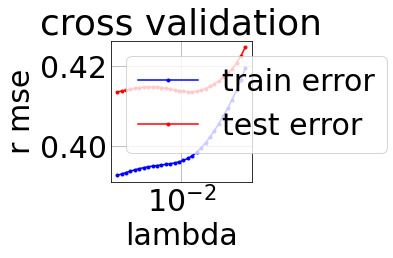

In [496]:
best_lambda, best_rmse = find_best_lambda_ridge_regression(tx, y, 7, np.logspace(-4, 0, 30))

### Penalized logistic regression

In [497]:
np.seterr(divide = 'ignore') 

initial_w = np.zeros((tx.shape[1], 1))

lambda_ = 1

w_lr, loss_lr = reg_logistic_regression(y,tx, lambda_, initial_w, 2000, 0.0001)
print("loss", np.sqrt(2*loss_lr))
#print(w_ls, "\n", w_lr)

# if gamma bigger than 0.00001 --> diverge
# if lambda = 0 --> no regularization (loss 0.88632)
# if lambda increases --> loss increases (0.8898)--> l2 norm of final weights vector decreases
# we avoid overfitting because we penalize large weights with the L2 norm
# if we set lambda to zero --> we go back to normal logistic regression
# 2000 iterations and gamma 0.0001 gives 

loss 1.1357087088821993


In [498]:
np.linalg.norm(w_lr)

0.08522862157201727

### Cross-validation of penalized logistic regression

In [499]:
from cross_validation import *
k=1
lambda_=0.00001

initial_w = np.zeros((tx.shape[1], 1))
loss_train, loss_test = cross_validation_reg_logistic_regression(y, tx,initial_w, k_indices, k,lambda_)
print("train loss : ", loss_train, "test loss : ", loss_test)

# we see that the loss both with logistic regression and reg logistic regression is similar
# no need to regularize because the data are not lineraly separable 
# (if they were --> we would never find a vector with logistic regression as it would go to infinity)
# test loss is better with log than reg log

#with 2000 iterations and gamma 0.0001 gives 

train loss :  1.0552880152393722 test loss :  1.0818449815988107


### Find best lambda for regularized logistic regression

 the choice of lambda which leads to the best test rmse is 0.00001 with a test rmse of 1.079


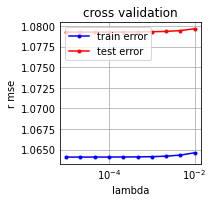

In [221]:
initial_w = np.zeros((tx.shape[1], 1))


best_lambda, best_rmse = find_best_lambda_reg_logistic_regression(tx, y, initial_w, 4, np.logspace(-5, -2, 10))

# we see that when regularizing -> we just increase rmse both for train and test 
# do not understand why reversed

### Find best gamma 

In [23]:
def cross_validation_reg_logistic_regression_gamma(y, x, k_indices, k, lambda_, iterations, gamma):
    """return the loss of ridge regression for a fold corresponding to k_indices

    Args:
        y:          shape=(N,)
        x:          shape=(N,)
        k_indices:  2D array returned by build_k_indices()
        k:          scalar, the k-th fold (N.B.: not to confused with k_fold which is the fold nums)
        lambda_:    scalar, cf. ridge_regression()
        degree:     scalar, cf. build_poly()

    Returns:
        train and test root mean square errors rmse = sqrt(2 mse)

    >>> cross_validation(np.array([1.,2.,3.,4.]), np.array([6.,7.,8.,9.]), np.array([[3,2], [0,1]]), 1, 2, 3)
    (0.019866645527597114, 0.33555914361295175)
    """
    train_tx, train_y, test_tx, test_y = separate_data(x, y, k_indices, k)

    w, loss_tr = reg_logistic_regression(
        train_y, train_tx, lambda_, np.zeros((train_tx.shape[1], 1)), iterations, gamma
    )

    # rr_test = ridge_regression(test_y, poly_test, lambda_)

    loss_te = compute_loss_mse(test_y, test_tx, w) + lambda_ * np.dot(w.T, w)

    loss_tr = np.sqrt(2 * loss_tr) + lambda_ * np.dot(w.T, w)

    loss_te = np.sqrt(2 * loss_te) + lambda_ * np.dot(w.T, w)

    return loss_tr, loss_te

In [24]:
def find_best_gamma_reg_logistic_regression_gamma(x, y, k_fold, gammas):
    """cross validation over regularisation parameter lambda.

    Args:
        k_fold: integer, the number of folds
        lambdas: shape = (p, ) where p is the number of values of lambda to test
    Returns:
        best_lambda : scalar, value of the best lambda
        best_rmse : scalar, the associated root mean squared error for the best lambda
    """
    l=0.1
    iterations = 10000
    seed = 12
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # set the best rmse to a maximal value as a start
    best_rmse = 101
    best_lambda = 0
    for g in gammas:
        rmse_tr_temp = 0.0
        rmse_te_temp = 0.0
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation_reg_logistic_regression_gamma(
                y, x, k_indices, k, l,iterations,g 
            )

            rmse_tr_temp += loss_tr
            rmse_te_temp += loss_te
        # do the average
        rmse_tr_temp = rmse_tr_temp / k_fold
        rmse_te_temp = rmse_te_temp / k_fold

        if rmse_te_temp < best_rmse:
            best_rmse = rmse_te_temp
            best_gamma = g
        rmse_tr.append(rmse_tr_temp[0])
        rmse_te.append(rmse_te_temp[0])

    cross_validation_visualization(gammas, rmse_tr, rmse_te)
    print(
        " the choice of gamma which leads to the best test rmse is %.5f with a test rmse of %.3f"
        % (best_gamma, best_rmse)
    )
    return best_lambda, best_rmse

In [25]:
find_best_gamma_reg_logistic_regression_gamma(x, y, 3, np.logspace(-6, -3, 10))

KeyboardInterrupt: 

### Features range boxplot

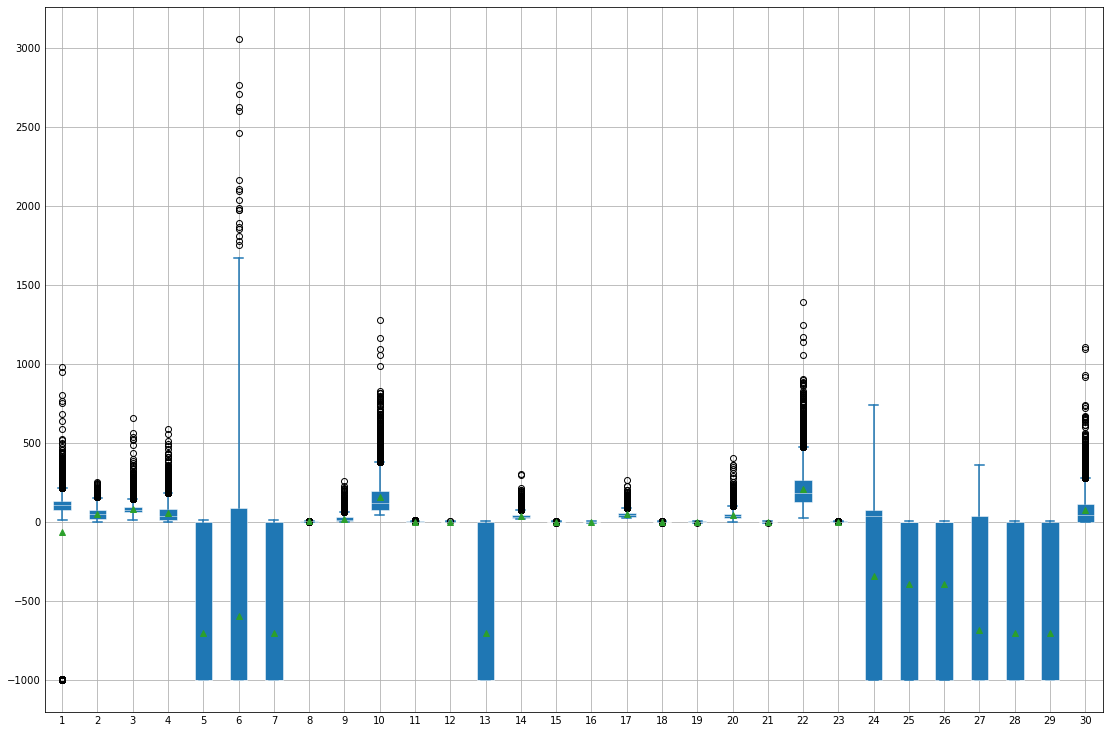

In [3]:
products_tuple = tuple(map(tuple, products))
plt.style.use('_mpl-gallery')

# make data:
np.random.seed(10)
D = np.random.normal(products_tuple)

r = list(range(500))

# plot
fig, ax = plt.subplots()


fig.set_size_inches(15, 10)



VP = ax.boxplot(D, patch_artist=True,
                showmeans=True, showfliers=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})

plt.show()

### Histograms per feature

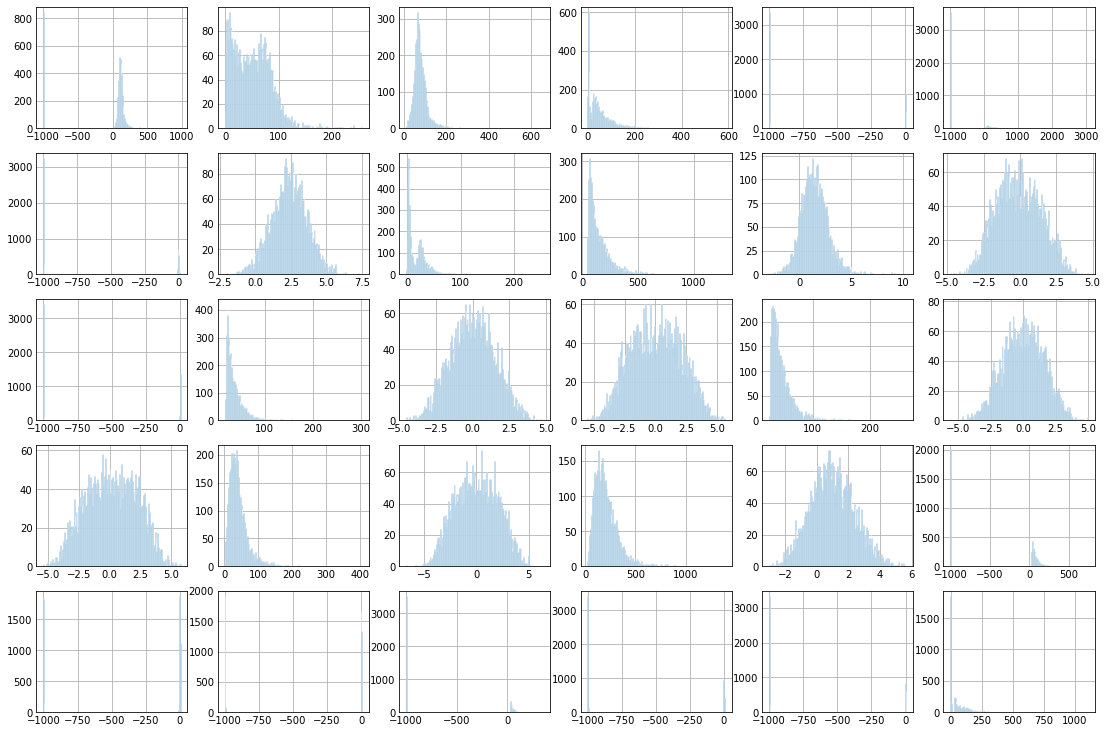

In [5]:
plt.style.use('_mpl-gallery')

# make data
np.random.seed(1)

# plot:
fig, ax = plt.subplots(5,6)

fig.set_size_inches(15, 10)

i=0
j=0
for feature in products.T:
    x = np.random.normal(feature)
    ax[i,j].hist(x, bins=200, linewidth=0.5, edgecolor="white")
    if j==5:
        j = 0
        i += 1
    else:
        j += 1



plt.show()